In [1]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('repr'))
suppressMessages(library('GoFKernel'))
suppressMessages(library('tidyverse'))
suppressMessages(library('lubridate'))
suppressMessages(library('viridis'))
suppressMessages(library('gridExtra'))
suppressMessages(library('rjags'))

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(GoFKernel)
library(gridExtra)
library(tibble)
library(plot3D)
library(cubature)
library(rjags)

library(tidyr)
library(ggplot2)
library(viridis)
library(IRdisplay)
library(repr)

Warning message:
“package ‘rjags’ was built under R version 3.6.3”Warning message:
“package ‘coda’ was built under R version 3.6.3”

# Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.

A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.

*(a) what is the probability distribution of y, the number of times the new method fails to detect the disease?*

The probability distribution of the number of failures $y$ in $n$ samples follows a Binomial distribution: indeed if a person has the desease, the method either succeeds or fails to detect the disease, and the two events are mutually exclusive.

*(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method?*

An unbiased estimator in the frequentist approach is given by the number of successes over the number of trials, and its variance is $\frac{p(1-p)}{n}$. In this particular case the estimator is $p_{freq} = \frac{y}{n}$ 

*(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance.*

Using a binomial likelihood and considering a $Beta(\alpha, \beta)$ prior, the rules of conjugate priors can be used. The posterior distribution then will be a $Beta(\alpha_{post}, \beta_{post})$ distribution as well, with:
* $\alpha_{post} = \alpha + y$
* $\beta_{post} = \beta+n-y$


$\alpha$ and $\beta$ of the prior can be calculated since it is known that $\mu = \frac{\alpha}{\alpha+\beta}$
and $\sigma^2 = \frac{\alpha\beta}{{(\alpha+\beta)}^2(\alpha+\beta+1)}$.

*(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.*

I perform a one tailed hypothesis test. The hypothesis test is performed considering a significance level of $\alpha = 0.05$. I consider:
* the null hypothesis $H_0 : p \ge 0.15$, meaning that the new method is not better than the old one
* the alternative hypothesis $H_1 = \bar{H}_0  : p < 0.15$

In a Bayesian Hypothesis Test, the posterior probability of the Null Hypothesis is computed as the integral of the posterior over p greater than the value to test, corresponding to $P(p \ge 0.15 | y = 6)$. The Null Hypothesis in this case is rejected since the probability associated to the null hypothesis is lower than the significance level.
It is to notice that the cutoff value of p corresponding to $P(H_0)$ is approximately 0.14, lower than the tested p.

*(e) Perform the same hypothesis test in the classical frequentist way.*

Remembering that the level of significance is $\alpha=5\%$, following the Neyman and Pearson's approach the rejection region for the null hypothesis is the one for which the cdf is lower than $\alpha$. In this case the null hypothesis corresponds to $ P(y|H_0) = Binom(y|n,p=0.15) $,  so  the cumulative of the binomial must be computed: $\sum_{y = 0}^{y = \hat{y}} Binom(y|n,p=0.15)$. It is to remember that that the binomial distribution is a discrete probability density. For this reason , a value of $y$ such as $cdf(y) = \alpha$ might not exist. In this case then we need to find the closest value $\alpha'$ to $\alpha$ such that it can be written as the cdf corresponding to an y value.
In this case we find $\alpha' = 5.4 \%$ and $y=6$ is in the rejection area, even if it is the limit of the region. 

So also in the frequentist approach the null hypothesis is rejected.

Frequentist estimator p_freq =  0.08 



Bayesian Computation (the posterior mean is used as an estimate for p): 
Mean: 0.085 
Variance: 0.001 
Median: 0.081 
Mode: 0.074 


Bayesian p-value =  0.03127933  < significance level = 0.05
Cutoff value of p =  0.140787  < p old = 0.15

Frequentist p-value =  0.0543533  > significance level = 0.05
Cutoff value of y =  6

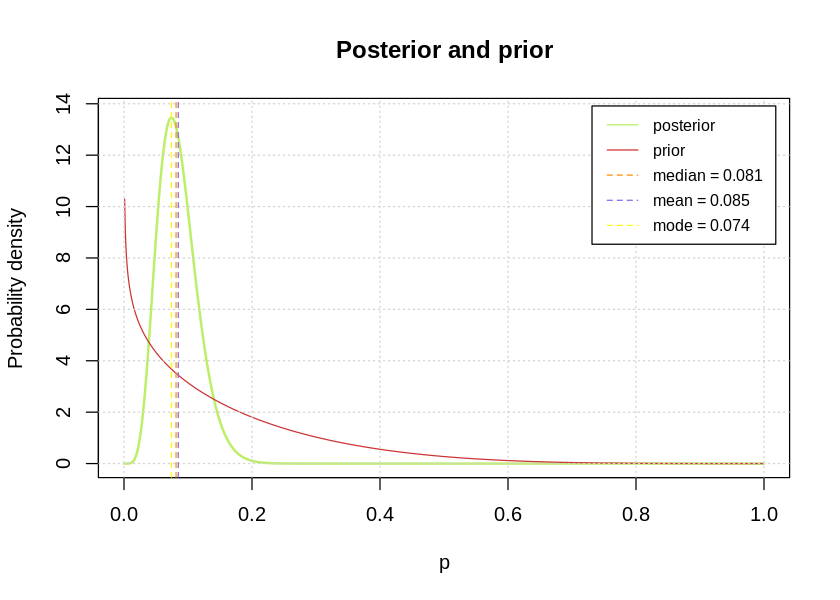


	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


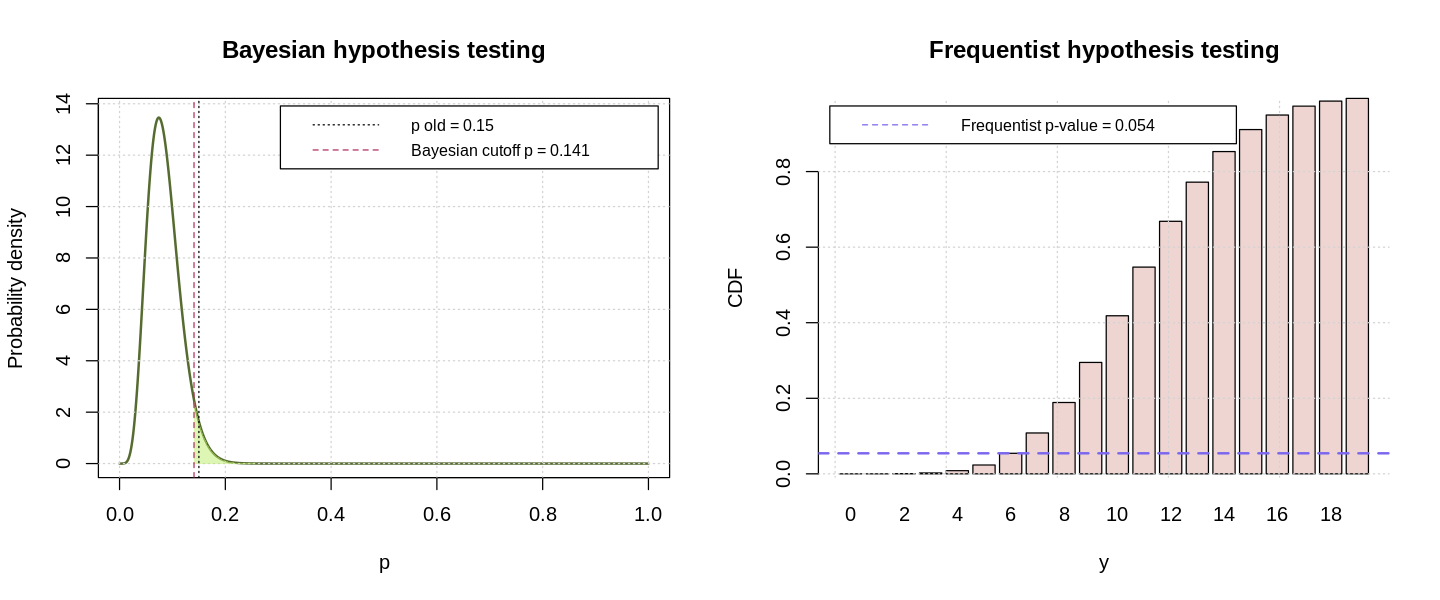

In [2]:
#Old method failure rate
p_old <- 0.15

#N of patients
n <- 75

#N of failures of the new method
y <- 6

p_new_freq <- y/n
cat('Frequentist estimator p_freq = ', p_new_freq, '\n\n\n\n')


m <- 0.15
std <- 0.14
a <- m^2*(1-m)/std^2 - m
b <- (1-m)*a/m

minp <- 0
maxp <- 1
points <- 1000
p <- seq(minp, maxp, 1/points)
q <- 0.025

prior <- dbeta(p, shape1 = a, shape2 = b)
post <- dbeta(p, shape1 = a + y, shape2 = b + n - y)

mean <- (a + y)/(a + b + n) #same as a_post/(a_post + b_post)
var <- (a + y)*(b + n - y)/(a + b + n)^2/(a + b + n + 1)
median <- qbeta(0.5, shape1 = a + y, shape2 = b + n - y) #find it using quantiles
mode <- (a + y - 1)/(a + b + n - 2)

par(mfrow = c(1,1))
options(repr.plot.width = 7, repr.plot.height = 5)

plot(p, post, type = 'l', col = 'darkolivegreen2', lwd = 2,
     ylab = 'Probability density', main = paste('Posterior and prior', sep=''), ylim = c(0,max(post) + 0.2))
lines(p, prior, lty = 1, col = 'brown3')
grid()
abline(v = median, lty = 'dashed', col = 'darkorange')
abline(v = mean, lty = 'dashed', col = 'slateblue2')
abline(v = mode, lty = 'dashed', col = 'yellow')
legend('topright', inset = 0.02, legend = c('posterior ', 'prior',
                                             paste('median = ', round(median, 3), sep=''),
                                             paste('mean = ', round(mean, 3), sep=''),
                                             paste('mode = ', round(mode, 3), sep='')),
        col=c('darkolivegreen2', 'brown3', 'darkorange', 'slateblue2', 'yellow'), lty=c(1, 1, 2, 2, 2),
       cex=0.8, box.lty = 1.0, y.intersp = 2)

cat('Bayesian Computation (the posterior mean is used as an estimate for p): \n')
cat('Mean:', round(mean, 3), '\n')
cat('Variance:', round(var, 3), '\n')
cat('Median:', round(median, 3), '\n')
cat('Mode:', round(mode, 3), '\n')

p_value_bayes <- pbeta(p_old, shape1 = a + y, shape2 = b + n -y, lower.tail = FALSE)
cutoff_bayes <- qbeta(0.95, shape1 = a + y, shape2 = b + n - y)
cat('\n\nBayesian p-value = ', p_value_bayes, ' < significance level = 0.05')
cat('\nCutoff value of p = ', cutoff_bayes, ' < p old = 0.15')

p_value_freq <- pbinom(q = y, size = n, prob = p_old)
cutoff_freq <- qbinom(p = 0.05, size = n, prob = p_old)
cat('\n\nFrequentist p-value = ', p_value_freq, ' > significance level = 0.05')
cat('\nCutoff value of y = ', cutoff_freq)


par(mfrow = c(1,2))
options(repr.plot.width = 12, repr.plot.height = 5)

plot(p, post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density',
main = paste('Bayesian hypothesis testing', sep=''),  ylim = c(0, max(post) + 0.2))
grid()
ci <- seq(cutoff_bayes, 1, len = 100)
polygon(c(ci , 1, cutoff_bayes), c(dbeta(ci, shape1 = a + y, shape2 = b + n - y), 0, 0), col=adjustcolor('darkolivegreen2',alpha.f=0.5), bor = NA)
abline(v = p_old, lty=3, col = 'black')
abline(v = cutoff_bayes, lty='dashed', col = 'maroon')
legend('topright', inset = 0.02,
       legend = c(paste('p old = ', round(p_old, 3), sep=''),
                  paste('Bayesian cutoff p = ', round(cutoff_bayes, 3), sep='')),
       col= c('black', 'maroon'), lty = c(3, 2), cex=0.8, box.lty = 1.0,
      text.width = strwidth(c(paste('p old = ', round(p_old, 3), sep=''),
                  paste('Bayesian cutoff p = ', round(cutoff_bayes, 3), sep='')))[1]*0.95, y.intersp = 2)



trials <- seq(0, n, len = n + 1)
barplot(pbinom(q = trials, size = n, prob = p_old)[1:20], names = trials[1:20], xlab='y', ylab='CDF', main='Frequentist hypothesis testing', col = 'mistyrose2')
grid()
abline(h = p_value_freq, lty=2, lwd=2, col='slateblue2')
legend('topleft', inset=0.02,
       legend = paste('Frequentist p-value = ', round(p_value_freq, 3), sep=''),
       col= 'slateblue2', lty = 2, cex= 0.8, box.lty = 1.0,
       text.width = strwidth(paste('Frequentist p_value = ', round(p_value_freq, 3), sep=''))[1]*0.45, y.intersp = 2)



binom.test(y, n, p = 0.15, alternative = 'l')

# Exercise 2

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

Consider the following to sets of observations taken over a fixed large time interval in two different corps:

| $y$ death soldiers | 0 | 1 | 2 | 3 | 4 | > 4 |
| --- | --- | --- | --- | --- | --- | --- |
| $n_1$ observations | 109 | 65 | 22 | 3 | 1 | 0 |
| $n_1$ observations | 144 | 91 | 32 | 11 | 2 | 0 |

*a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.*

It is known that a Poisson process with uniform prior corresponds to a $\Gamma(\alpha, \lambda)$ posterior with parameters $\alpha = \sum_j x_j + 1$ and $\lambda = n$ (where $n$ is the number of observations).

*b) assuming now a Jeffreys’ prior, $g(\lambda) \propto 1/\sqrt{\lambda}$ with $\lambda > 0$, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the $95\%$ credibility interval.*

It is known that a Poisson process with uniform prior corresponds to a $\Gamma(\alpha, \lambda)$ posterior with parameters $\alpha = \sum_j x_j + \frac{1}{2}$ and $\lambda = n$ (where $n$ is the number of observations).






Bayesian Computation set n1 with Uniform  Prior (the posterior mean is used as an estimate for lambda): 
Mean: 0.615 
Variance: 0.003 
Median: 0.613 
Mode: 0.61 
95% Credibility Interval: ( 0.511 0.728 ) 

Bayesian Computation set n2 with Uniform  Prior (the posterior mean is used as an estimate for lambda): 
Mean: 0.704 
Variance: 0.003 
Median: 0.702 
Mode: 0.7 
95% Credibility Interval: ( 0.609 0.805 ) 





Bayesian Computation set n1 with Jeffreys  Prior (the posterior mean is used as an estimate for lambda): 
Mean: 0.612 
Variance: 0.003 
Median: 0.611 
Mode: 0.608 
95% Credibility Interval: ( 0.509 0.726 ) 

Bayesian Computation set n2 with Jeffreys  Prior (the posterior mean is used as an estimate for lambda): 
Mean: 0.702 
Variance: 0.003 
Median: 0.701 
Mode: 0.698 
95% Credibility Interval: ( 0.607 0.803 ) 


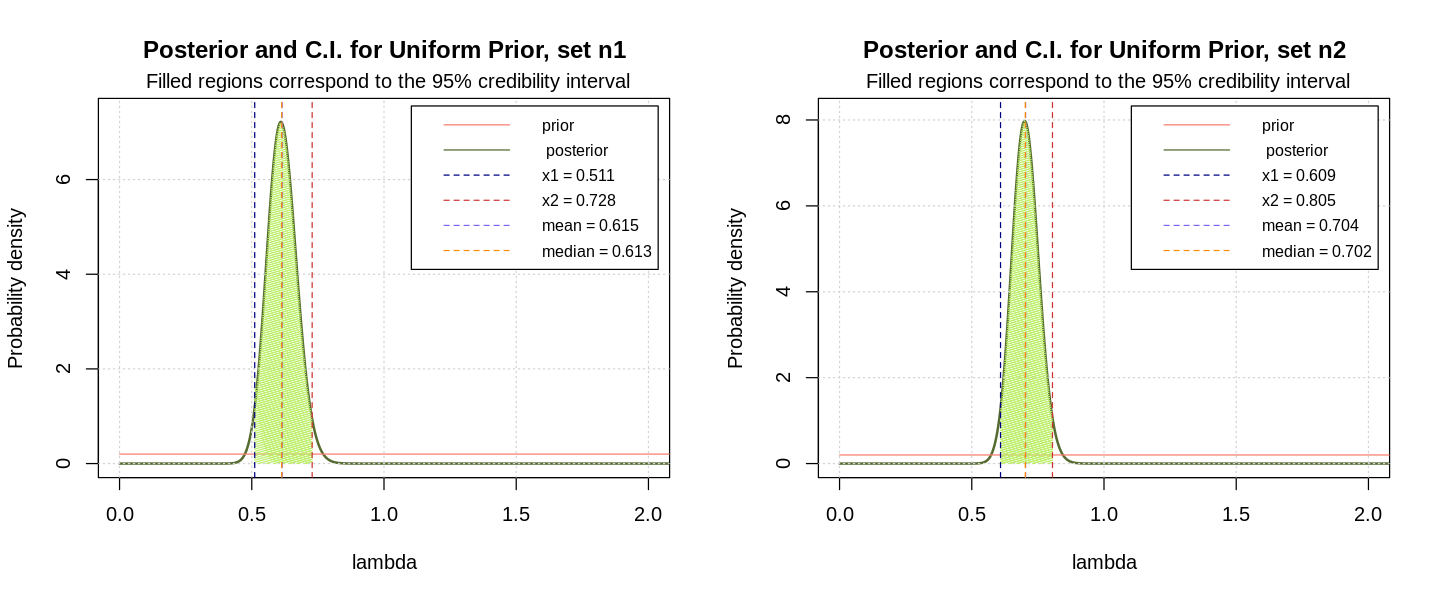

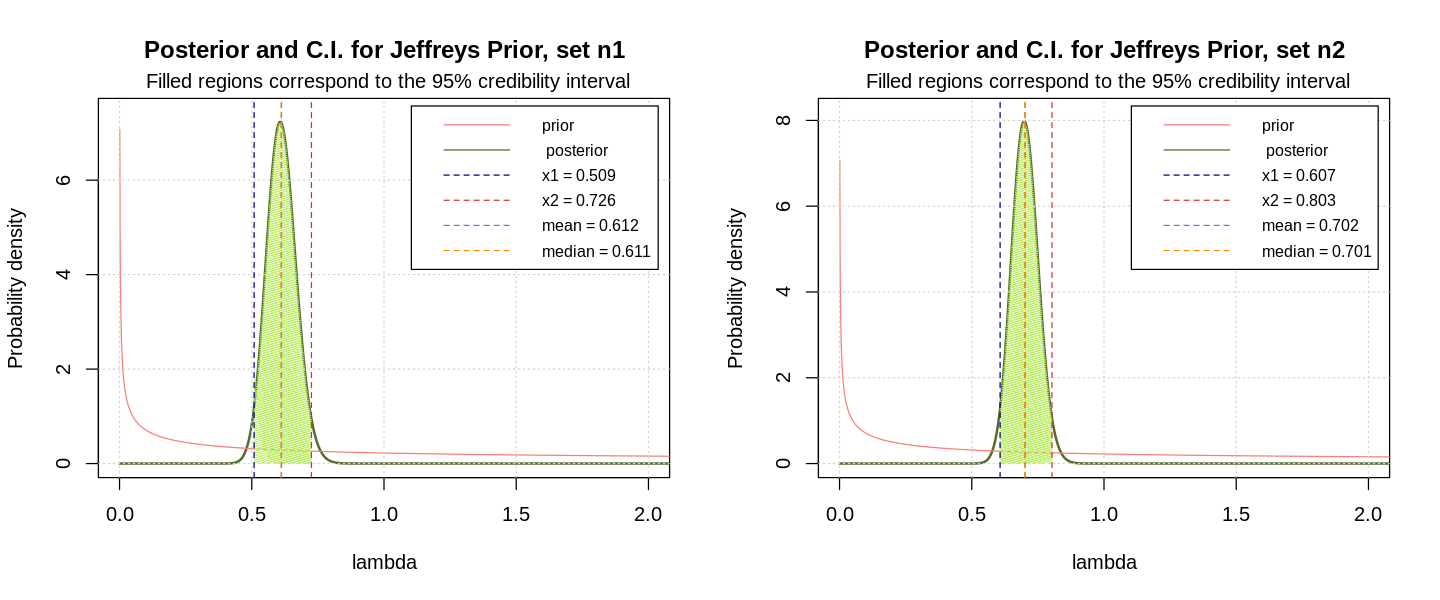

In [5]:
n_deaths <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

n_data <- rbind(n1, n2)

minp <- 0
maxp <- 5
points <- 1000
p <- seq(minp, maxp, 1/points)
q <- 0.025

data <- rbind(n_deaths*n1, n_deaths*n2)
n <- rbind(sum(n1), sum(n2))

norm <- integrate(function(x){1/sqrt(x)}, lower = minp, upper = maxp)$value
prior <- rbind(dunif(p, min = minp, max = maxp), 1/(norm*sqrt(p)))
alpha <- c(sum(data[1,])+1,  sum(data[1,])+1/2, sum(data[2,])+1, sum(data[2,])+1/2)
name <-c('Uniform', 'Jeffreys')

options(repr.plot.width = 12, repr.plot.height = 5)

par(mfrow = c(1,2))
for (i in 1:2) {
    
    post <- dgamma(p, shape = alpha[i], rate = n[1])
    min_ci <- qgamma(q, shape = alpha[i], rate = n[1])
    max_ci <- qgamma(1-q, shape = alpha[i], rate = n[1])
    median <- qgamma(0.5, shape = alpha[i], rate = n[1])
    mean_th <- alpha[i]/n[1]
    var_th <- alpha[i]/n[1]^2
    mode <- (alpha[i] - 1)/n[1]
    
    cat('\n\n\n\n\nBayesian Computation set n1 with', name [i],' Prior (the posterior mean is used as an estimate for lambda): \n')
    cat('Mean:', round(mean_th, 3), '\n')
    cat('Variance:', round(var_th, 3), '\n')
    cat('Median:', round(median, 3), '\n')
    cat('Mode:', round(mode, 3), '\n')
    cat('95% Credibility Interval: (', round(min_ci, 3), round(max_ci, 3), ') \n')
    
    legend_text <- c('prior', ' posterior', paste('x1 = ', round(min_ci, 3), sep=''),
                     paste('x2 = ', round(max_ci, 3), sep=''),
                     paste('mean = ', round(mean_th, 3), sep=''), paste('median = ', round(median, 3), sep=''))
 
    plot(p, post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density', xlab = 'lambda',
    main = paste('Posterior and C.I. for ', name[i] ,' Prior, set n1', sep=''), xlim = c(0,2), ylim = c(0,max(post) + 0.2))
    subt <- 'Filled regions correspond to the 95% credibility interval'
    mtext(side = 3, line = 0.25, at = 0.10, adj = 0, subt)
    lines(p, prior[i, ], lty = 1, col = 'salmon')
    grid()
    ci <- seq(min_ci, max_ci, len = 200)
    polygon(c(ci , max_ci, min_ci), c(dgamma(ci, alpha[i], n), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
    abline(v = min_ci, lty='dashed', col = 'navy')
    abline(v = max_ci, lty = 'dashed', col = 'brown3')
    abline(v = mean_th, lty = 'dashed', col = 'slateblue2')
    abline(v = median, lty = 'dashed', col = 'darkorange')
    legend('topright', inset = 0.02, legend = legend_text,
               col=c('salmon', 'darkolivegreen', 'navy', 'brown3', 'slateblue2', 'darkorange'), lty=c(1,1, 2, 2, 2, 2), cex=0.8, box.lty = 1.0,
          text.width = strwidth(legend_text)[1]*1.05, y.intersp = 2)
    
    post <- dgamma(p, shape = alpha[i+2], rate = n[2])
    min_ci <- qgamma(q, shape = alpha[i+2], rate = n[2])
    max_ci <- qgamma(1-q, shape = alpha[i+2], rate = n[2])
    median <- qgamma(0.5, shape = alpha[i+2], rate = n[2])
    mean_th <- alpha[i+2]/n[2]
    var_th <- alpha[i+2]/n[2]^2
    mode <- (alpha[i+2] - 1)/n[2]
    
    cat('\nBayesian Computation set n2 with', name[i],' Prior (the posterior mean is used as an estimate for lambda): \n')
    cat('Mean:', round(mean_th, 3), '\n')
    cat('Variance:', round(var_th, 3), '\n')
    cat('Median:', round(median, 3), '\n')
    cat('Mode:', round(mode, 3), '\n')
    cat('95% Credibility Interval: (', round(min_ci, 3), round(max_ci, 3), ') \n')
    
    legend_text <- c('prior', ' posterior', paste('x1 = ', round(min_ci, 3), sep=''),
                     paste('x2 = ', round(max_ci, 3), sep=''),
                     paste('mean = ', round(mean_th, 3), sep=''), paste('median = ', round(median, 3), sep=''))
    
    plot(p, post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density', xlab = 'lambda',
    main = paste('Posterior and C.I. for ', name[i] ,' Prior, set n2', sep=''), xlim = c(0,2), ylim = c(0,max(post) + 0.2))
    subt <- 'Filled regions correspond to the 95% credibility interval'
    mtext(side = 3, line = 0.25, at = 0.10, adj = 0, subt)
    lines(p, prior[i, ], lty = 1, col = 'salmon')
    grid()
    ci <- seq(min_ci, max_ci, len = 200)
    polygon(c(ci , max_ci, min_ci), c(dgamma(ci, alpha[i+2], n), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
    abline(v = min_ci, lty='dashed', col = 'navy')
    abline(v = max_ci, lty = 'dashed', col = 'brown3')
    abline(v = mean_th, lty = 'dashed', col = 'slateblue2')
    abline(v = median, lty = 'dashed', col = 'darkorange')
    legend('topright', inset = 0.02, legend = legend_text,
               col=c('salmon', 'darkolivegreen', 'navy', 'brown3', 'slateblue2', 'darkorange'), lty=c(1, 1, 2, 2, 2, 2), cex=0.8, box.lty = 1.0,
          text.width = strwidth(legend_text)[1]*1.05, y.intersp = 2)
    
}

# Exercise 3

• A study on water quality of streams, a high level of bacter X was defined as a level greater than 100
per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental
impact on pandas. Out of these, y = 11 had a high bacter X level.

• indicating with p the probability that a sample of water taken from the stream has a high bacter
X level,

*(a) find the frequentist estimator for p*

The probability distribution of the number of failures $y$ in $n$ samples follows a Binomial distribution: indeed either there is a high bacteria level or there is not, and the two events are mutually exclusive. An unbiased estimator in the frequentist approach is given by the number of successes over the number of trials, and its variance is $\frac{p(1-p)}{n}$. In this particular case the estimator is $p_{freq} = \frac{y}{n}$.

*(b) using a Beta(1, 10) prior for p, calculate and posterior distribution $P(p | y)$*

Using a binomial likelihood and considering a $Beta(\alpha, \beta)$ prior, the rules of conjugate priors can be used. The posterior distribution then will be a $Beta(\alpha_{post}, \beta_{post})$ distribution as well, with:
* $\alpha_{post} = \alpha + y$
* $\beta_{post} = \beta+n-y$

*(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval*

The posterior mean is used as an estimate for p.

*(d) test the hypotesis
$ H_0 : p = 0.1 \mbox{ versus } H_1 :p\neq 0.1 $ at 5% level of significance with both the frequentist and bayesian approach*

A two-tailed hypothesis test must be performed.

In the Bayesian approach the information about p is given by the posterior distribution. Computing the the 95% (corresponding to  $(1-\alpha) \times 100\%$) credibility interval limits using the  upper and lower $\alpha/2$ quantiles, the null hypotesis can be accepted or rejected at this level of significance. Indeed, if the credibility interval contains p then the null hypothesis cannot be rejected at this level of significance.

In this case, the $Beta(1, 10)$ 95%  credibility interval contains $ p = 0.1$, so the the null hypothesis is not rejected.


In the frequentist approach, the null distribution is the sampling distribution of y given that $H_0$ is true: $P(y|n,p) = Binom(y|n = 116, p= 0.1)$.

Following the Neyman and Pearson's approach, to see if $H_0$ is rejected the rejection region must be defined: it corresponds to the region for which the cdf is lower than $\alpha$.
Since we are dealing with a discrete distribution, we need to find the closest value $\alpha'$ to $\alpha$ such that it can be written as the cdf corresponding to an y value. A two-tailed hypothesis test must be performed, so the region will be distributed in the two tails, in this case the quantiles cannot be used since we are dealing with a discrete distribution.
In this case we find $\alpha' \simeq 4.76\%$ and y lies within the acceptance region.

Frequentist estimator p_freq =  0.095


Bayesian Computation (the posterior mean is used as an estimate for p): 
Mean: 0.094 
Variance: 0.001 
Median: 0.092 
Mode: 0.088 
95% Credibility Interval: ( 0.05 0.151 ) 


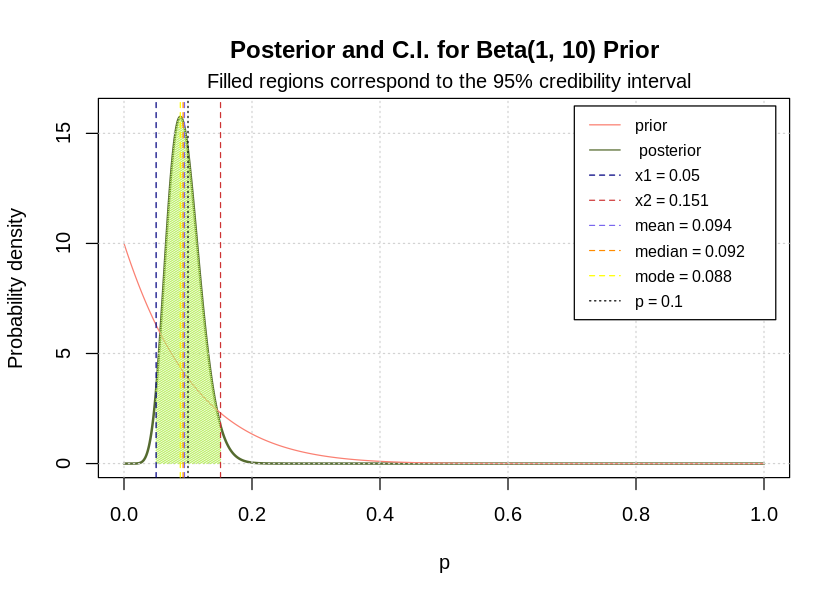


Rejection area:  0.04761008
Rejection area:  0.04761008

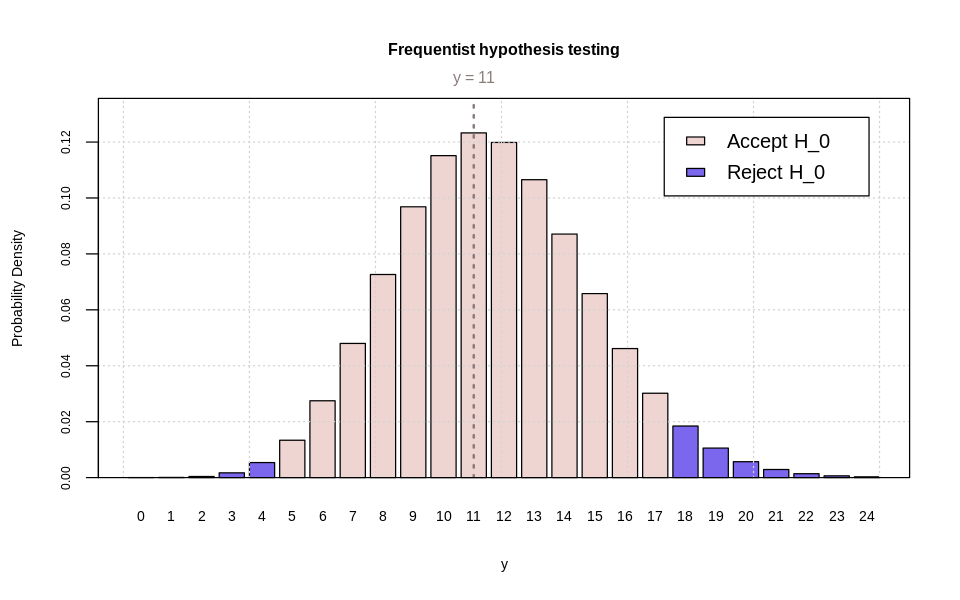

In [4]:
#N of samples
n <- 116

#N of samples with high bacteria level
y <- 11

freq_est <- y/n
cat('Frequentist estimator p_freq = ', round(freq_est, 3))

prob <- 0.1
a <- 1
b <- 10

a_post <- a + y
b_post <- b + n - y

minp <- 0
maxp <- 1
points <- 1000
p <- seq(minp, maxp, 1/points)
q <- 0.025

prior <- dbeta(p, shape1 = a, shape2 = b)
post <- dbeta(p, shape1 = a + y, shape2 = b + n - y)

mean <- (a + y)/(a + b + n) #same as a_post/(a_post + b_post)
var <- (a + y)*(b + n - y)/(a + b + n)^2/(a + b + n + 1)
median <- qbeta(0.5, shape1 = a + y, shape2 = b + n - y) #find it using quantiles
mode <- (a + y - 1)/(a + b + n - 2)

par(mfrow = c(1,1))
options(repr.plot.width = 7, repr.plot.height = 5)

min_ci <- qbeta(q, shape1 = a + y, shape2 = b + n - y)
max_ci <- qbeta(1-q, shape1 = a + y, shape2 = b + n - y)

cat('\n\n\nBayesian Computation (the posterior mean is used as an estimate for p): \n')
cat('Mean:', round(mean, 3), '\n')
cat('Variance:', round(var, 3), '\n')
cat('Median:', round(median, 3), '\n')
cat('Mode:', round(mode, 3), '\n')
cat('95% Credibility Interval: (', round(min_ci, 3), round(max_ci, 3), ') \n')
    

legend_text <- c('prior', ' posterior', paste('x1 = ', round(min_ci, 3), sep=''),
                     paste('x2 = ', round(max_ci, 3), sep=''),
                     paste('mean = ', round(mean, 3), sep=''),
                     paste('median = ', round(median, 3), sep=''),
                     paste('mode = ', round(mode, 3), sep=''),
                     paste('p = ', round(prob, 3), sep=''))

plot(p, post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density',
    main = paste('Posterior and C.I. for Beta(1, 10) Prior', sep=''), xlim = c(0,1), ylim = c(0,max(post) + 0.2))
subt <- 'Filled regions correspond to the 95% credibility interval'
mtext(side = 3, line = 0.25, at = 0.13, adj = 0, subt)
lines(p, prior, lty = 1, col = 'salmon')
grid()
ci <- seq(min_ci, max_ci, len = 200)
polygon(c(ci , max_ci, min_ci), c(dbeta(ci, shape1 = a + y, shape2 = b + n - y), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
abline(v = min_ci, lty='dashed', col = 'navy')
abline(v = max_ci, lty = 'dashed', col = 'brown3')
abline(v = mean, lty = 'dashed', col = 'slateblue2')
abline(v = median, lty = 'dashed', col = 'darkorange')
abline(v = mode, lty = 'dashed', col = 'yellow')
abline(v = prob, lty = 3, col = 'black')
legend('topright', inset = 0.02, legend = legend_text,
               col=c('salmon', 'darkolivegreen', 'navy', 'brown3', 'slateblue2', 'darkorange', 'yellow', 'black'), lty=c(1,1, 2, 2, 2, 2, 2, 3), cex=0.8, box.lty = 1.0,
text.width = strwidth(legend_text)[1]*3, y.intersp = 2)    



#double tailed hypothesis test!
x_freq <- seq(0, n, 1)
p_freq <- pbinom(x_freq, n, prob)
pp_freq <- dbinom(x_freq, n, prob)

#lower <- pbinom(5, n, 0.1)#sum(pp_freq[0:7]) #pbinom(4, n, 0.1)
#upper <- pbinom(19, n, 0.1)#pbinom(17, n, 0.1)#, lower.tail = FALSE)
#lower <- qbinom(0.025, n, prob)
#upper <- qbinom(0.975, n, prob)

lower <- 0.02 # I choose 0.02 instead of 0.025 otherwise the actual rejection area is too large, approximately 0.06
upper <- 0.975

colormat <- ifelse(p_freq > lower & p_freq < upper, 'mistyrose2', 'slateblue2')

options(repr.plot.width=8, repr.plot.height=5)
barplot(height = pp_freq[1:25],
        names.arg = x_freq[1:25], col = colormat[1:25],
        ylim=c(0, 1.1*max(pp_freq)),
        main = 'Frequentist hypothesis testing', xlab = 'y', ylab = 'Probability Density',
        cex.lab=0.7, cex.axis=0.6, cex.main=0.8, cex.names = 0.7)
grid()
abline(v = 13.9, col = 'mistyrose4', lwd = 2, lty = 3)
text(13.9, par('usr')[4], labels=expression('y = 11'),  pos=3, cex = 0.8, col = 'mistyrose4',  xpd=TRUE)
legend(x='topright', inset=0.05, legend=c('Accept H_0', 'Reject H_0'),
       fill=c('mistyrose2', 'slateblue2'), y.intersp = 2)
box()


cat('\nRejection area: ',sum(pp_freq[1:5]) + sum(pp_freq[19:n])) #NB indexes of pp start from 1, so if I want y = 18 the index is 19
cat('\nRejection area: ', (pbinom(4, n, prob) + pbinom(17, n, prob, lower.tail = FALSE))) #pbnom lower tail starts from 18! same as sum(dbinom(18:n, n, prob))

• a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter
X level

*(e) find the frequentist estimator for p*

The procedure is the same as the previous part, and the estimator is $p_{freq} = \frac{y}{n}$.

*(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.*

Again, the rule of conjugate priors can be used, and since the priors are $Beta(\alpha, \beta)$ distributions, the posterior distribution then will be a $Beta(\alpha_{post}, \beta_{post})$ distribution as well, with:
* $\alpha_{post} = \alpha + y$
* $\beta_{post} = \beta+n-y$


*(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval*

The posterior mean is used as an estimate for p.

*(h) test the hypotesis $H_0 : p=0.1 \mbox{ versus } H_1 :p \neq 0.1 $ at 5% level of significance with both the frequentist and bayesian approach*

In the same way as before, in the bayesian approach the confidence interval must be considered. It can be seen that in the first case p falls outside the interval so the null hypothesis can be rejected at this level of significance, and in the second case it falls inside the interval so the null hypothesis cannot be rejected.

As for the frequentist approach, I considered the rejection region to be $\left\{y\le 9\right\} \cup\left\{y\ge25\right\}$, linked to a rejection probability of $\alpha' = 5.1\%$. And in this case the null hypothesis is rejected at this level of significance.
However, performing another test corresponding to a rejection probability of $\alpha' = 5.3\%$ and a rejection region $\left\{y\le 8\right\} \cup\left\{y\ge24\right\}$, the null hypothesis is accepted.
I do not consider this test since the rejection probability is higher than the first rejection probability, however it shows that the value obtained is a borderline case.

Frequentist estimator p_freq =  0.055


Bayesian Computation for  Beta(10, 1)  Prior (the posterior mean is used as an estimate for p): 
Mean: 0.057 
Variance: 0 
Median: 0.055 
Mode: 0.052 
Credibility Interval: ( 0.028 0.095 ) 



Bayesian Computation for  Beta (12, 115)  Prior (the posterior mean is used as an estimate for p): 
Mean: 0.072 
Variance: 0 
Median: 0.071 
Mode: 0.069 
Credibility Interval: ( 0.045 0.104 ) 


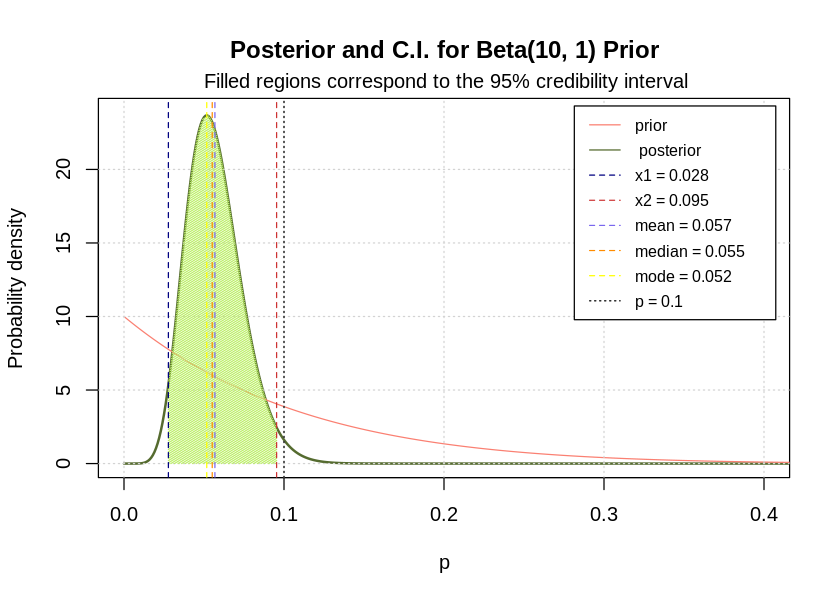

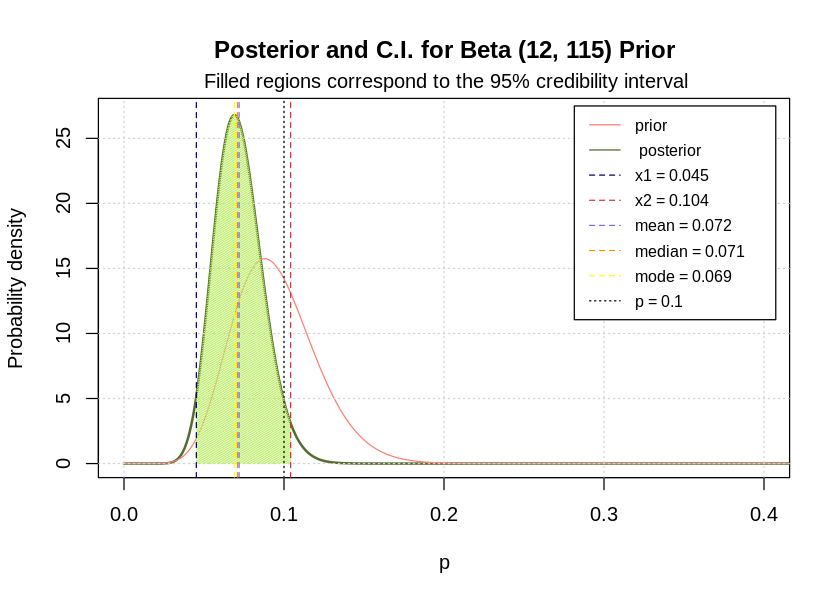

In [5]:
n <- 165
y <- 9

freq_est <- y/n
cat('Frequentist estimator p_freq = ', round(freq_est, 3))
shapes <- c(a, a_post, b, b_post)
name <-c('Beta(10, 1)', paste('Beta (', a_post , ', ', b_post,')', sep=''))

par(mfrow = c(1,1))
options(repr.plot.width = 7, repr.plot.height = 5)

for (i in 1:2) {
    a_tmp <- shapes[i]
    b_tmp <- shapes[i+2]
    prior <- dbeta(p, shape1 = a_tmp, shape2 = b_tmp)
    post <- dbeta(p, shape1 = a_tmp + y, shape2 = b_tmp + n - y)
    
    mean <- (a_tmp + y)/(a_tmp + b_tmp + n) #same as a_post/(a_post + b_post)
    var <- (a_tmp + y)*(b_tmp + n - y)/(a_tmp + b_tmp + n)^2/(a_tmp + b_tmp + n + 1)
    median <- qbeta(0.5, shape1 = a_tmp + y, shape2 = b_tmp + n - y) #find it using quantiles
    mode <- (a_tmp + y - 1)/(a_tmp + b_tmp + n - 2)
    
    min_ci <- qbeta(q, shape1 = a_tmp + y, shape2 = b_tmp + n - y)
    max_ci <- qbeta(1-q, shape1 = a_tmp + y, shape2 = b_tmp + n - y)
    
    cat('\n\n\nBayesian Computation for ', name[i] ,' Prior (the posterior mean is used as an estimate for p): \n')
    cat('Mean:', round(mean, 3), '\n')
    cat('Variance:', round(var, 3), '\n')
    cat('Median:', round(median, 3), '\n')
    cat('Mode:', round(mode, 3), '\n')
    cat('Credibility Interval: (', round(min_ci, 3), round(max_ci, 3), ') \n')
    

    legend_text <- c('prior', ' posterior', paste('x1 = ', round(min_ci, 3), sep=''),
                     paste('x2 = ', round(max_ci, 3), sep=''),
                     paste('mean = ', round(mean, 3), sep=''),
                     paste('median = ', round(median, 3), sep=''),
                     paste('mode = ', round(mode, 3), sep=''),
                     paste('p = ', round(prob, 3), sep=''))

    plot(p, post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'Probability density',
    main = paste('Posterior and C.I. for ', name[i] ,' Prior', sep=''), xlim = c(0,0.4), ylim = c(0,max(post) + 0.2))
    subt <- 'Filled regions correspond to the 95% credibility interval'
    mtext(side = 3, line = 0.25, at = 0.05, adj = 0, subt)
    lines(p, prior, lty = 1, col = 'salmon')
    grid()
    ci <- seq(min_ci, max_ci, len = 200)
    polygon(c(ci , max_ci, min_ci), c(dbeta(ci, shape1 = a_tmp + y, shape2 = b_tmp + n - y), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
    abline(v = min_ci, lty='dashed', col = 'navy')
    abline(v = max_ci, lty = 'dashed', col = 'brown3')
    abline(v = mean, lty = 'dashed', col = 'slateblue2')
    abline(v = median, lty = 'dashed', col = 'darkorange')
    abline(v = mode, lty = 'dashed', col = 'yellow')
    abline(v = prob, lty = 3, col = 'black')
    legend('topright', inset = 0.02, legend = legend_text,
               col=c('salmon', 'darkolivegreen', 'navy', 'brown3', 'slateblue2', 'darkorange', 'yellow', 'black'), lty=c(1,1, 2, 2, 2, 2, 2, 3), cex=0.8, box.lty = 1.0,
    text.width = strwidth(legend_text)[1]*3, y.intersp = 2)    
}


Rejection area:  0.0511155
Rejection area:  0.0511155

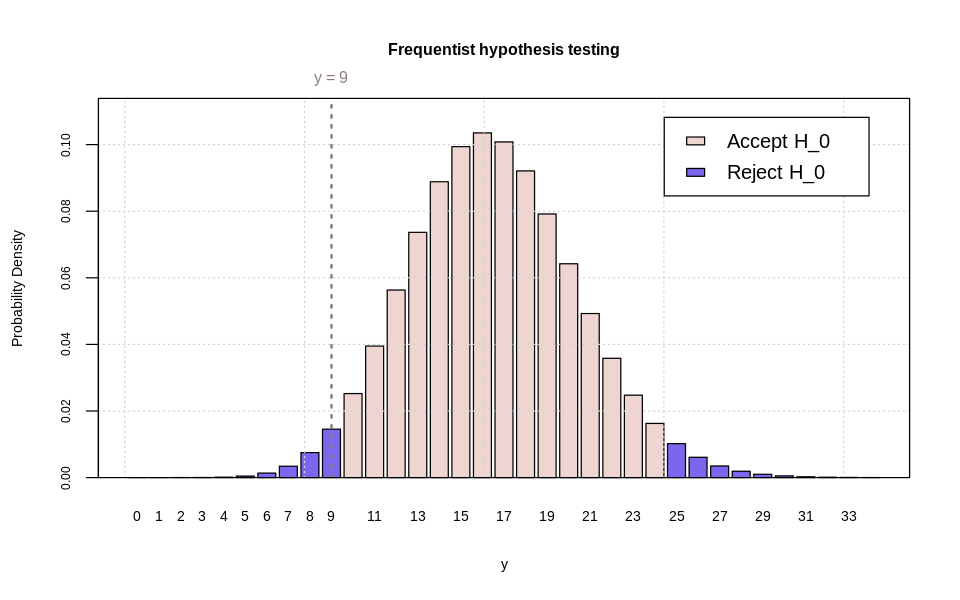


Rejection area:  0.05283411
Rejection area:  0.05283411

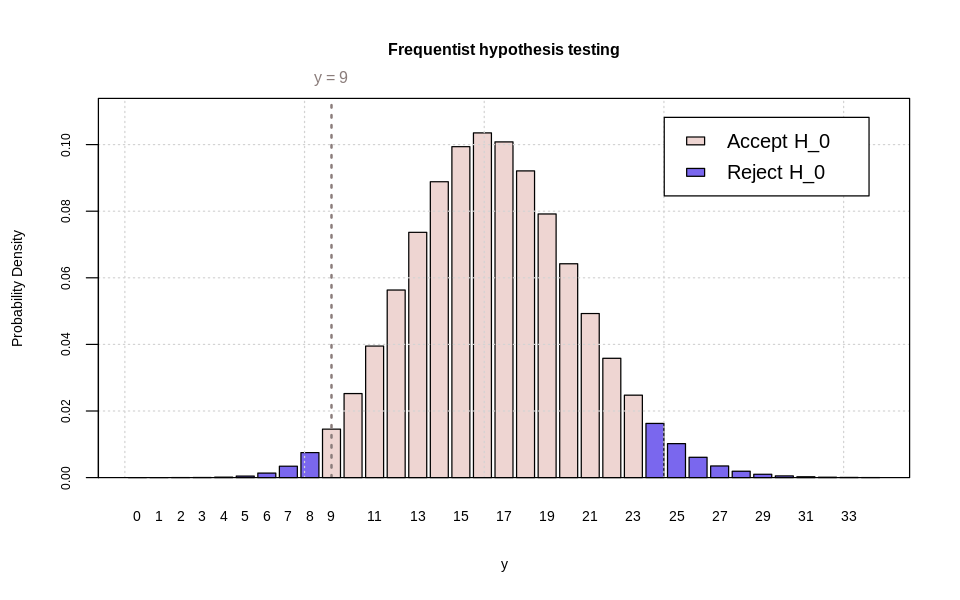

In [6]:
#double tailed hypothesis test!
x_freq <- seq(0, n, 1)
p_freq <- pbinom(x_freq, n, prob)
pp_freq <- dbinom(x_freq, n, prob)

# I use this range instead of 0.025 - 0.975 otherwise I would have a higher rejection area
lower <- 0.03
upper <- 0.98

colormat <- ifelse(p_freq > lower & p_freq < upper, 'mistyrose2', 'slateblue2')

options(repr.plot.width = 8, repr.plot.height = 5)
barplot(height = pp_freq[1:35],
        names.arg = x_freq[1:35], col = colormat[1:25],
        ylim=c(0, 1.1*max(pp_freq)),
        main = 'Frequentist hypothesis testing', xlab = 'y', ylab = 'Probability Density',
        cex.lab=0.7, cex.axis=0.6, cex.main=0.8, cex.names = 0.7)
grid()
abline(v = 11.5, col = 'mistyrose4', lwd = 2, lty = 3)
text(11.5, par('usr')[4], labels=expression('y = 9'),  pos=3, cex = 0.8, col = 'mistyrose4',  xpd=TRUE)
legend(x='topright', inset=0.05, legend=c('Accept H_0', 'Reject H_0'),
       fill=c('mistyrose2', 'slateblue2'), y.intersp = 2)
box()


cat('\nRejection area: ',sum(pp_freq[1:10]) + sum(pp_freq[26:n]))#NB indexes of pp start from 1, so if I want y = 25 the index is 26
cat('\nRejection area: ', (pbinom(9, n, prob) + pbinom(24, n, prob, lower.tail = FALSE))) #pbnom lower tail starts from 25! same as sum(dbinom(25:n, n, prob))

#Let's see what happens using the 0.025 - 0.975 interval
lower <- 0.025
upper <- 0.975

colormat <- ifelse(p_freq > lower & p_freq < upper, 'mistyrose2', 'slateblue2')

options(repr.plot.width = 8, repr.plot.height = 5)
barplot(height = pp_freq[1:35],
        names.arg = x_freq[1:35], col = colormat[1:25],
        ylim=c(0, 1.1*max(pp_freq)),
        main = 'Frequentist hypothesis testing', xlab = 'y', ylab = 'Probability Density',
        cex.lab=0.7, cex.axis=0.6, cex.main=0.8, cex.names = 0.7)
grid()
abline(v = 11.5, col = 'mistyrose4', lwd = 2, lty = 3)
text(11.5, par('usr')[4], labels=expression('y = 9'),  pos=3, cex = 0.8, col = 'mistyrose4',  xpd=TRUE)
legend(x='topright', inset=0.05, legend=c('Accept H_0', 'Reject H_0'),
       fill=c('mistyrose2', 'slateblue2'), y.intersp = 2)
box()


cat('\nRejection area: ',sum(pp_freq[1:9]) + sum(pp_freq[25:n]))
cat('\nRejection area: ', (pbinom(8, n, prob) + pbinom(23, n, prob, lower.tail = FALSE)))

# JAGS exercises

It is to notice that in general the results obtained using JAGS are in accordance with the results obtained in the previous section.

# Exercise 4


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.08459 0.03065 0.0003065      0.0004236
y 0.84140 0.92743 0.0092743      0.0095537

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.03399 0.06277 0.08148 0.1032 0.1535
y 0.00000 0.00000 1.00000 1.0000 3.0000


 Correlation matrix : 
          p         y
p 1.0000000 0.3196224
y 0.3196224 1.0000000



Theoretical values for Beta Prior: 
Mean: 0.085 
Sd: 0.031 



Jags estimates for Beta Prior: 
Mean: 0.085 
Sd: 0.031 
Credibility Interval: ( 0.034 0.153 ) 


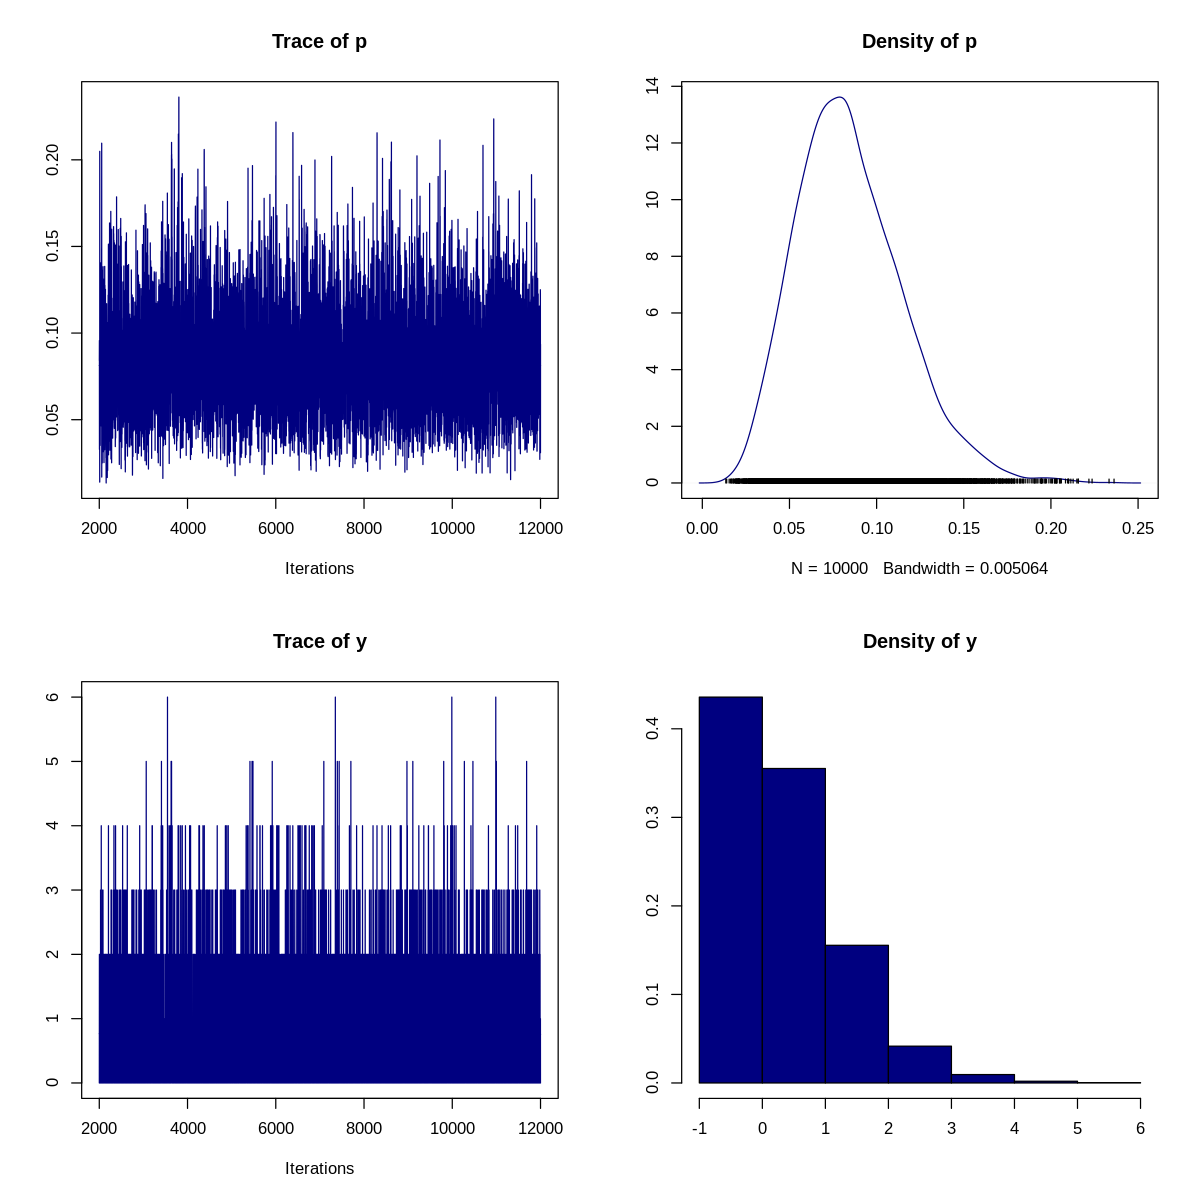

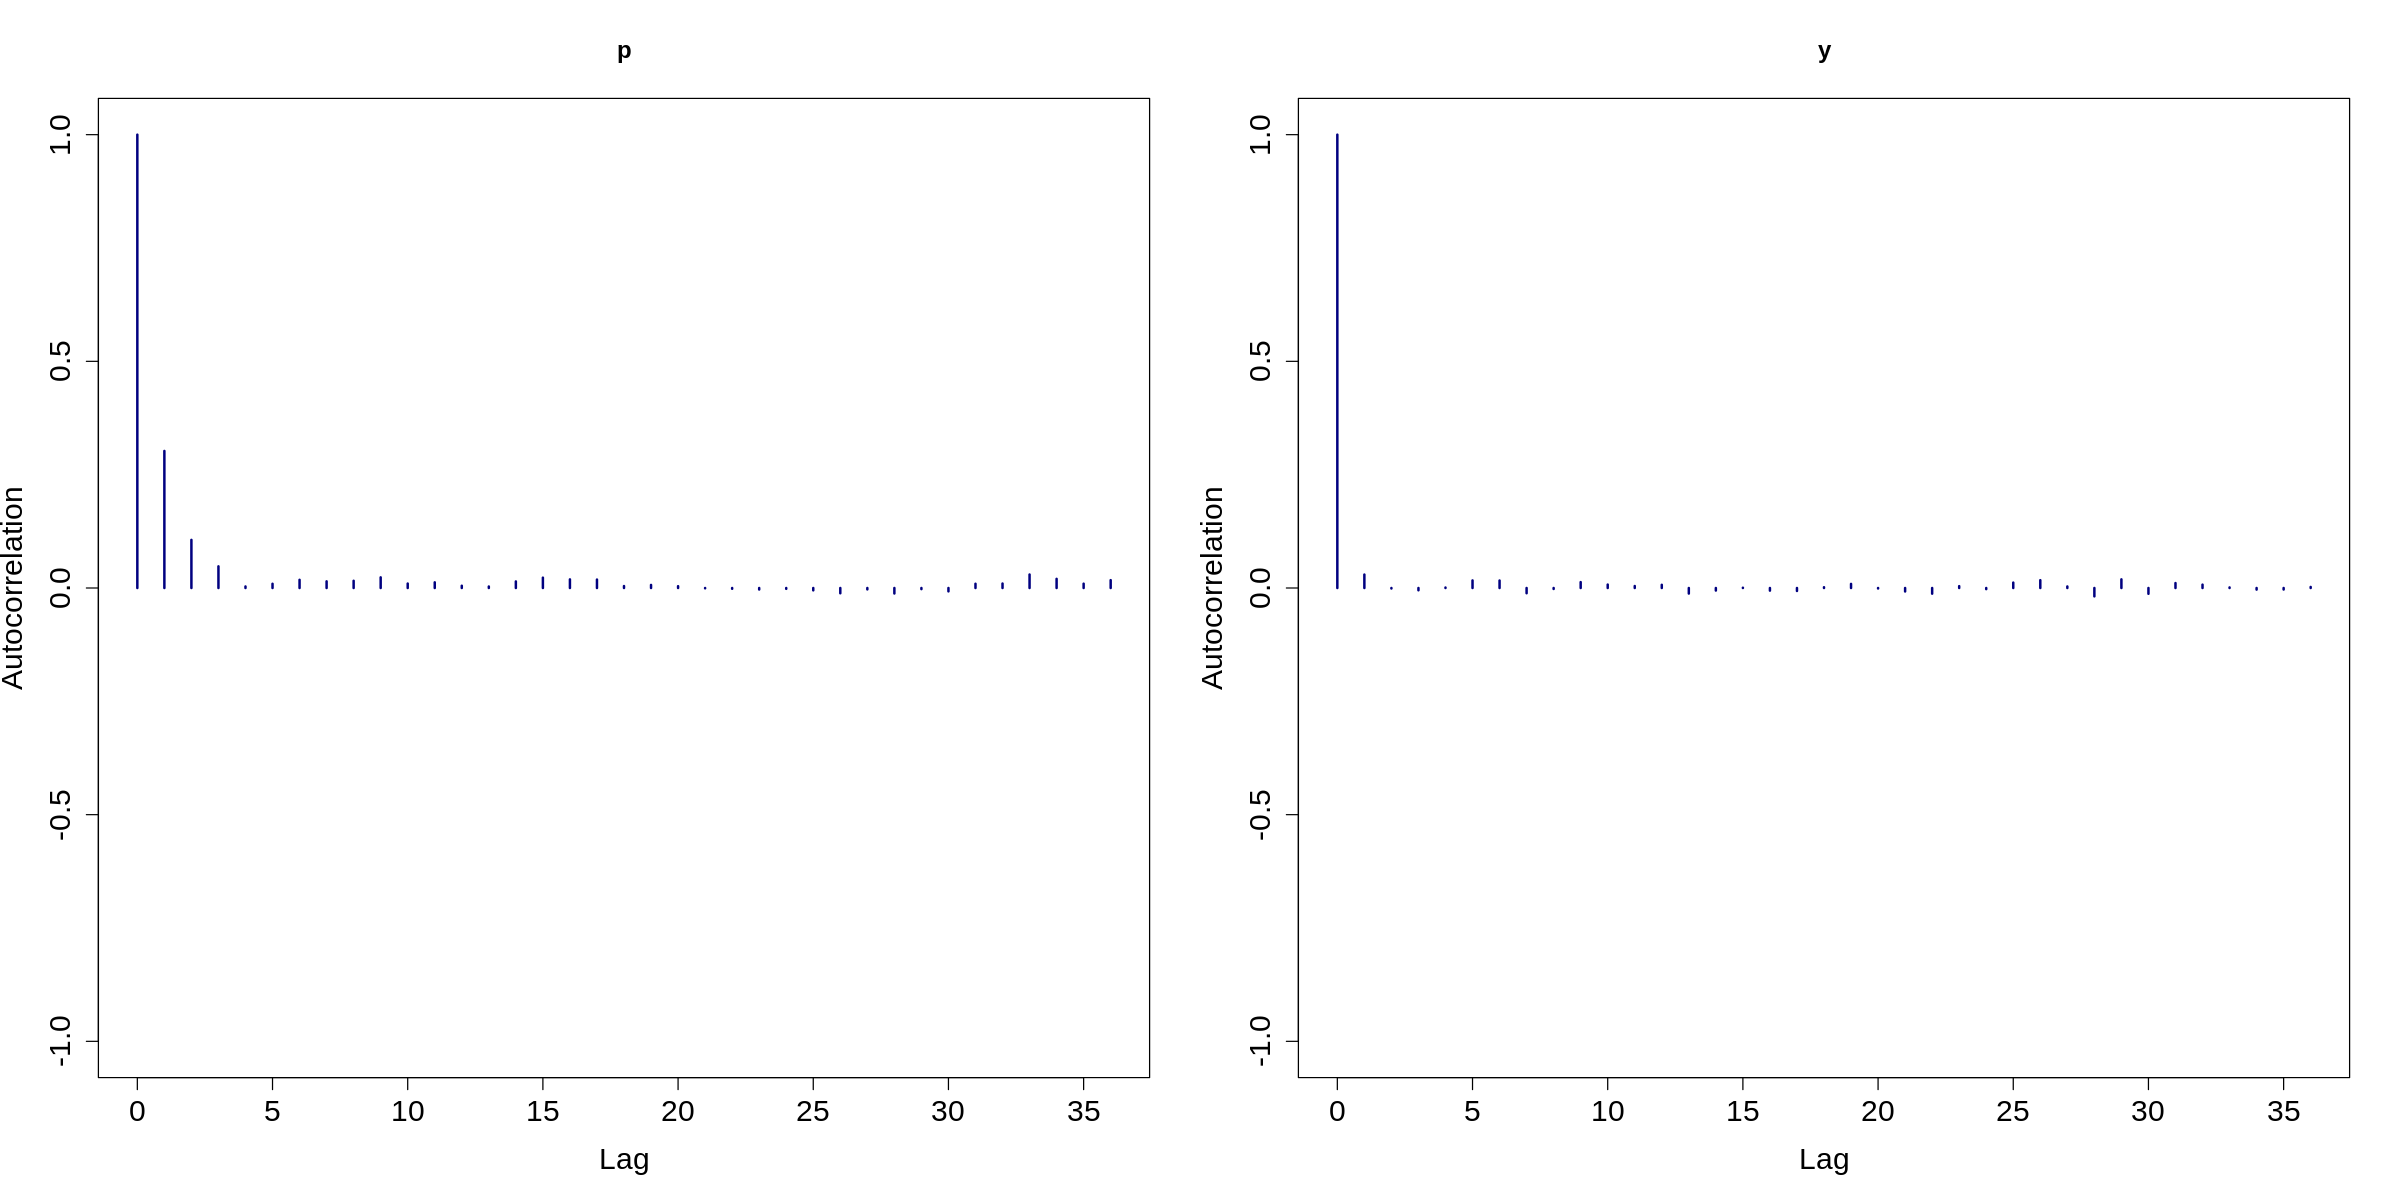

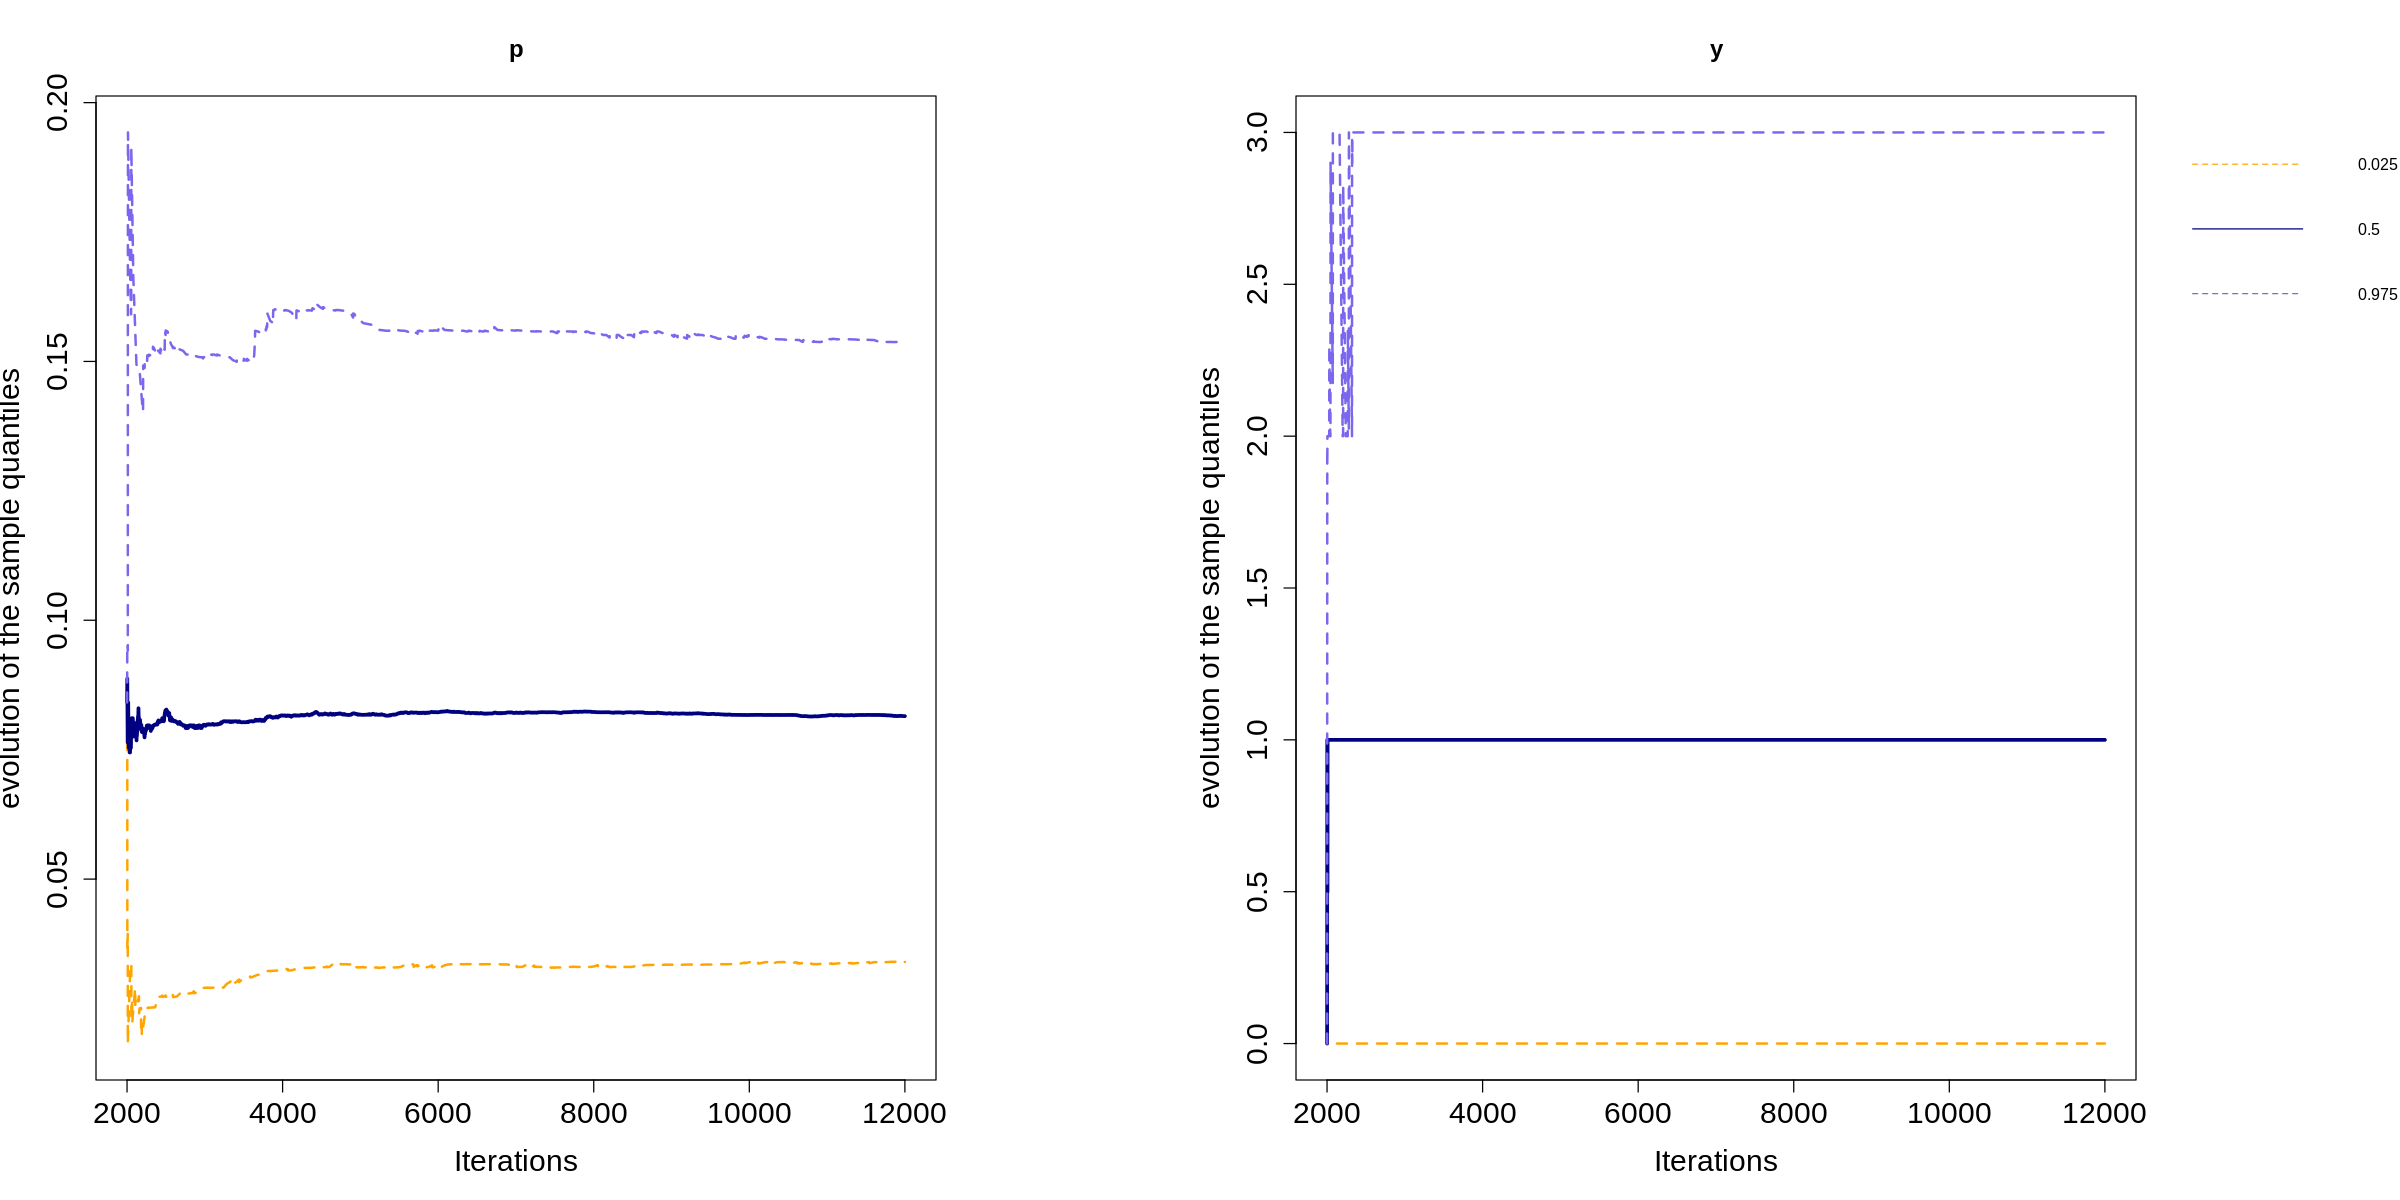

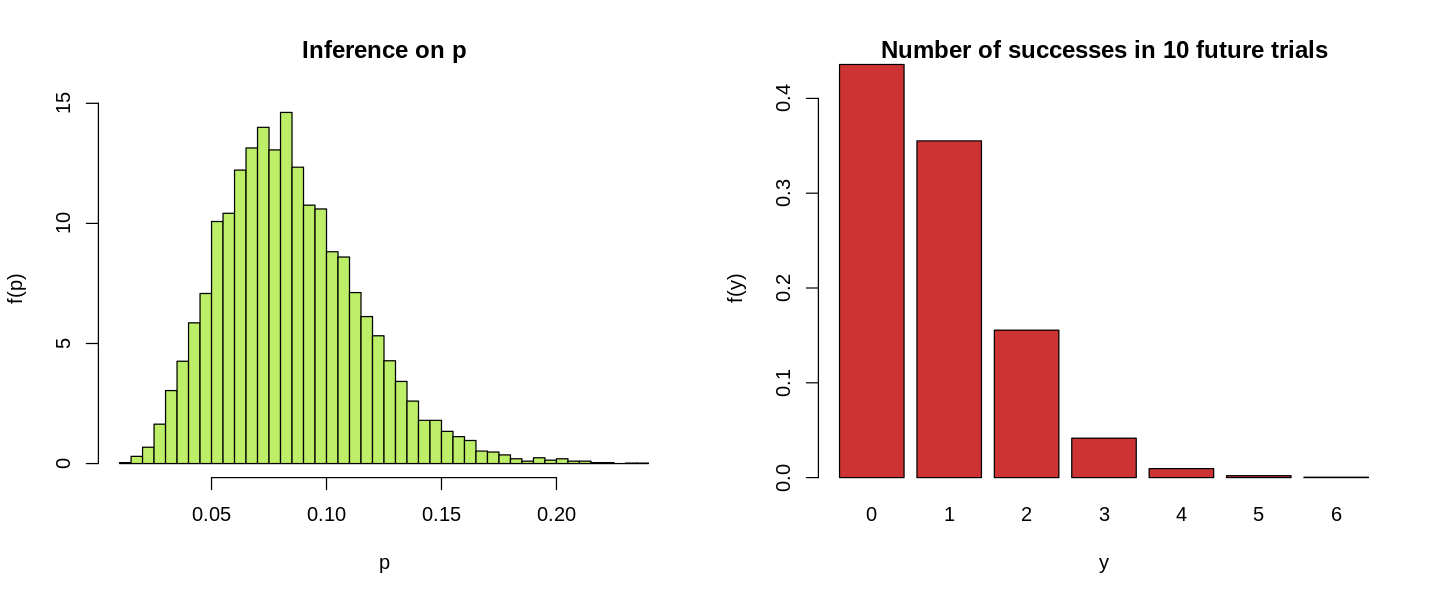

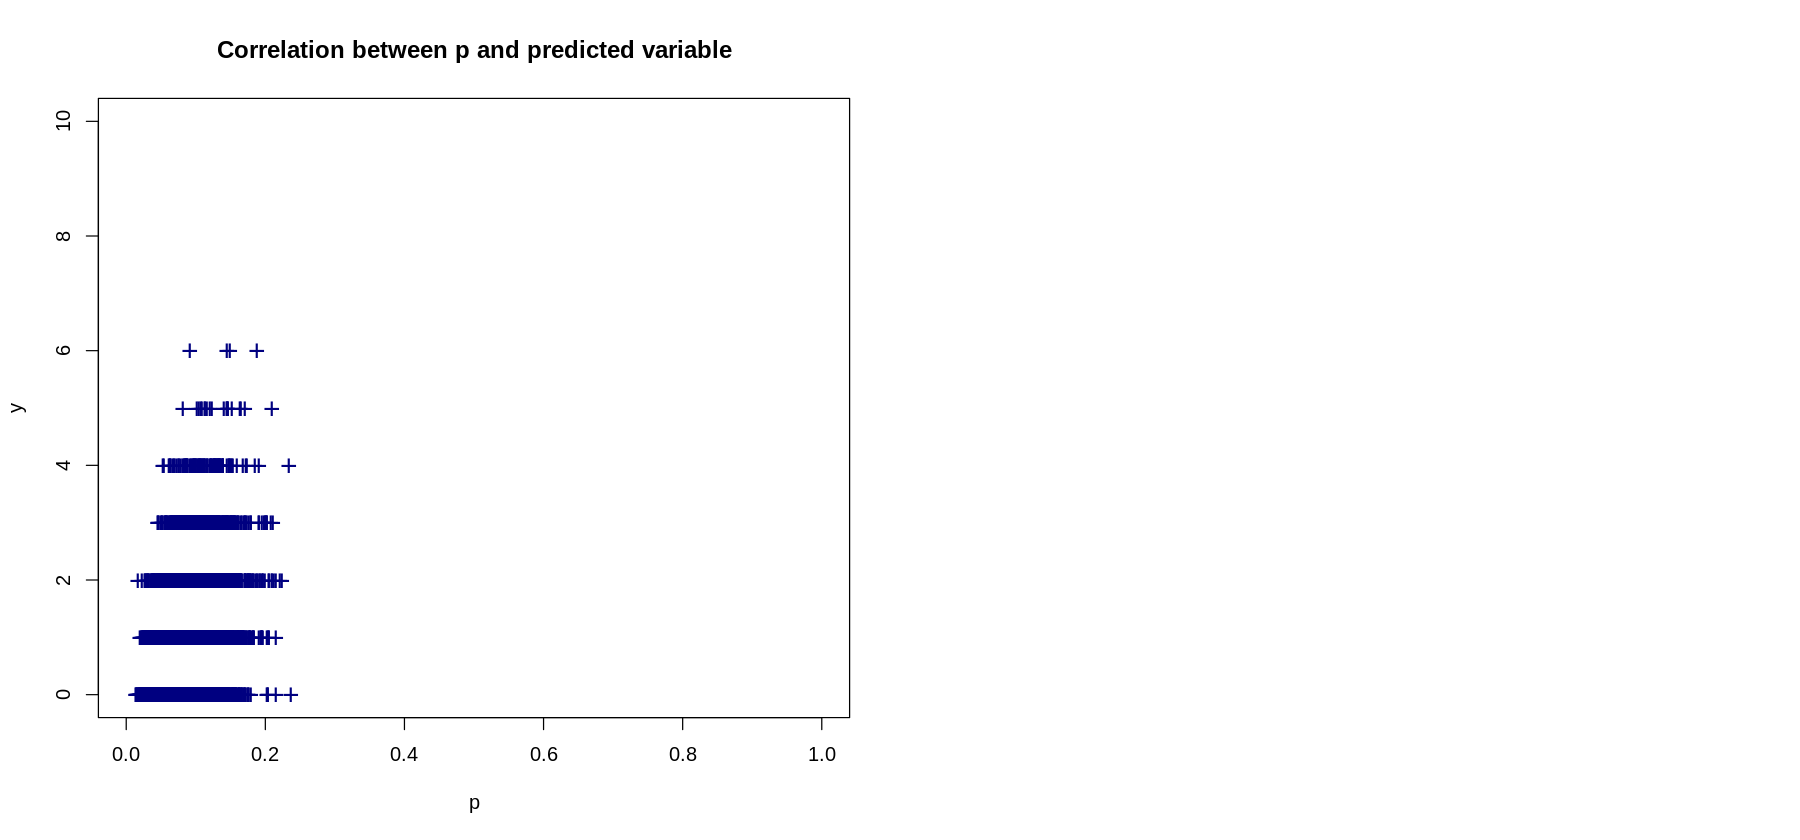

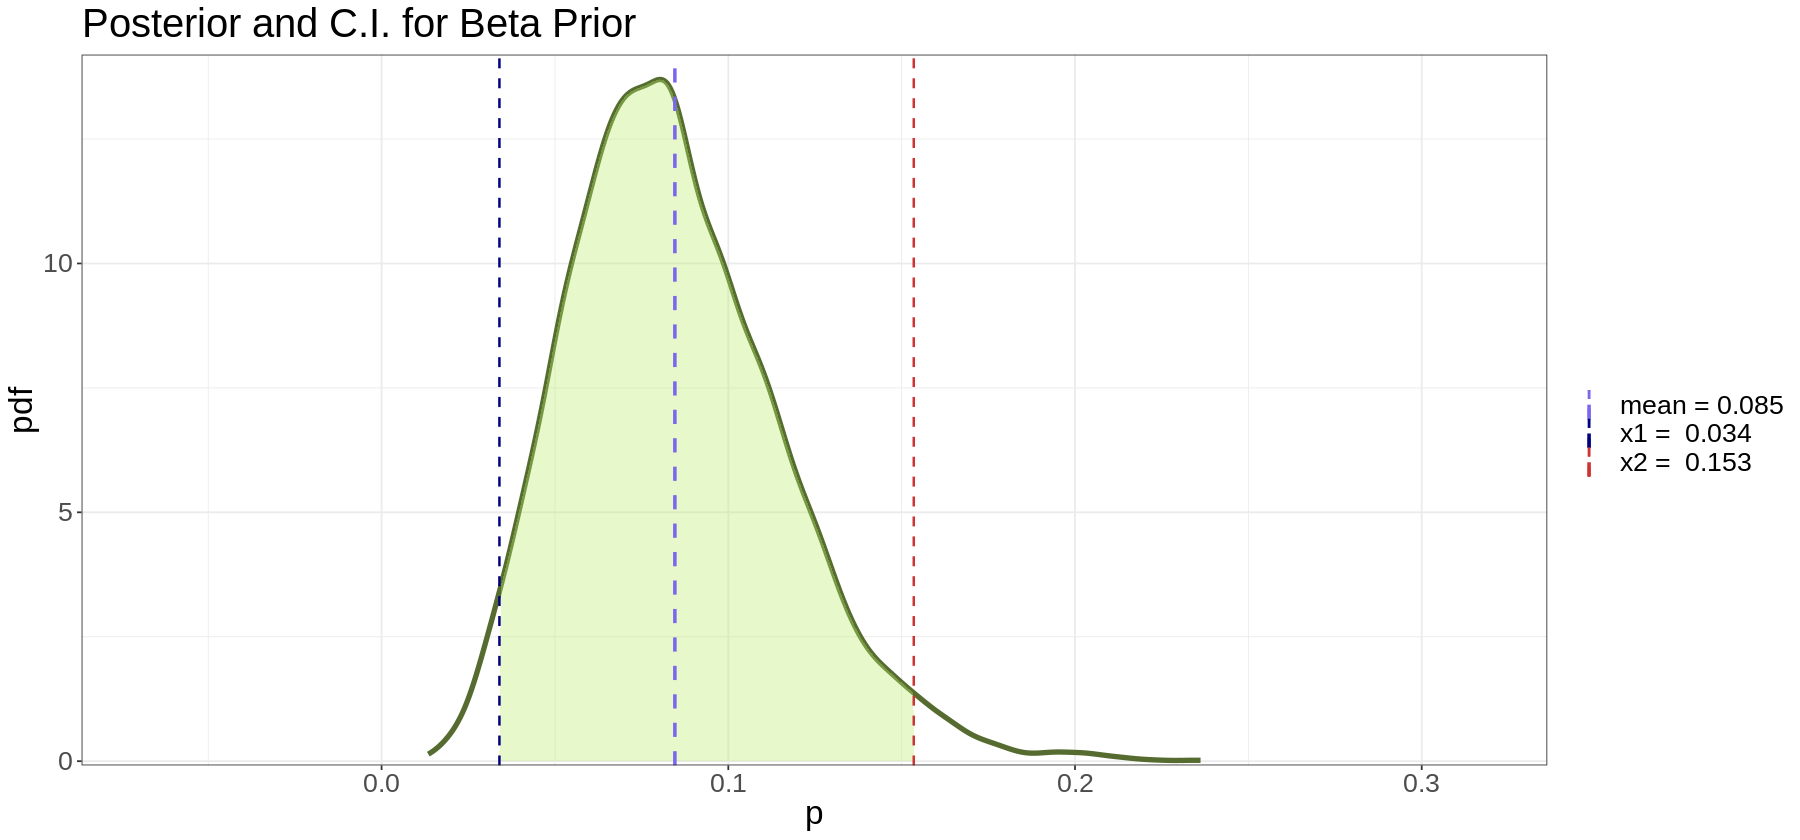

In [7]:
#N of patients
n <- 75

#N of failures of the new method
y <- 6

m <- 0.15
std <- 0.14
a_prior <- m^2*(1-m)/std^2 - m
b_prior <- (1-m)*a_prior/m

a_post <- a_prior + y
b_post <- b_prior + n - y

mean <- (a_prior + y)/(a_prior + b_prior + n) #same as a_post/(a_post + b_post)
var <- (a_prior + y)*(b_prior + n - y)/(a_prior + b_prior + n)^2/(a_prior + b_prior + n + 1)


#use jags now

path_4 <- './model_4.bug'

model <- 'model {

    #data likelihood
    X ~ dbin(p, n);
    
    #beta prior for p
    p ~ dbeta(a_prior, b_prior);
    
    #predicted data, given p
    y ~ dbin(p, n_next);

}
'

writeLines(model , path_4)

data <- NULL
data$a_prior<- a_prior
data$b_prior <- b_prior
data$X <- y #Set of observations
data$n <- n #those to be considered
data$n_next <- 10 #predictions

jm <- jags.model('model_4.bug', data, n.adapt=1000, n.chains = 1, quiet=TRUE)
update(jm, 1000)
chain <- coda.samples(jm, c('p', 'y'), n.iter=10000)
print(summary(chain))

meanj <- unname(summary(chain)$statistics[1])
sdj <- unname(summary(chain)$statistics[3])
ci_j <- unname(summary(chain)$quantiles[c(1,9)])

chain.df <- as.data.frame(as.mcmc(chain))

cat('\n Correlation matrix : \n')
print(cor(chain.df))

cat('\n\n\nTheoretical values for Beta Prior: \n')
cat('Mean:', round(mean, 3), '\n')
cat('Sd:', round(sqrt(var), 3), '\n')

cat('\n\n\nJags estimates for Beta Prior: \n')
cat('Mean:', round(meanj, 3), '\n')
cat('Sd:', round(sdj, 3), '\n')
cat('Credibility Interval: (', round(ci_j[1], 3), round(ci_j[2], 3), ') \n')

options(repr.plot.width = 10, repr.plot.height = 10)

plot(chain, col='navy')

options(repr.plot.width = 20, repr.plot.height = 10)

#autocorrelation function for each variable in the chain
autocorr.plot(chain, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

#evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
par(mar=c(5, 4, 4, 11), xpd=TRUE)
cumuplot(chain, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles",
         lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'),
         cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
               col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
       text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
       y.intersp = 2, horiz = FALSE)


par(mar=c(5.1, 4.1, 4.1, 2.1))

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1,2))

#inference on p
hist(chain.df$p, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='p', ylab='f(p)', main='Inference on p')

# next data prediction probability
ty <- table(chain.df$y)
barplot(ty/sum(ty), col='brown3', xlab='y', ylab='f(y)', ylim=c(0,0.40),
         main = sprintf('Number of successes in %d future trials', data$n_next))

# Correlation between p and predicted variable
plot(chain.df$p, chain.df$y, xlab='p', ylab='y', pch='+', col='navy ',
     cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between p and predicted variable')


#find 95% credibility interval and mean
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1,1))

dataj <- ggplot_build(ggplot() + geom_density(data=chain.df, mapping=aes(x=p)))$data[[1]][c("x","y")]

shaded <- rbind(c(ci_j[1], 0), subset(dataj, x > ci_j[1] & x < ci_j[2]), c(ci_j[2], 0))

jags_plot <-  ggplot() +
            geom_line(data = dataj, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
            theme_bw()+
            geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
            geom_vline(aes(xintercept = meanj, colour = paste('mean =', round(meanj, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = ci_j[1], colour = paste('x1 = ', round(ci_j[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = ci_j[2],  colour = paste('x2 = ', round(ci_j[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior and C.I. for Beta Prior')+
            scale_x_continuous(name= 'p', expand = c(0, 0), limits = c(min(dataj$x) -0.1 , max(dataj$x) + 0.1))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj$y) -0.1 , max(dataj$y) + 0.5))+
            scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                     name = '')
jags_plot

# Exercise 5

## Uniform Prior

### Set 1


 Observations set 1, uniform prior 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.6151 0.05586 0.0005586      0.0005586
y      0.6089 0.78218 0.0078218      0.0078218

2. Quantiles for each variable:

         2.5%   25%    50%    75% 97.5%
lambda 0.5088 0.577 0.6144 0.6523 0.728
y      0.0000 0.000 0.0000 1.0000 2.000


 Correlation matrix observations set 1, uniform prior: 
           lambda          y
lambda 1.00000000 0.05577198
y      0.05577198 1.00000000



Theoretical values for Uniform Prior: 
Mean: 0.615 
Sd: 0.055 



Jags estimates for Uniform Prior: 
Mean: 0.615 
Sd: 0.056 
Credibility Interval: ( 0.509 0.728 ) 


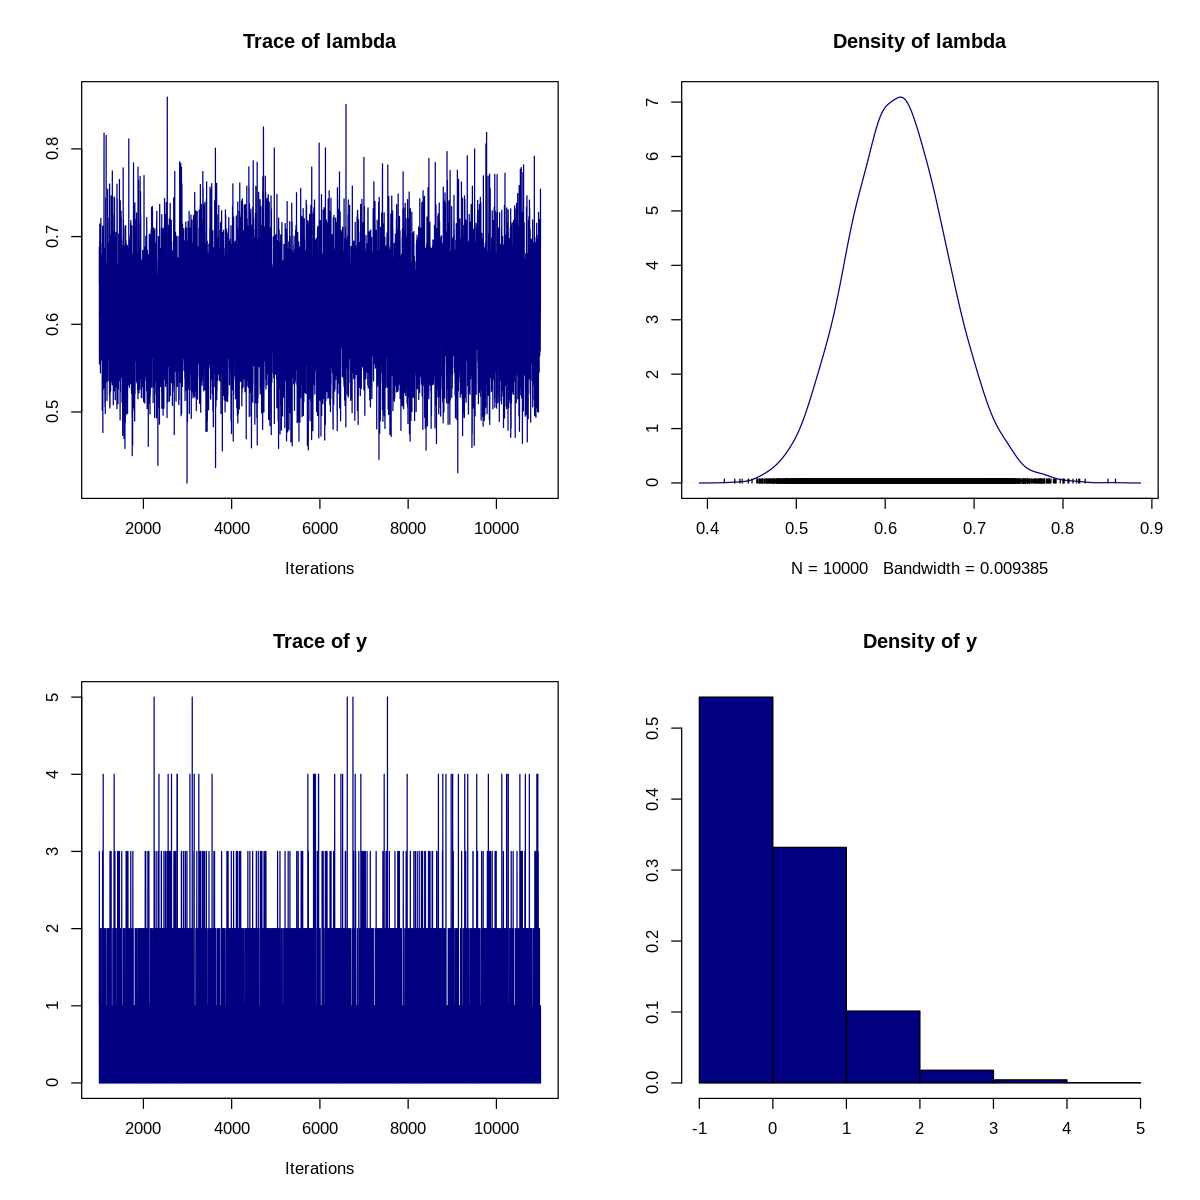

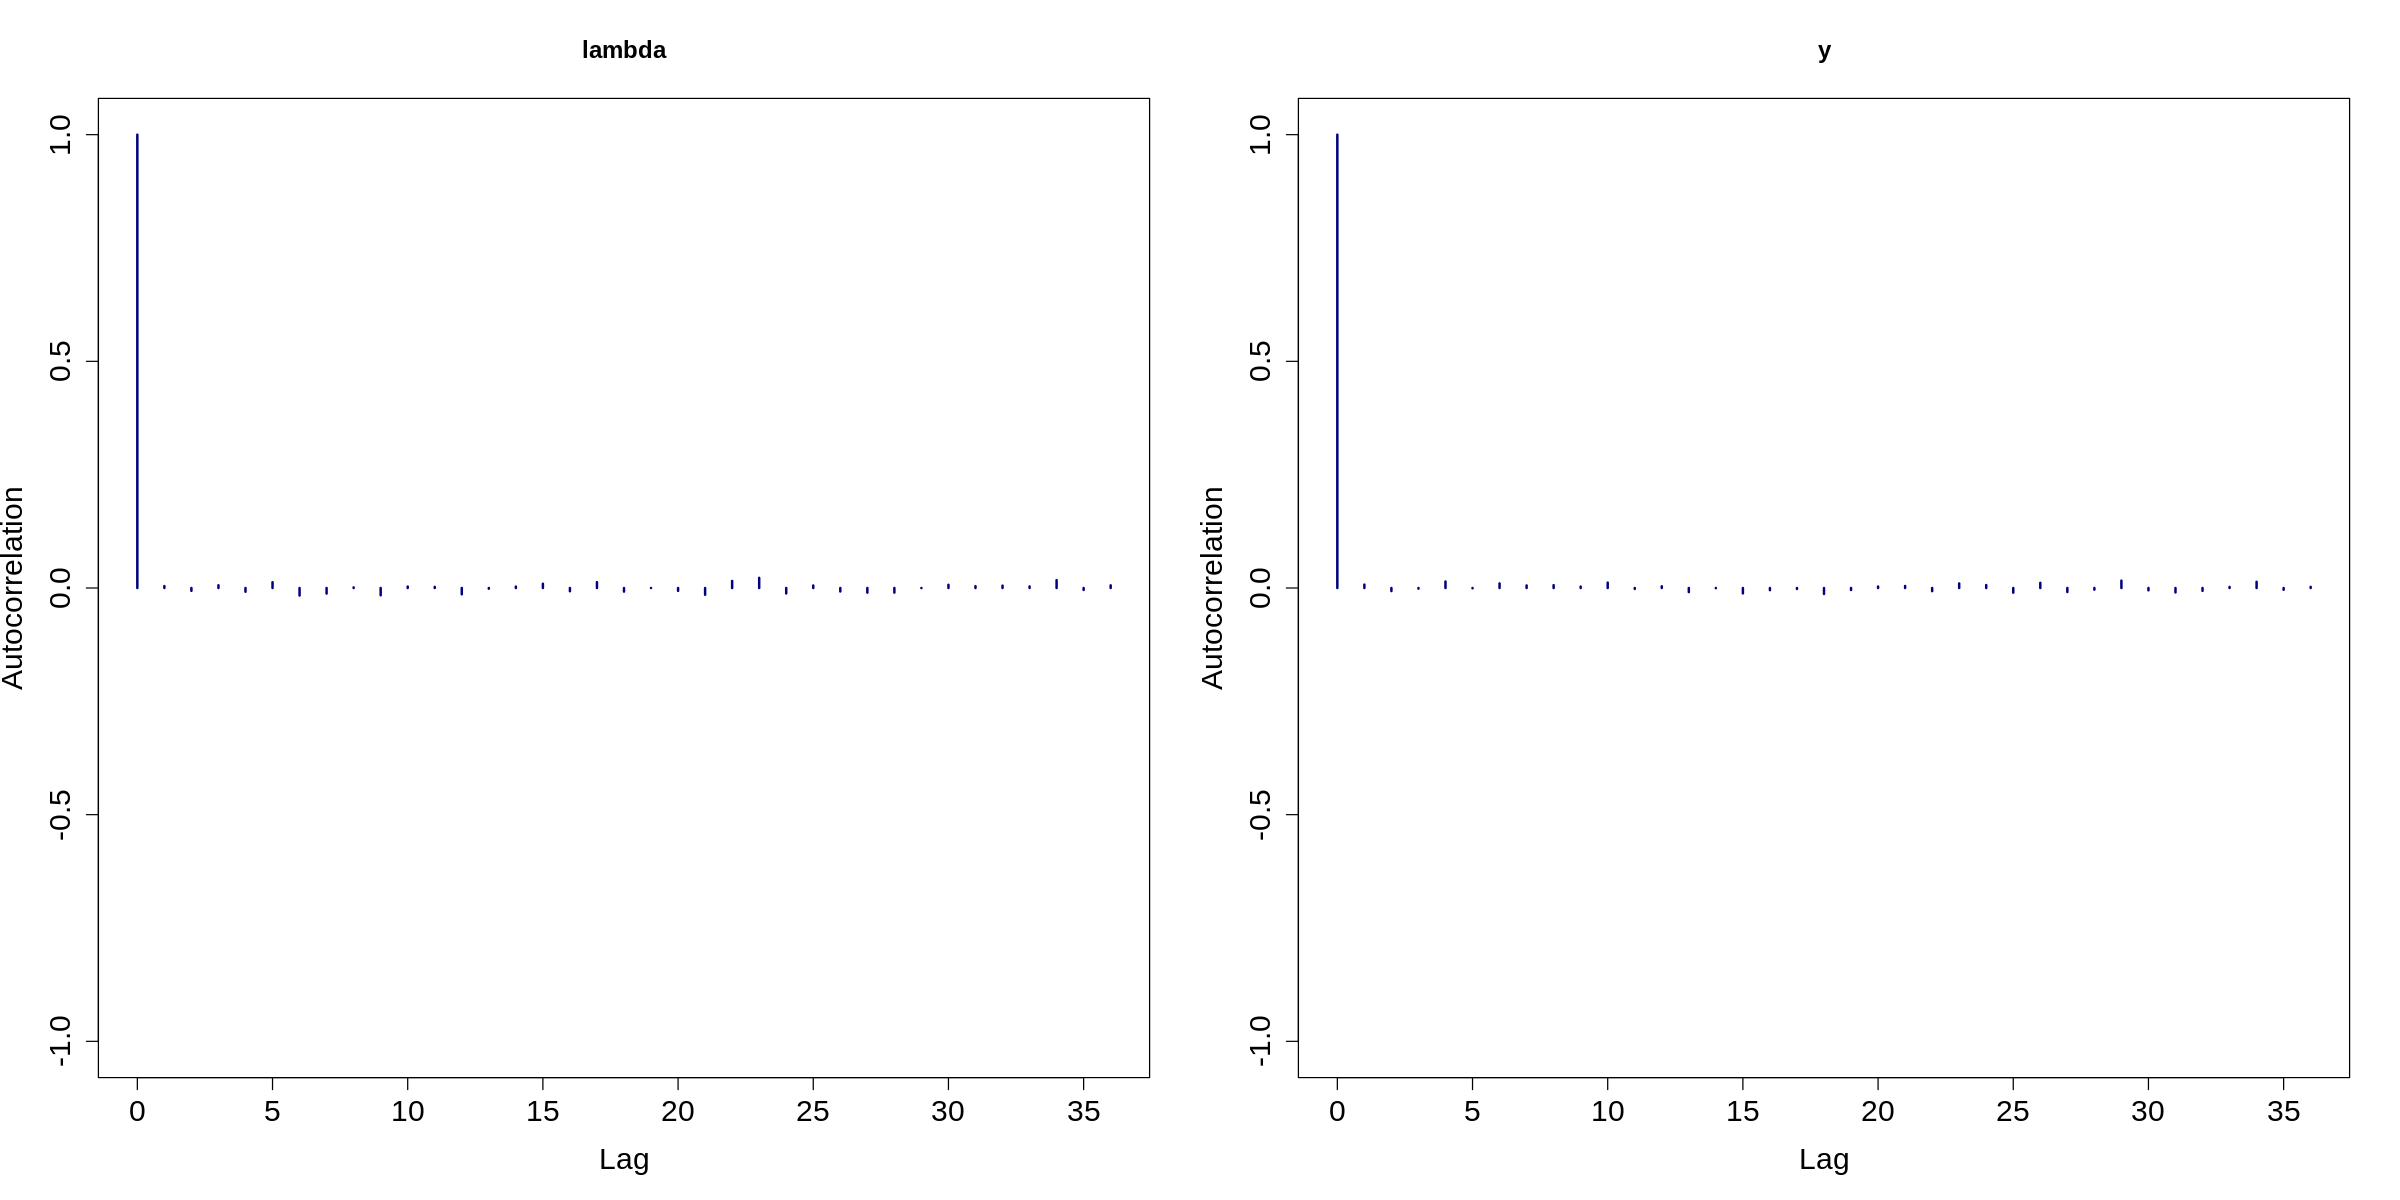

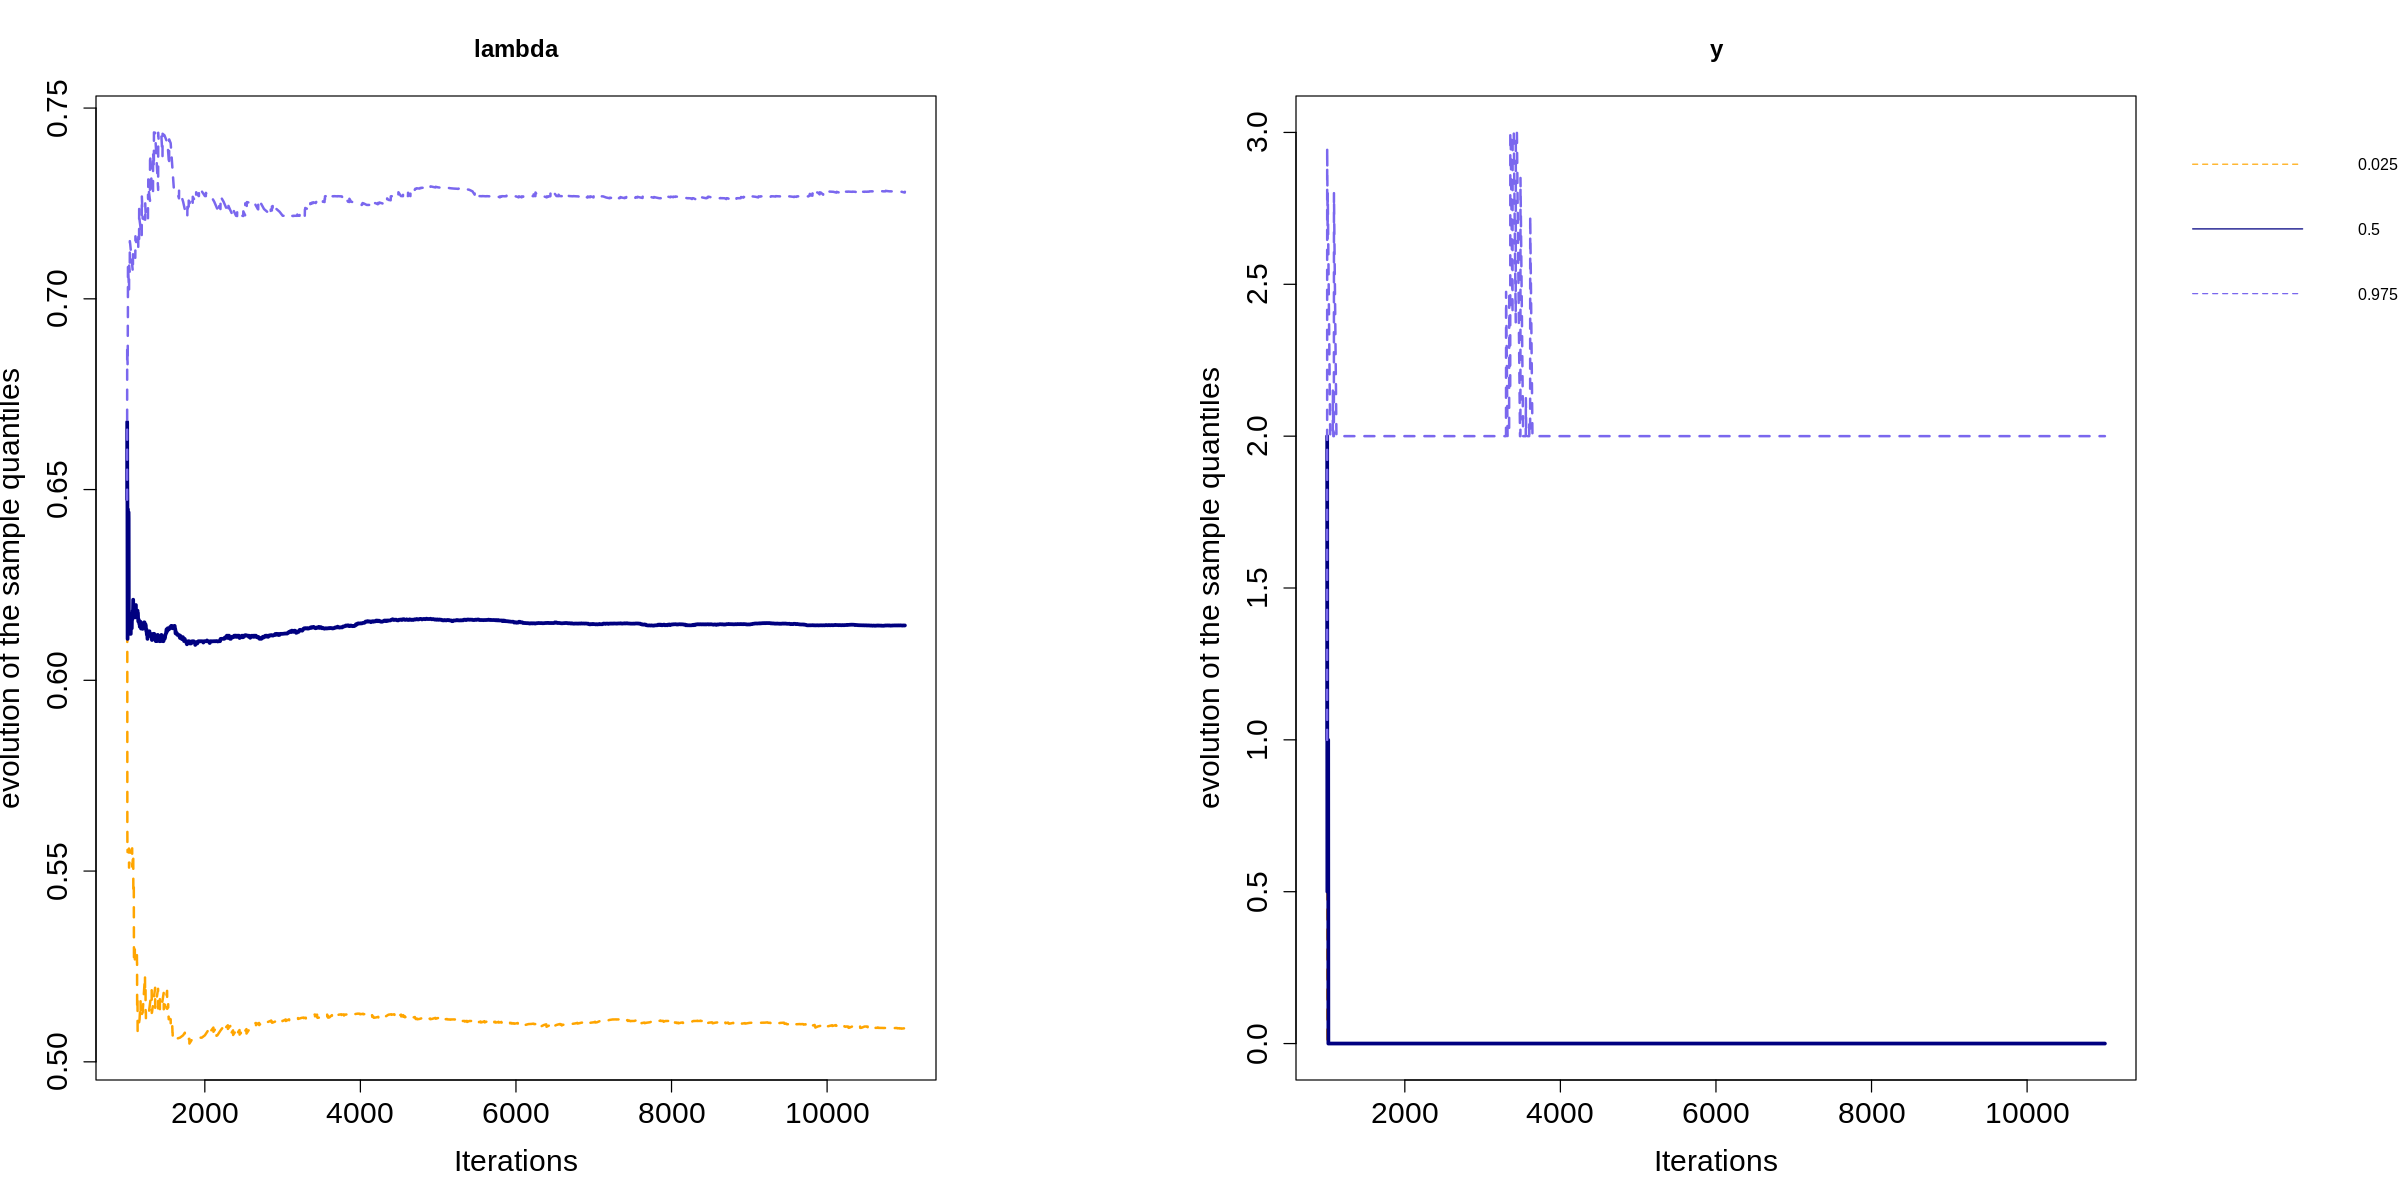

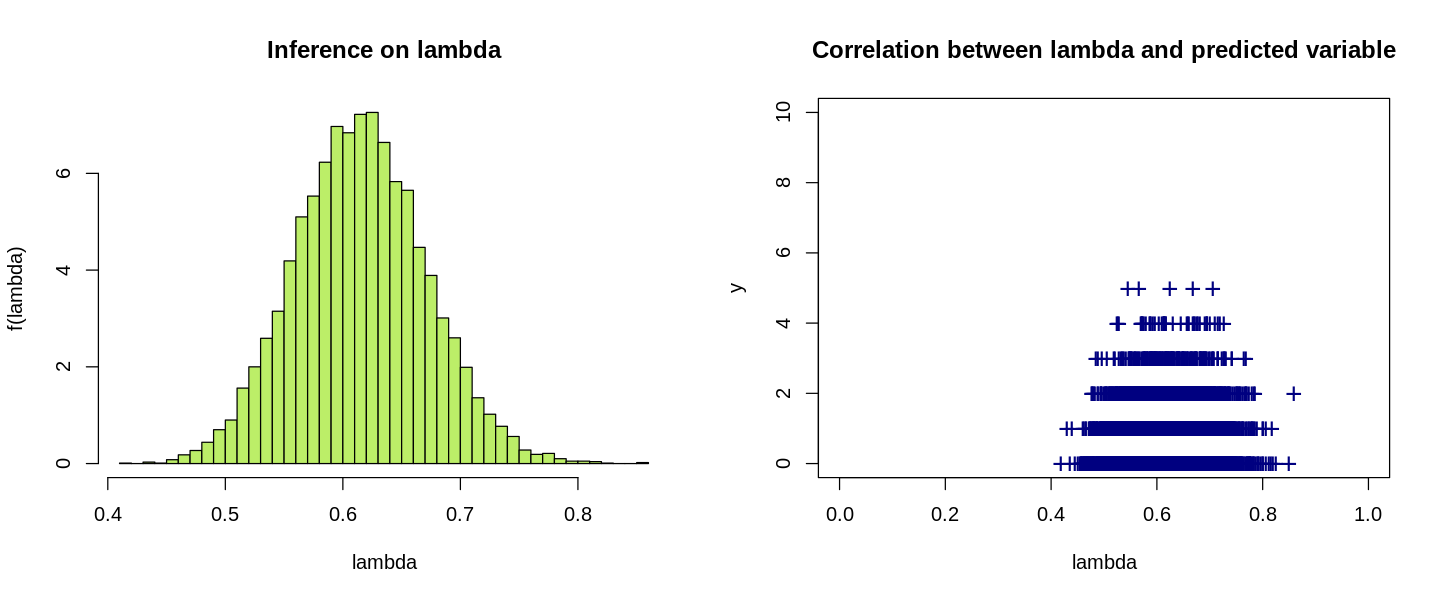

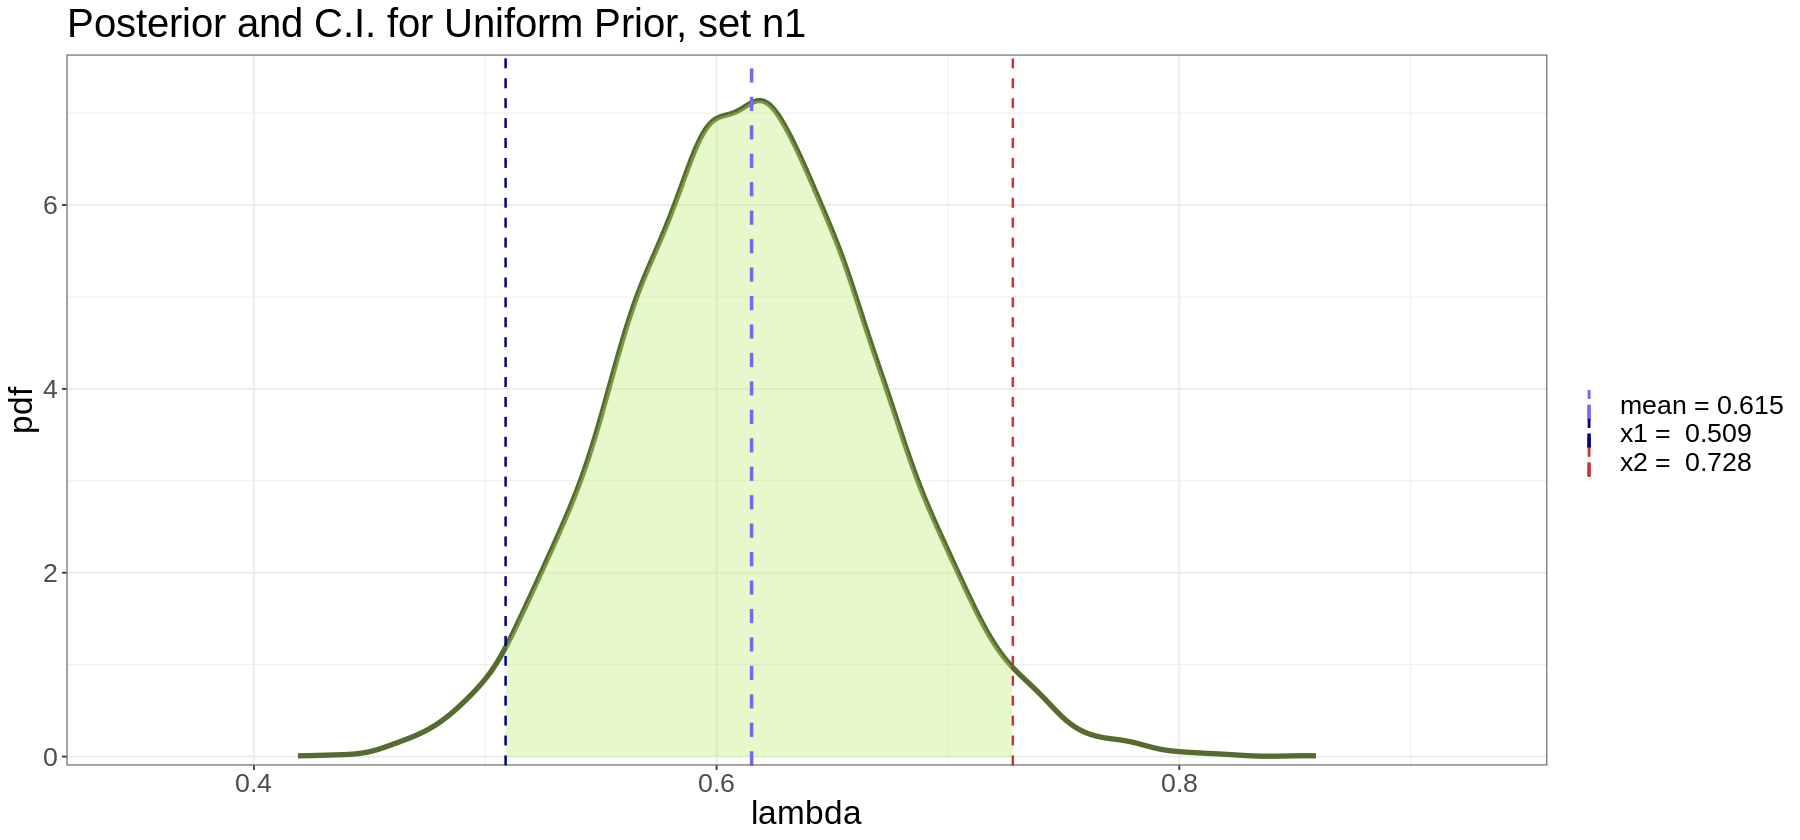

In [8]:
path_5_unif <- './model_5_unif.bug'

model_unif <- 'model {

    # data likelihood
    for (i in 1:length(X)){
      X[i] ~ dpois(lambda);
    }

    # a uniform prior for lambda
    lambda ~ dexp(0.00001);

    # Predicted data , given lambda
    y ~ dpois( lambda );
}'


writeLines(model_unif , path_5_unif)

n_deaths <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

#repeat each value of n_deaths the corresponding number of times
obs_1 <- rep(x = n_deaths, times = n1)
obs_2 <- rep(x = n_deaths, times = n2)

data_1 <- NULL
data_1$X <- obs_1

data_2 <- NULL
data_2$X <- obs_2

#set observations 1
jm1unif <- jags.model('model_5_unif.bug', data_1, n.adapt=1000, n.chains = 1, quiet=TRUE)
update(jm1unif, 1000)
chain1unif <- coda.samples(jm1unif, c('lambda', 'y'), n.iter=10000)
cat('\n Observations set 1, uniform prior \n')
print(summary(chain1unif))

chain1unif.df <- as.data.frame(as.mcmc(chain1unif))
cat('\n Correlation matrix observations set 1, uniform prior: \n')
print(cor(chain1unif.df))

mean_th_1 <- (sum(obs_1) + 1)/sum(n1)
var_th_1 <- (sum(obs_1) + 1)/(sum(n1))^2
    
    
mean_1 <- unname(summary(chain1unif)$statistics[1])
sd_1 <- unname(summary(chain1unif)$statistics[3])
ci_j_1 <- unname(summary(chain1unif)$quantiles[c(1,9)])


cat('\n\n\nTheoretical values for Uniform Prior: \n')
cat('Mean:', round(mean_th_1, 3), '\n')
cat('Sd:', round(sqrt(var_th_1), 3), '\n')

cat('\n\n\nJags estimates for Uniform Prior: \n')
cat('Mean:', round(mean_1, 3), '\n')
cat('Sd:', round(sd_1, 3), '\n')
cat('Credibility Interval: (', round(ci_j_1[1], 3), round(ci_j_1[2], 3), ') \n')


#plots
options(repr.plot.width = 10, repr.plot.height = 10)

plot(chain1unif, col='navy')

options(repr.plot.width = 20, repr.plot.height = 10)

#autocorrelation function for each variable in the chain
autocorr.plot(chain1unif, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

#evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
par(mar=c(5, 4, 4, 11), xpd=TRUE)
cumuplot(chain1unif, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
               col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
       text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
       y.intersp = 2, horiz = FALSE)


par(mar=c(5.1, 4.1, 4.1, 2.1))

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1,2))

#inference on lambda
hist(chain1unif.df$lambda, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

# Correlation between p and predicted variable
plot(chain1unif.df$lambda, chain1unif.df$y, xlab='lambda', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between lambda and predicted variable')

#find 95% credibility interval and mean
options(repr.plot.width = 15, repr.plot.height = 7)

dataj_1 <- ggplot_build(ggplot() + geom_density(data=chain1unif.df, mapping=aes(x=lambda)))$data[[1]][c("x","y")]


shaded <- rbind(c(ci_j_1[1], 0), subset(dataj_1, x > ci_j_1[1] & x < ci_j_1[2]), c(ci_j_1[2], 0))

jags_plot_1 <-  ggplot() +
            geom_line(data = dataj_1, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
            theme_bw()+
            geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
            geom_vline(aes(xintercept = mean_1 , colour = paste('mean =', round(mean_1, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = ci_j_1[1], colour = paste('x1 = ', round(ci_j_1[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = ci_j_1[2],  colour = paste('x2 = ', round(ci_j_1[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior and C.I. for Uniform Prior, set n1')+
            scale_x_continuous(name= 'lambda', expand = c(0, 0), limits = c(min(dataj_1$x) -0.1 , max(dataj_1$x) + 0.1))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj_1$y) -0.1 , max(dataj_1$y) + 0.5))+
            scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                     name = '')
jags_plot_1

### Set 2


 Observations set 2, uniform prior 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.7036 0.05005 0.0005005      0.0005005
y      0.6860 0.82588 0.0082588      0.0082588

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.6086 0.6696 0.7028 0.7362 0.8052
y      0.0000 0.0000 0.0000 1.0000 3.0000


 Correlation matrix observations set 2, uniform prior: 
           lambda          y
lambda 1.00000000 0.06635833
y      0.06635833 1.00000000



Theoretical values for Uniform Prior: 
Mean: 0.704 
Sd: 0.05 



Jags estimates for Uniform Prior: 
Mean: 0.704 
Sd: 0.05 
Credibility Interval: ( 0.609 0.805 ) 


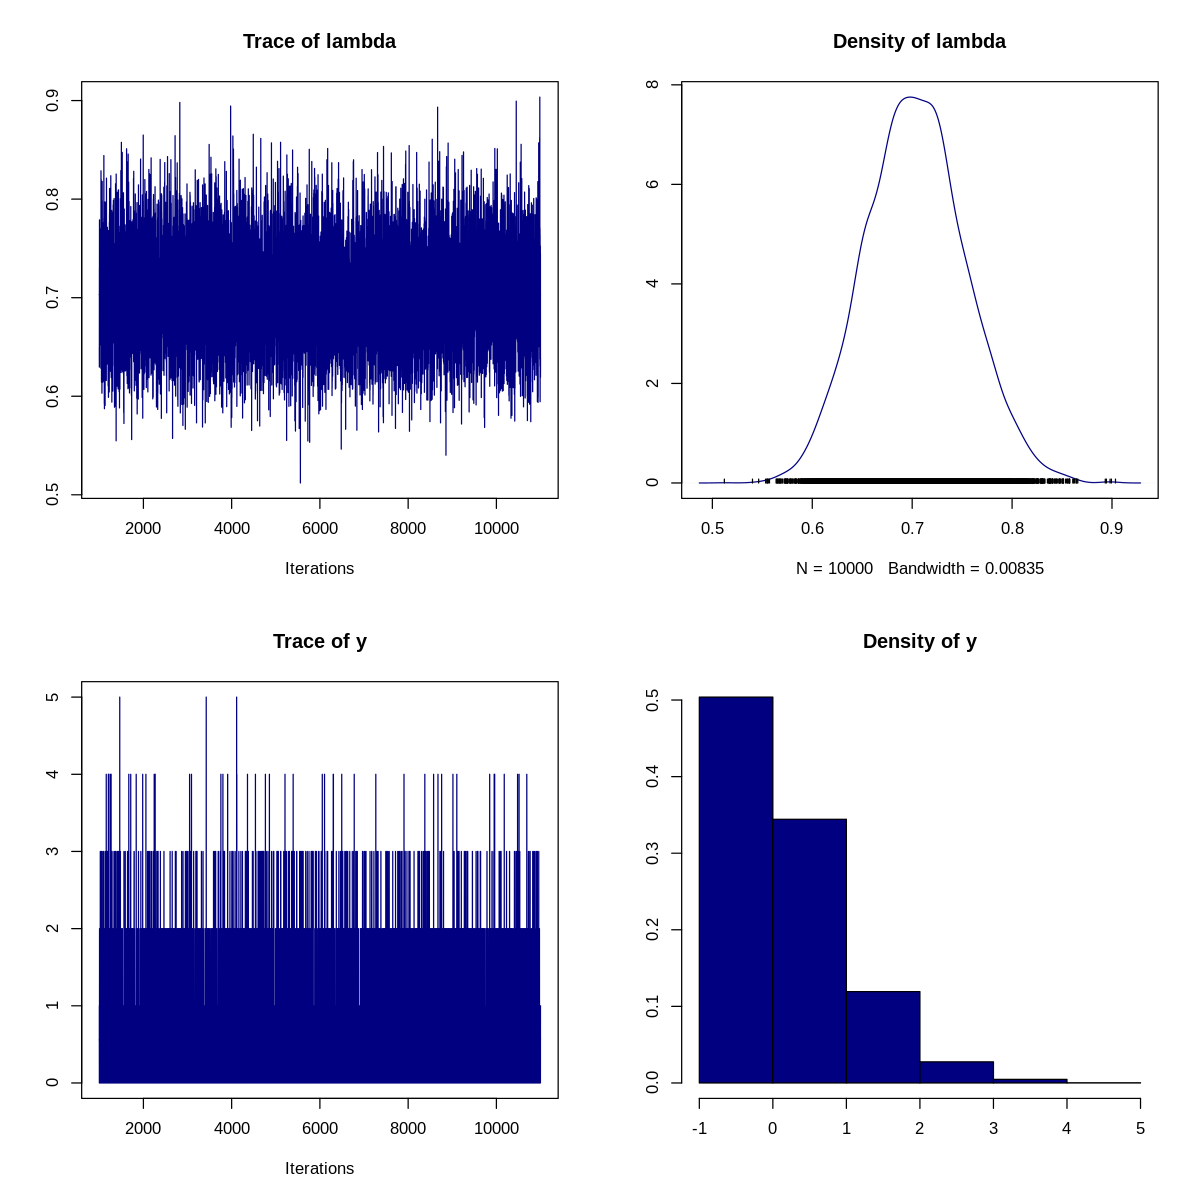

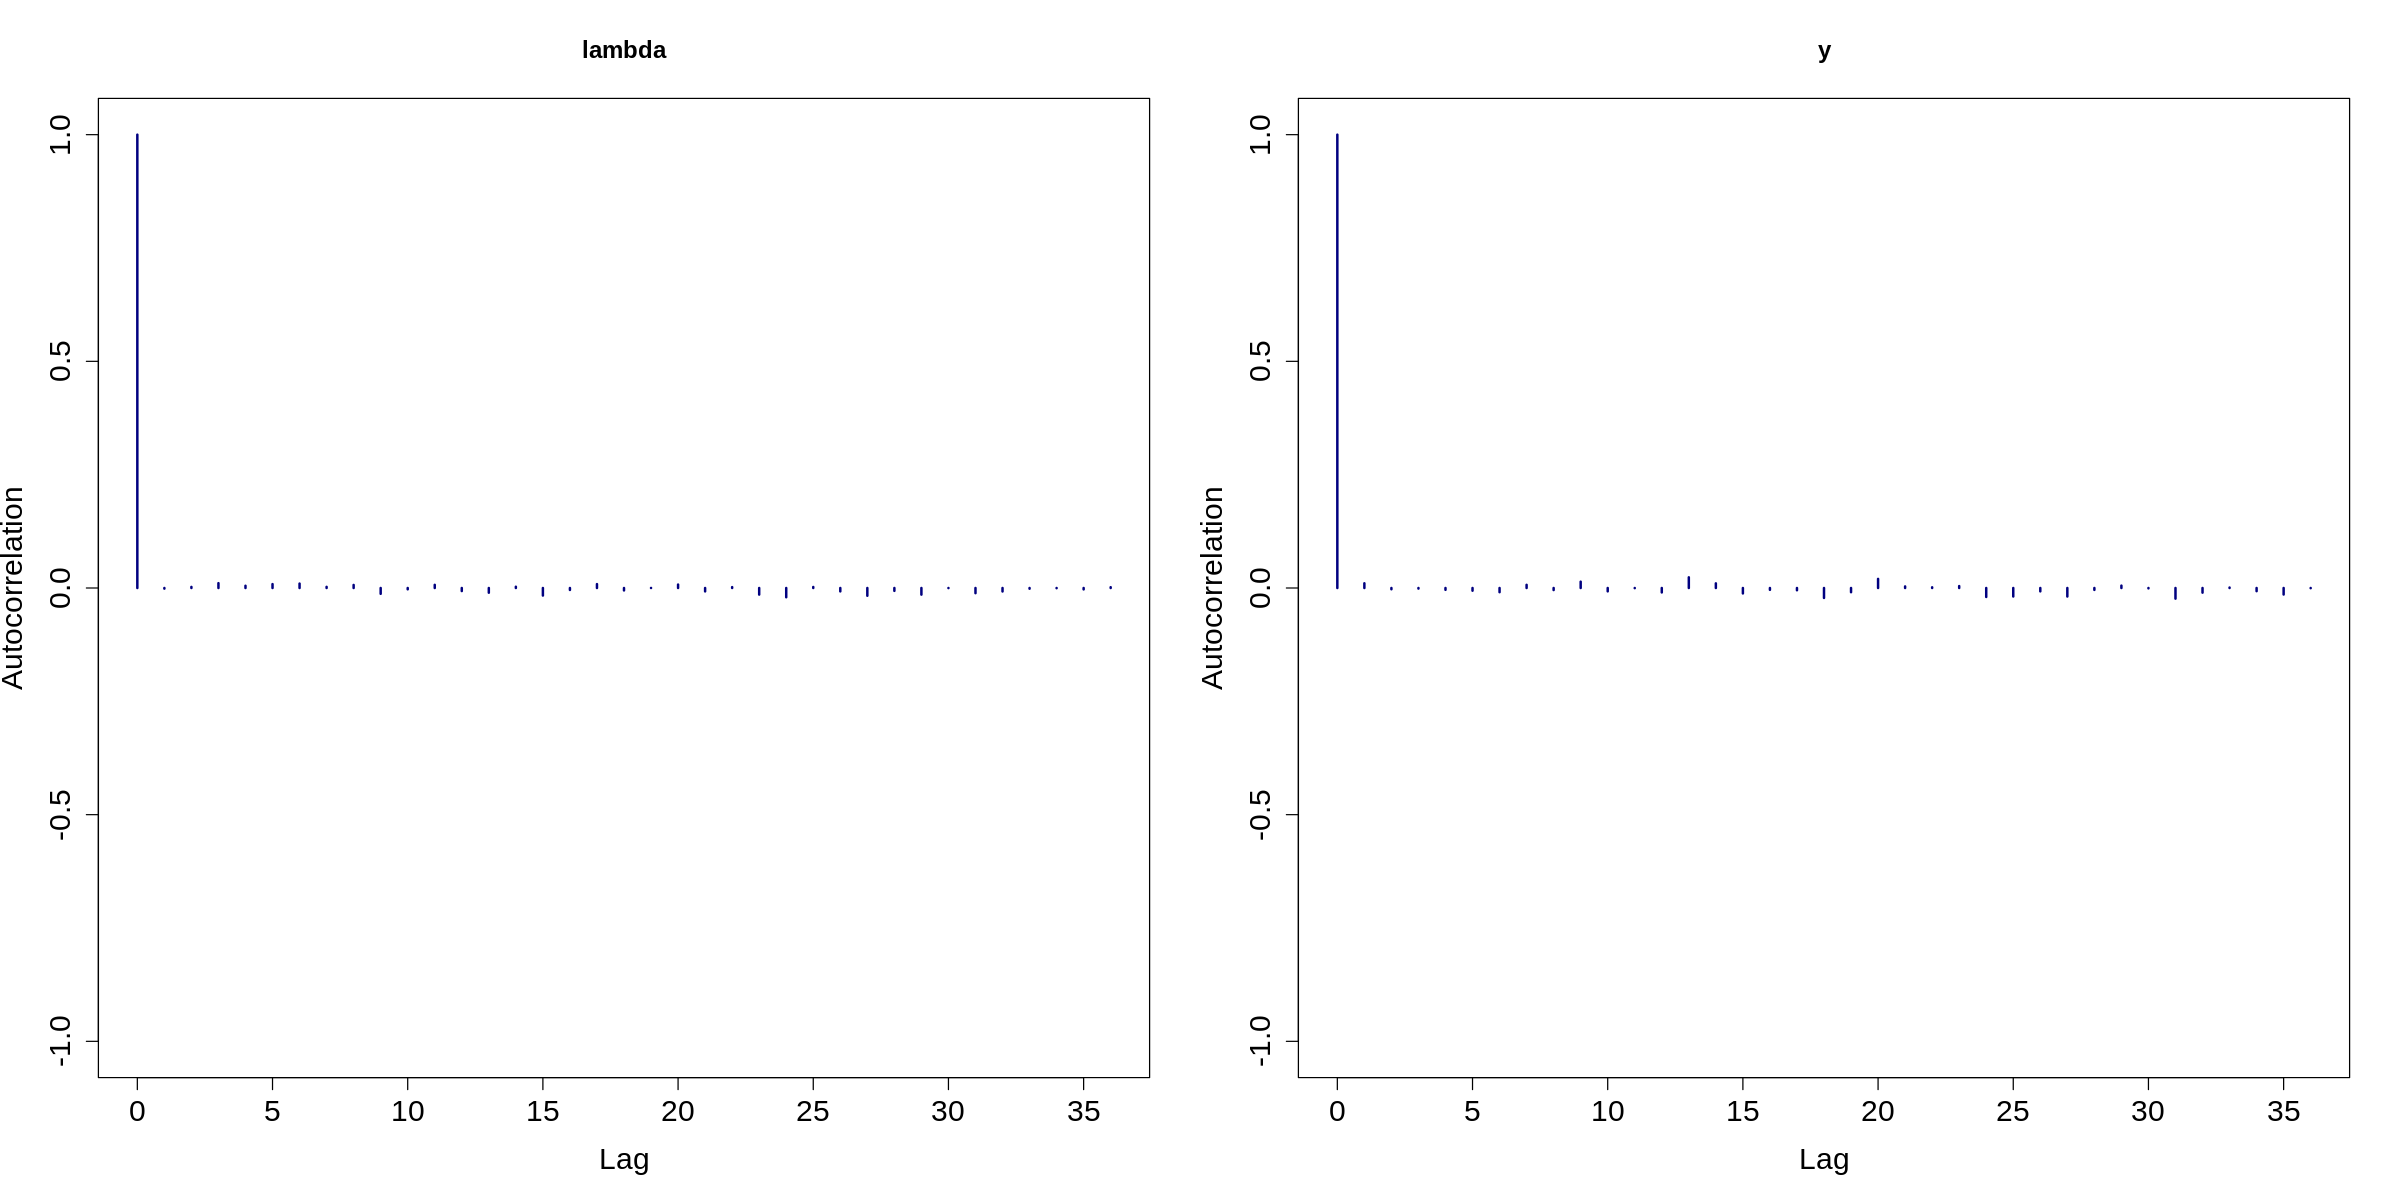

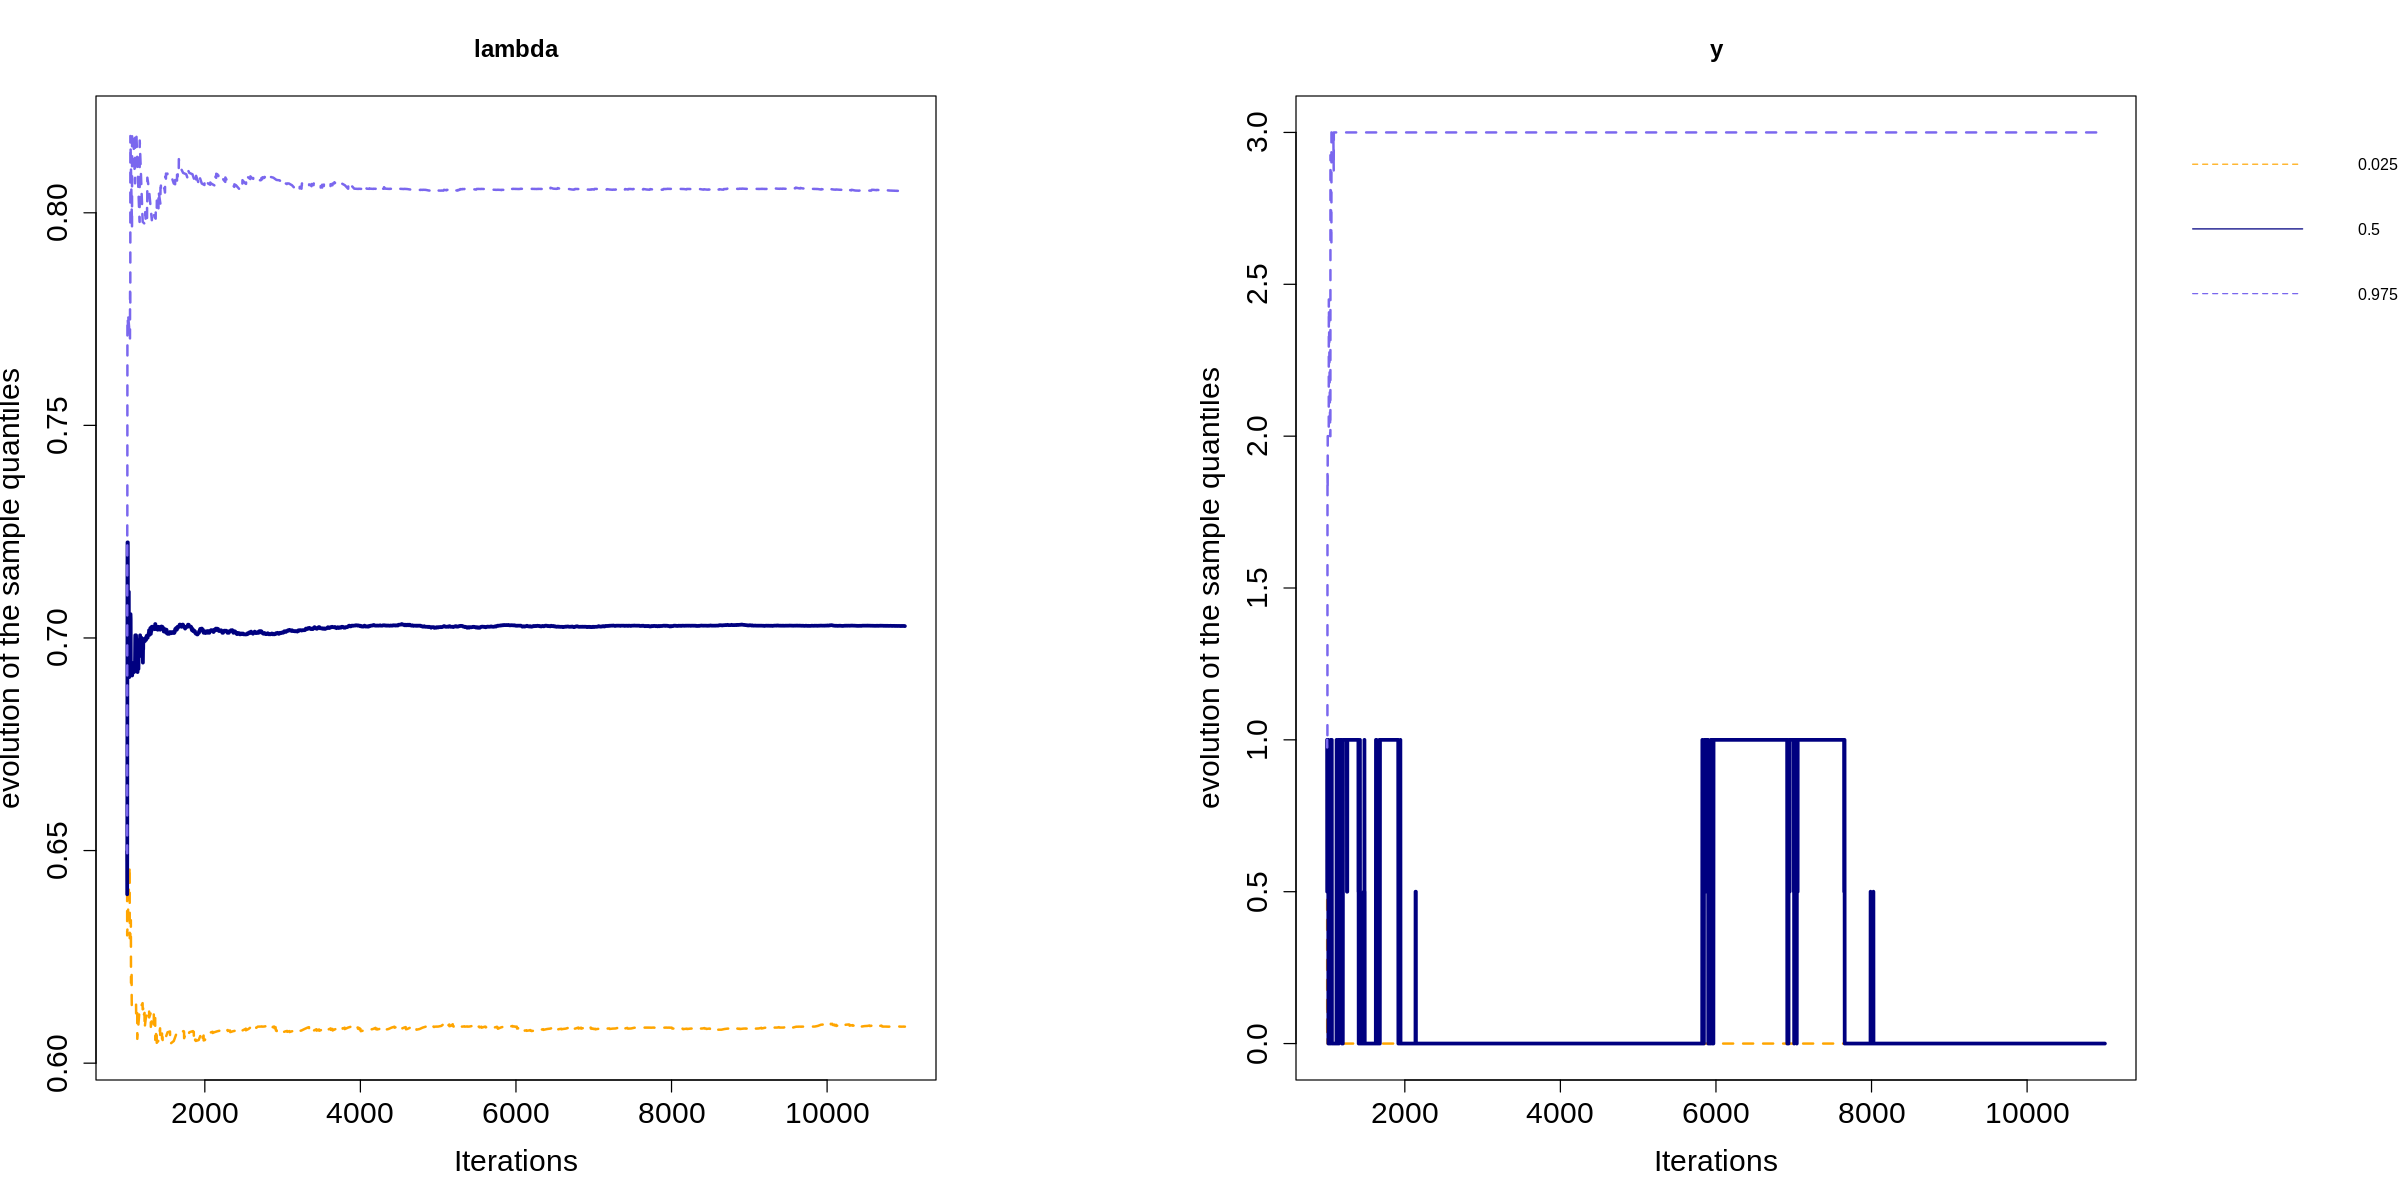

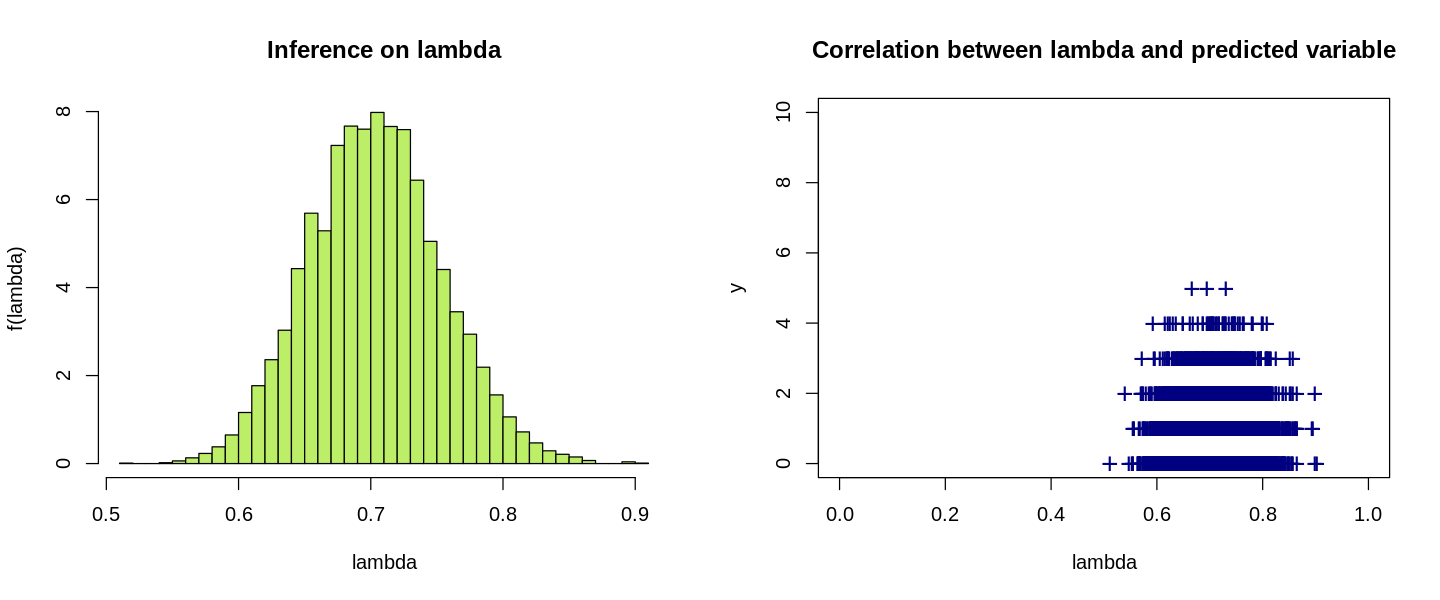

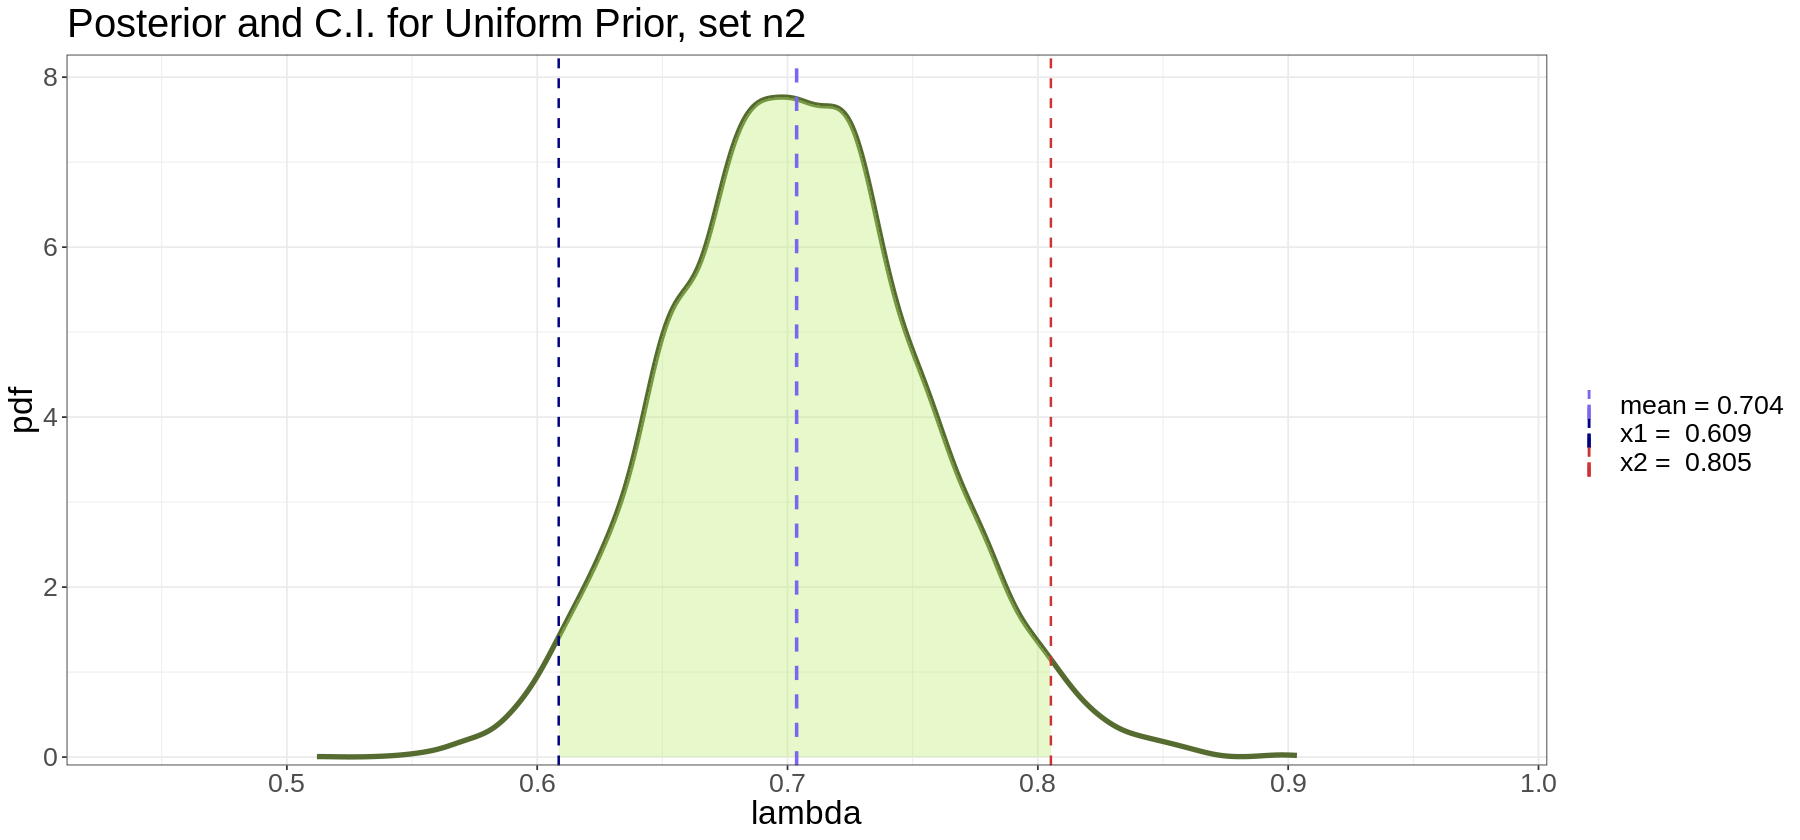

In [9]:
#set observations 2
jm2unif <- jags.model('model_5_unif.bug' , data_2, n.adapt=1000, n.chains = 1, quiet=TRUE)
update(jm2unif, 1000)
chain2unif <- coda.samples(jm2unif, c('lambda', 'y'), n.iter=10000)
cat('\n Observations set 2, uniform prior \n')
print(summary(chain2unif))

chain2unif.df <- as.data.frame(as.mcmc(chain2unif))
cat('\n Correlation matrix observations set 2, uniform prior: \n')
print(cor(chain2unif.df))

mean_th_2 <- (sum(obs_2) + 1)/sum(n2)
var_th_2 <- (sum(obs_2) + 1)/(sum(n2))^2
    

mean_2 <- unname(summary(chain2unif)$statistics[1])
sd_2 <- unname(summary(chain2unif)$statistics[3])
ci_j_2 <- unname(summary(chain2unif)$quantiles[c(1,9)])


cat('\n\n\nTheoretical values for Uniform Prior: \n')
cat('Mean:', round(mean_th_2, 3), '\n')
cat('Sd:', round(sqrt(var_th_2), 3), '\n')

cat('\n\n\nJags estimates for Uniform Prior: \n')
cat('Mean:', round(mean_2, 3), '\n')
cat('Sd:', round(sd_2, 3), '\n')
cat('Credibility Interval: (', round(ci_j_2[1], 3), round(ci_j_2[2], 3), ') \n')


#plots
options(repr.plot.width = 10, repr.plot.height = 10)

plot(chain2unif, col='navy')

options(repr.plot.width = 20, repr.plot.height = 10)

#autocorrelation function for each variable in the chain
autocorr.plot(chain2unif, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

#evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
par(mar=c(5, 4, 4, 11), xpd=TRUE)
cumuplot(chain2unif, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
               col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
       text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
       y.intersp = 2, horiz = FALSE)


par(mar=c(5.1, 4.1, 4.1, 2.1))

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1,2))

#inference on lambda
hist(chain2unif.df$lambda, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

# Correlation between p and predicted variable
plot(chain2unif.df$lambda, chain2unif.df$y, xlab='lambda', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between lambda and predicted variable')

#find 95% credibility interval and mean
options(repr.plot.width = 15, repr.plot.height = 7)

dataj_2 <- ggplot_build(ggplot() + geom_density(data=chain2unif.df, mapping=aes(x=lambda)))$data[[1]][c("x","y")]


shaded <- rbind(c(ci_j_2[1], 0), subset(dataj_2, x > ci_j_2[1] & x < ci_j_2[2]), c(ci_j_2[2], 0))

jags_plot_2 <-  ggplot() +
            geom_line(data = dataj_2, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
            theme_bw()+
            geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
            geom_vline(aes(xintercept = mean_2 , colour = paste('mean =', round(mean_2, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = ci_j_2[1], colour = paste('x1 = ', round(ci_j_2[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = ci_j_2[2],  colour = paste('x2 = ', round(ci_j_2[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior and C.I. for Uniform Prior, set n2')+
            scale_x_continuous(name= 'lambda', expand = c(0, 0), limits = c(min(dataj_2$x) -0.1 , max(dataj_2$x) + 0.1))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj_2$y) -0.1 , max(dataj_2$y) + 0.5))+
            scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                     name = '')
jags_plot_2


## Jeffrey's Prior

### Set 1


 Observations set 1, jeffreys prior 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.6131 0.05529 0.0005529      0.0005223
y      0.6029 0.78146 0.0078146      0.0078146

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.5109 0.5747 0.6112 0.6493 0.7276
y      0.0000 0.0000 0.0000 1.0000 3.0000


 Correlation matrix observations set 1, jeffreys prior: 
           lambda          y
lambda 1.00000000 0.04544202
y      0.04544202 1.00000000



Theoretical values for Jeffreys Prior: 
Mean: 0.612 
Sd: 0.055 



Jags estimates for Jeffreys Prior: 
Mean: 0.613 
Sd: 0.055 
Credibility Interval: ( 0.511 0.728 ) 


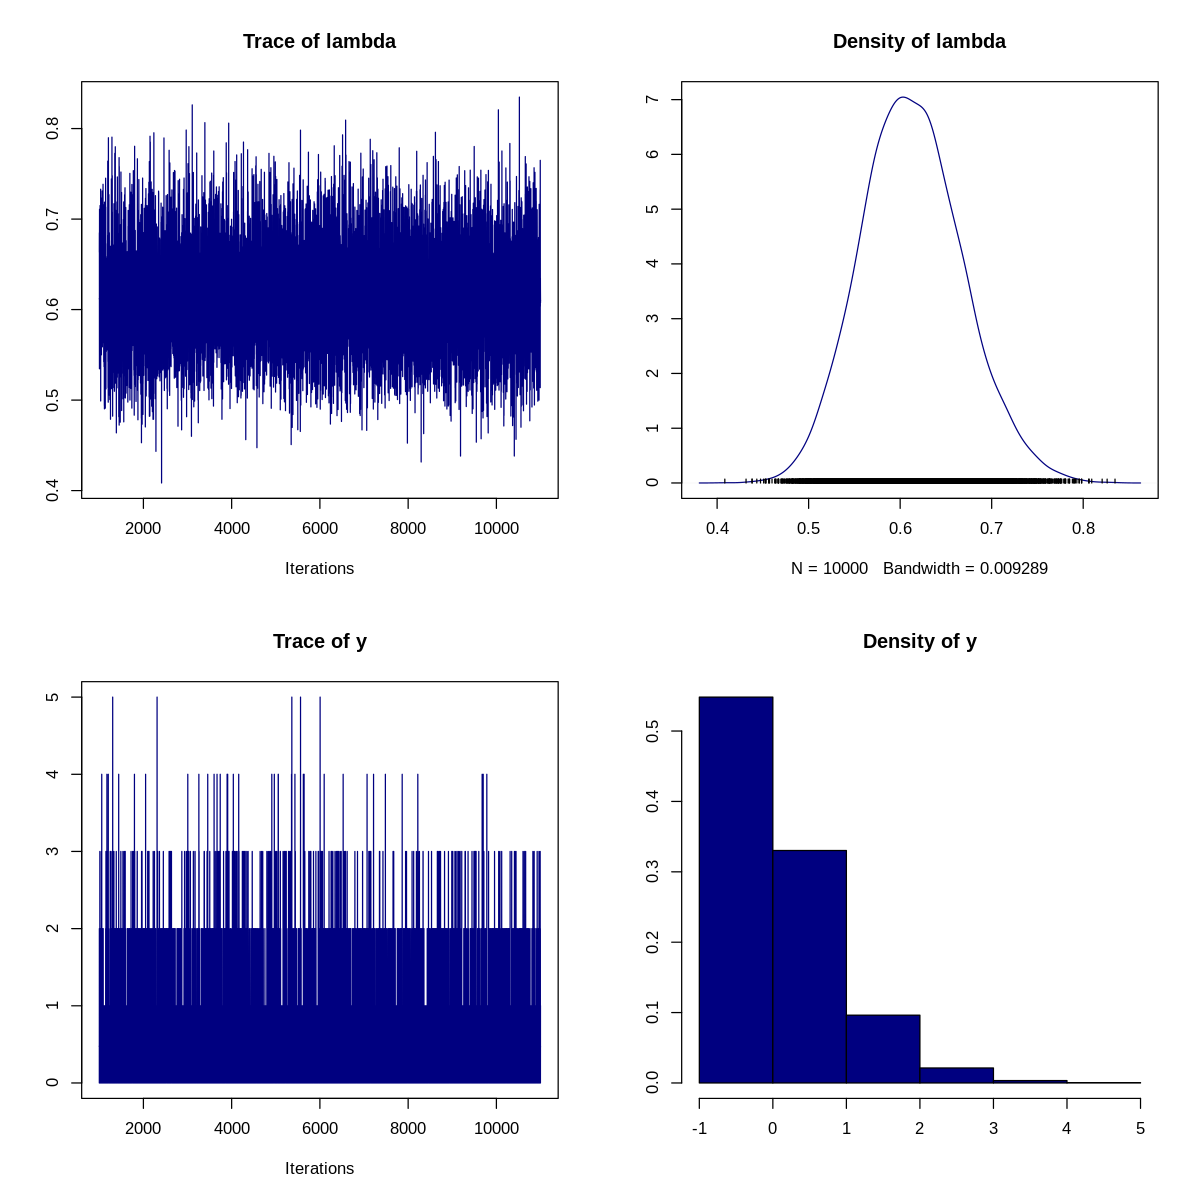

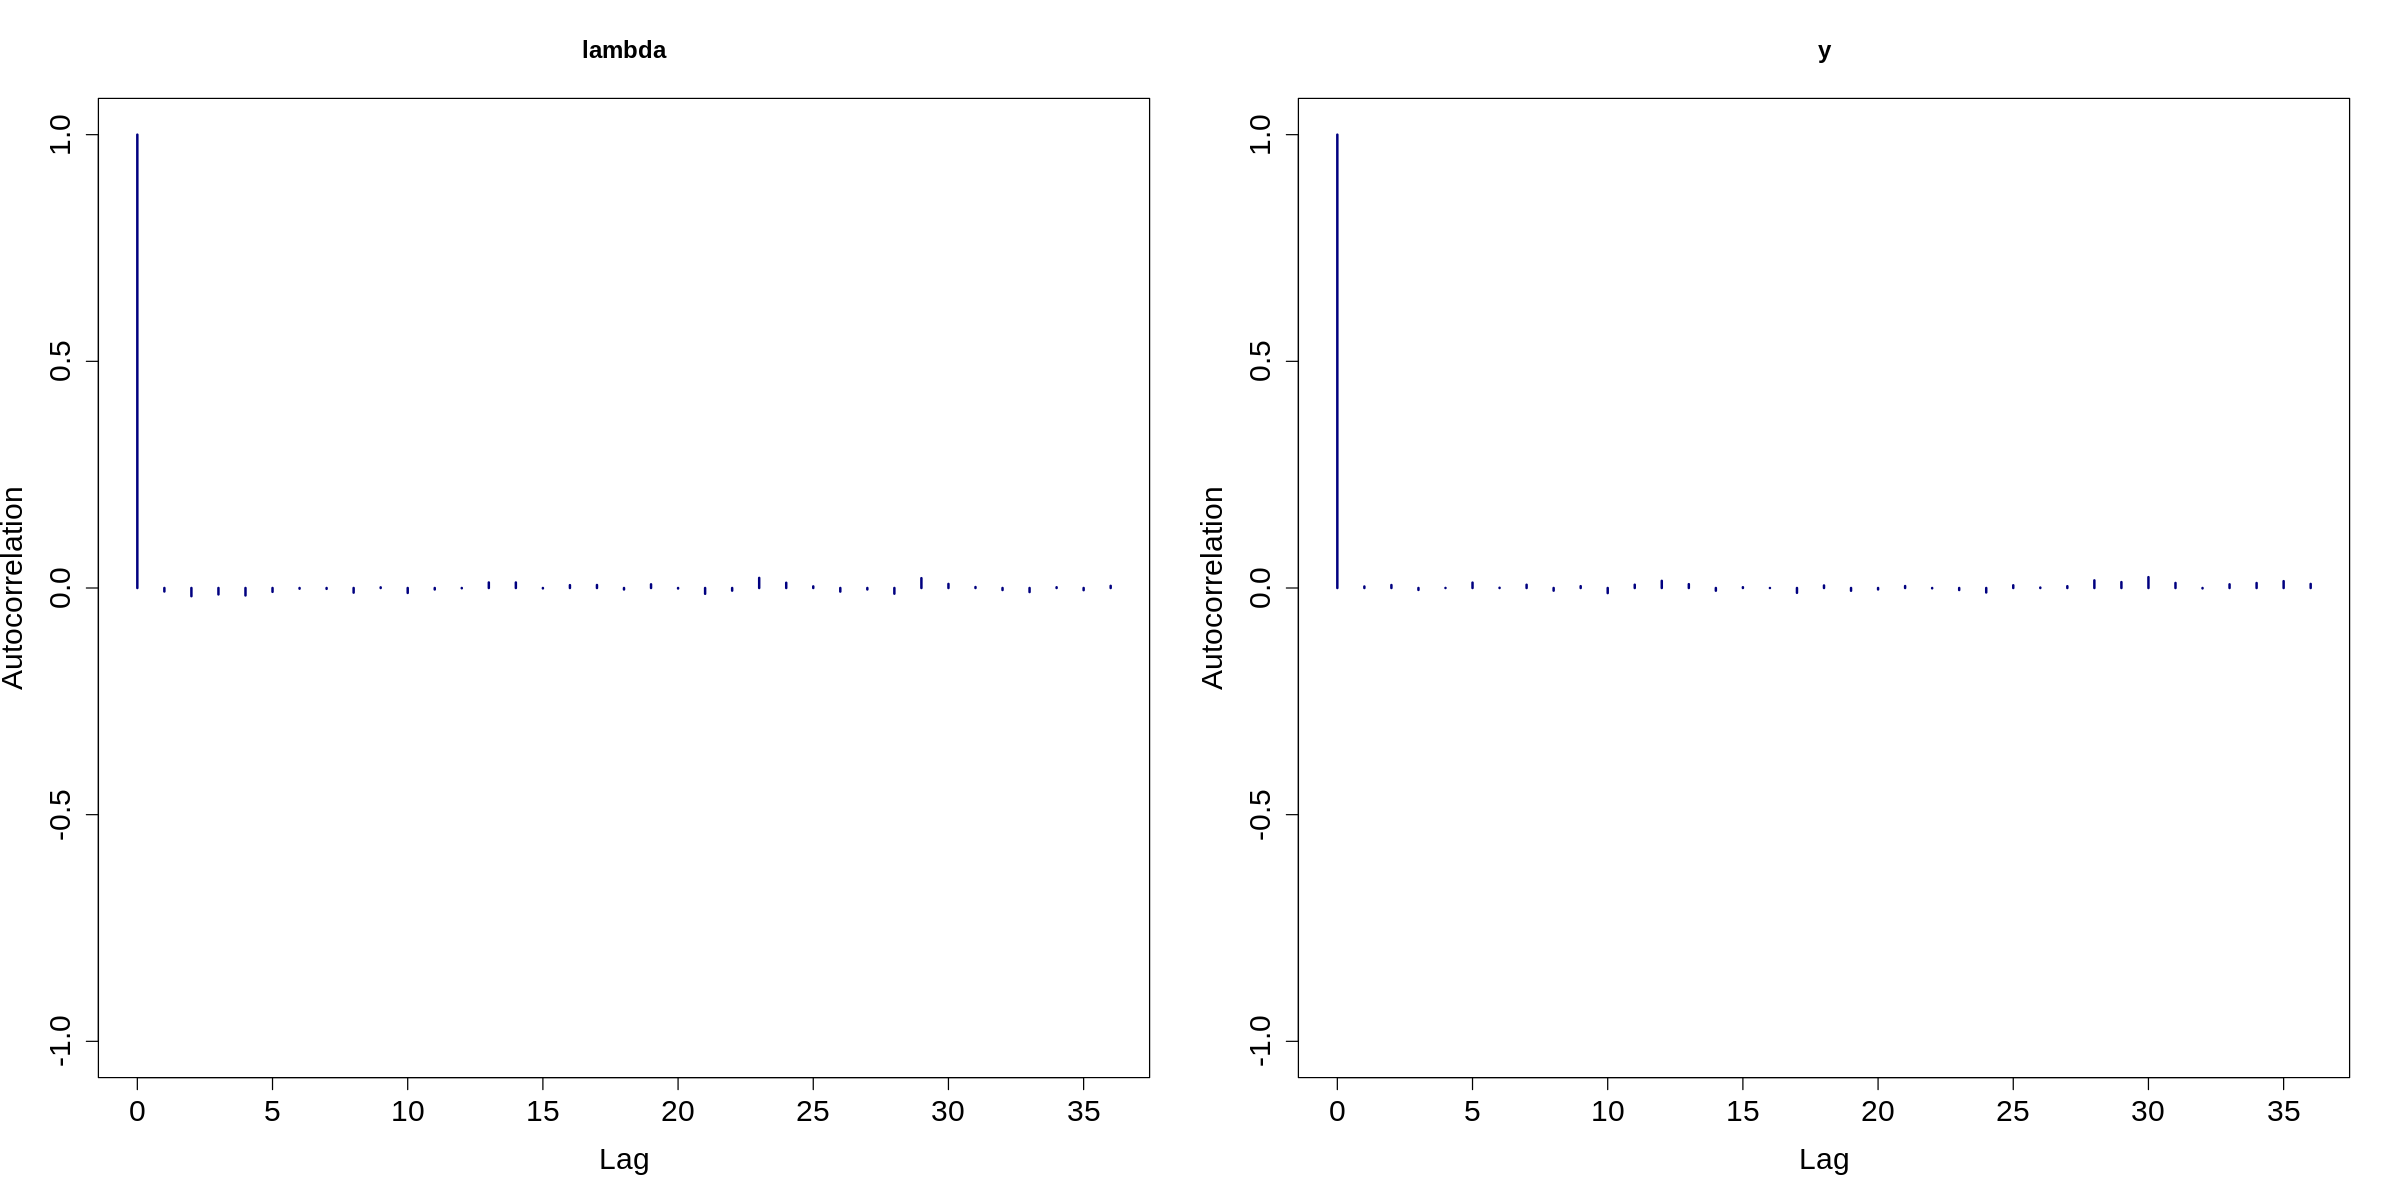

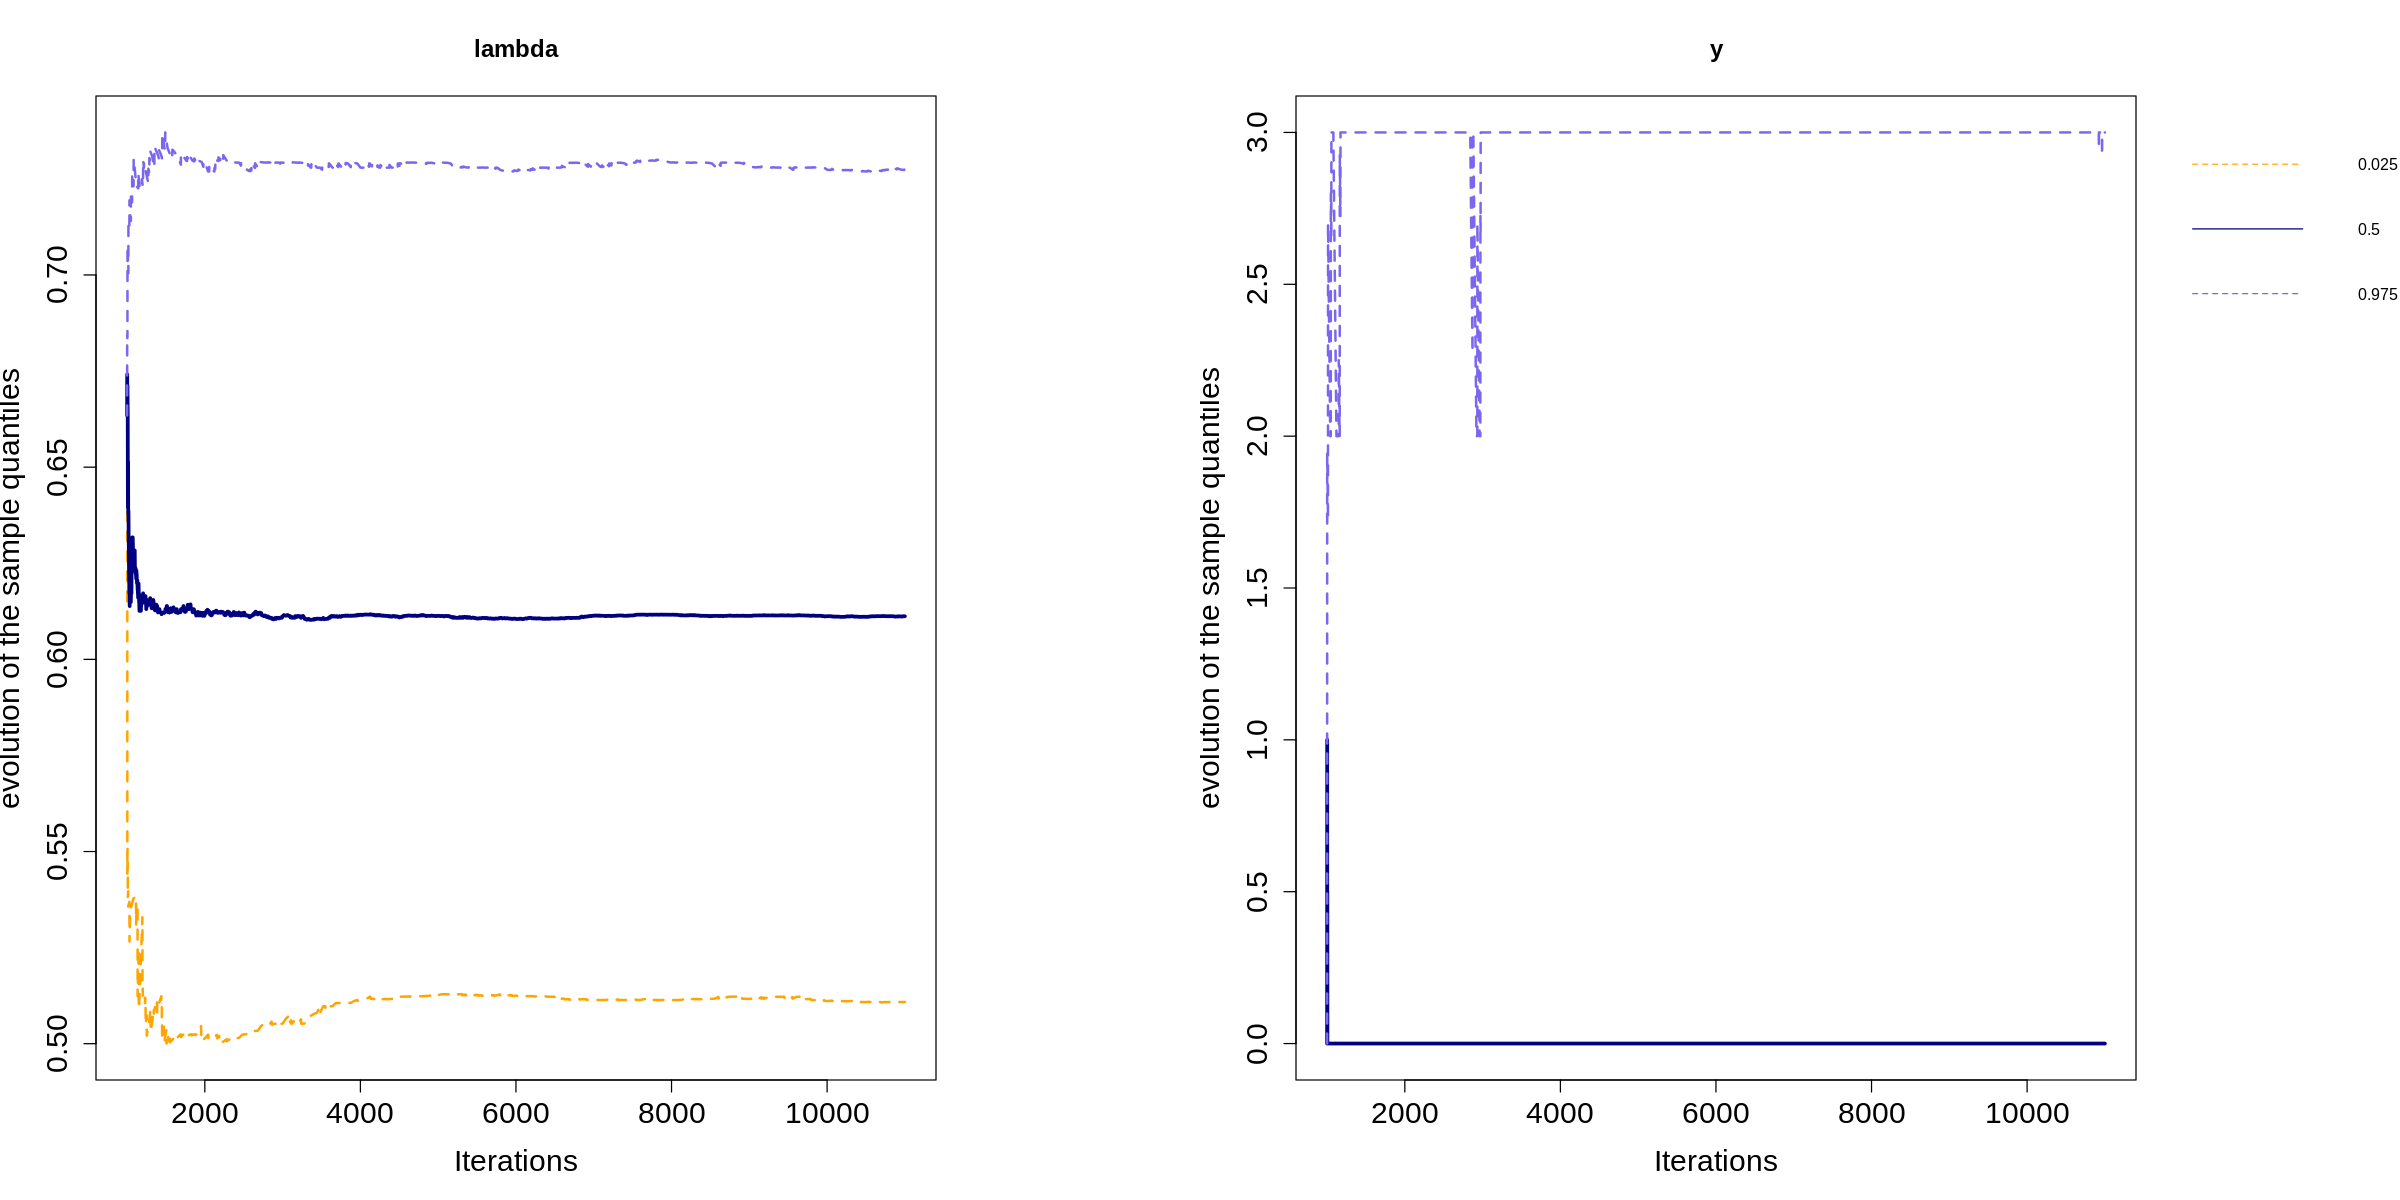

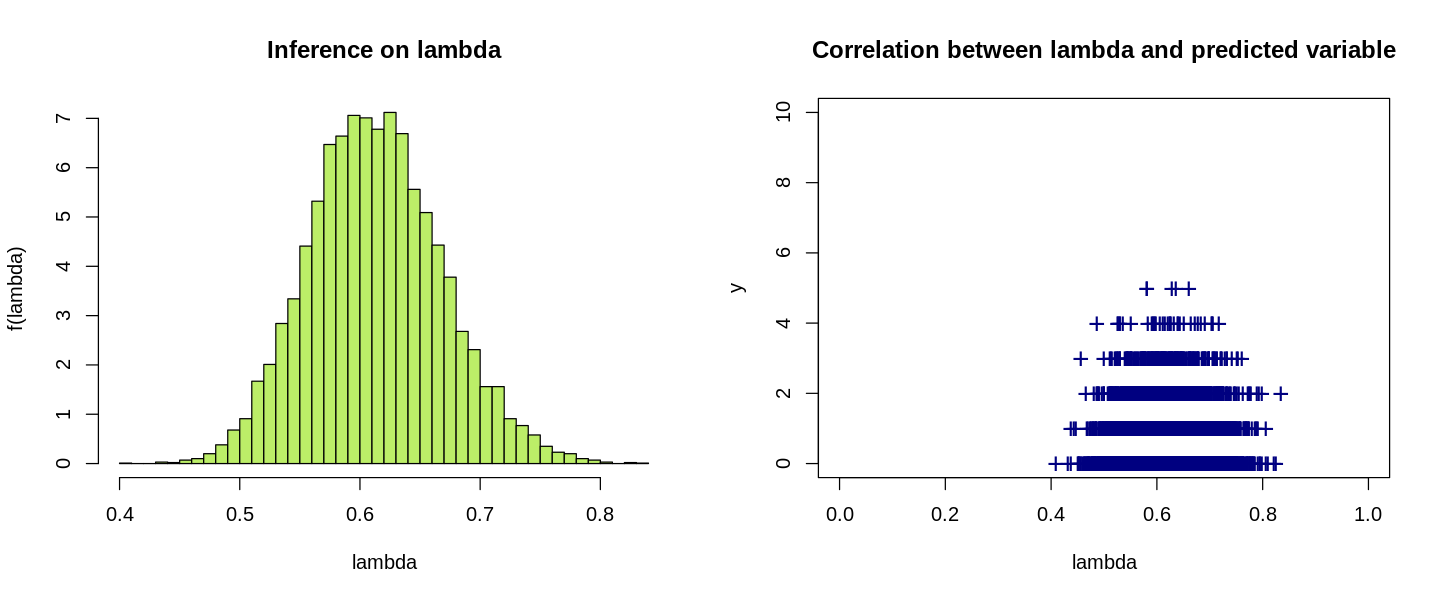

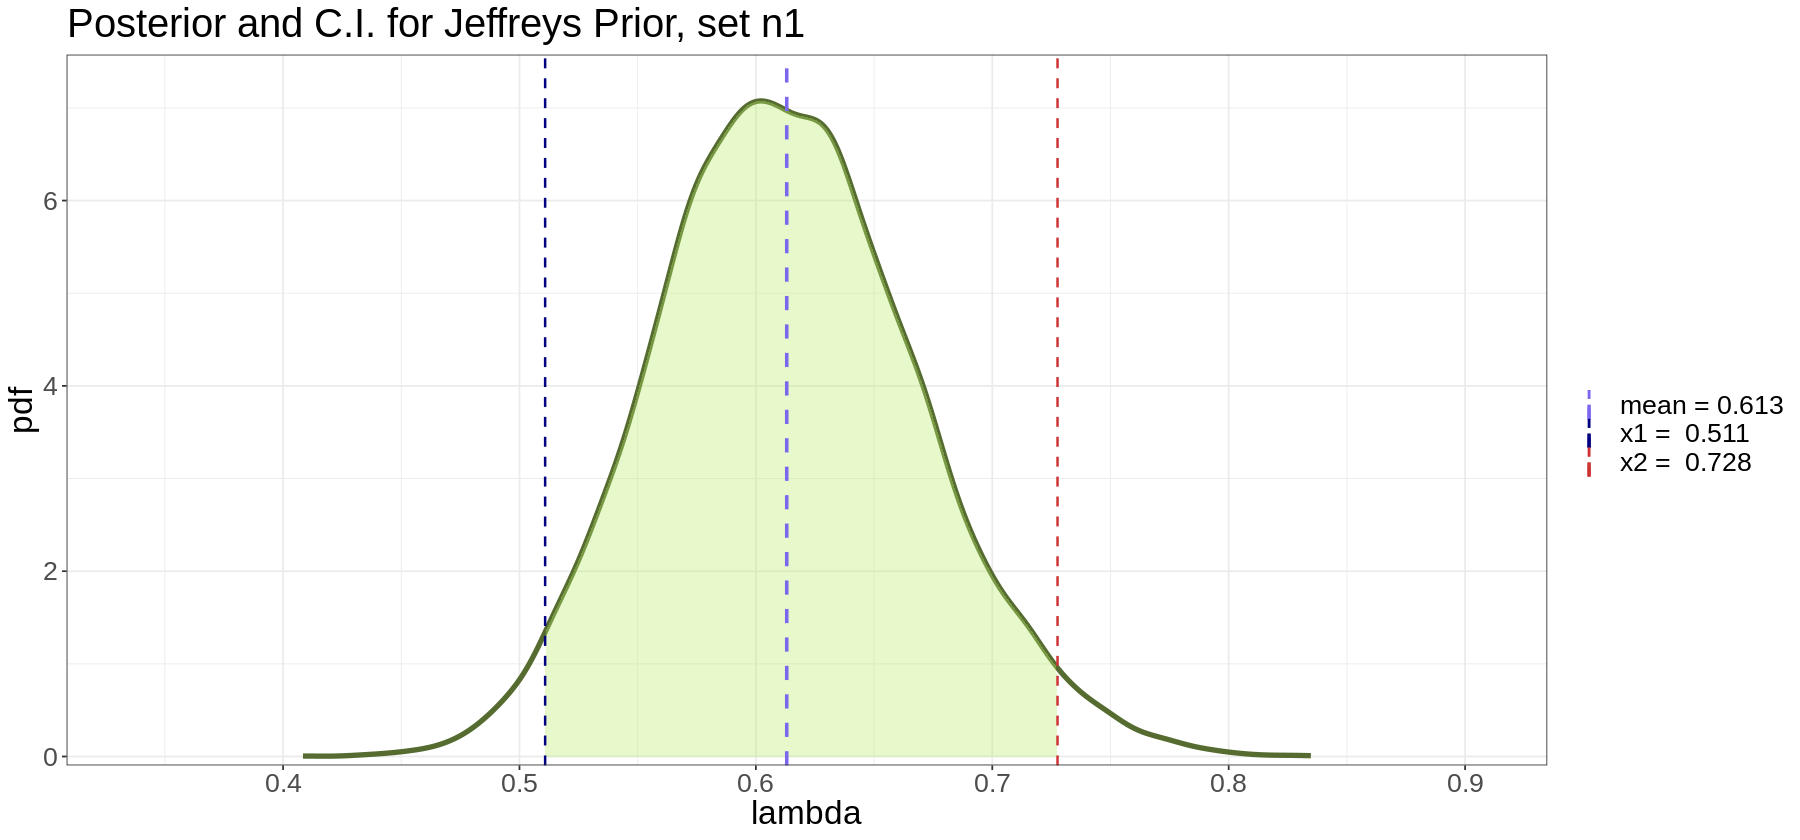

In [10]:
path_5_jeff <- './model_5_jeff.bug'

model_jeff <- 'model {

    # data likelihood
    for (i in 1:length(X)){
      X[i] ~ dpois(lambda);
    }

    # a jeffreys prior for lambda
    lambda ~ dgamma(1/2, 0.00001);

    # Predicted data , given lambda
    y ~ dpois( lambda );
}'

writeLines(model_jeff , path_5_jeff)

n_deaths <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

#repeat each value of n_deaths the corresponding number of times
obs_1 <- rep(x = n_deaths, times = n1)
obs_2 <- rep(x = n_deaths, times = n2)

data_1 <- NULL
data_1$X <- obs_1

data_2 <- NULL
data_2$X <- obs_2

#set observations 1
jm1jeff <- jags.model('model_5_jeff.bug', data_1, n.adapt=1000, n.chains = 1, quiet=TRUE)
update(jm1jeff, 1000)
chain1jeff <- coda.samples(jm1jeff, c('lambda', 'y'), n.iter=10000)
cat('\n Observations set 1, jeffreys prior \n')
print(summary(chain1jeff))

chain1jeff.df <- as.data.frame(as.mcmc(chain1jeff))
cat('\n Correlation matrix observations set 1, jeffreys prior: \n')
print(cor(chain1jeff.df))

mean_th_1 <- (sum(obs_1) + 1/2)/sum(n1)
var_th_1 <- (sum(obs_1) + 1/2)/(sum(n1))^2
    
    
mean_1 <- unname(summary(chain1jeff)$statistics[1])
sd_1 <- unname(summary(chain1jeff)$statistics[3])
ci_j_1 <- unname(summary(chain1jeff)$quantiles[c(1,9)])


cat('\n\n\nTheoretical values for Jeffreys Prior: \n')
cat('Mean:', round(mean_th_1, 3), '\n')
cat('Sd:', round(sqrt(var_th_1), 3), '\n')

cat('\n\n\nJags estimates for Jeffreys Prior: \n')
cat('Mean:', round(mean_1, 3), '\n')
cat('Sd:', round(sd_1, 3), '\n')
cat('Credibility Interval: (', round(ci_j_1[1], 3), round(ci_j_1[2], 3), ') \n')


#plots
options(repr.plot.width = 10, repr.plot.height = 10)

plot(chain1jeff, col='navy')

options(repr.plot.width = 20, repr.plot.height = 10)

#autocorrelation function for each variable in the chain
autocorr.plot(chain1jeff, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

#evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
par(mar=c(5, 4, 4, 11), xpd=TRUE)
cumuplot(chain1jeff, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
               col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
       text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
       y.intersp = 2, horiz = FALSE)


par(mar=c(5.1, 4.1, 4.1, 2.1))

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1,2))

#inference on lambda
hist(chain1jeff.df$lambda, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

# Correlation between p and predicted variable
plot(chain1jeff.df$lambda, chain1jeff.df$y, xlab='lambda', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between lambda and predicted variable')

#find 95% credibility interval and mean
options(repr.plot.width = 15, repr.plot.height = 7)

dataj_1 <- ggplot_build(ggplot() + geom_density(data=chain1jeff.df, mapping=aes(x=lambda)))$data[[1]][c("x","y")]


shaded <- rbind(c(ci_j_1[1], 0), subset(dataj_1, x > ci_j_1[1] & x < ci_j_1[2]), c(ci_j_1[2], 0))

jags_plot_1 <-  ggplot() +
            geom_line(data = dataj_1, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
            theme_bw()+
            geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
            geom_vline(aes(xintercept = mean_1 , colour = paste('mean =', round(mean_1, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = ci_j_1[1], colour = paste('x1 = ', round(ci_j_1[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = ci_j_1[2],  colour = paste('x2 = ', round(ci_j_1[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior and C.I. for Jeffreys Prior, set n1')+
            scale_x_continuous(name= 'lambda', expand = c(0, 0), limits = c(min(dataj_1$x) -0.1 , max(dataj_1$x) + 0.1))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj_1$y) -0.1 , max(dataj_1$y) + 0.5))+
            scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                     name = '')
jags_plot_1

### Set 2


 Observations set 2, jeffreys prior 

Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.7021 0.05025 0.0005025      0.0005025
y      0.7140 0.83933 0.0083933      0.0083933

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.6075 0.6674 0.7011 0.7347 0.8051
y      0.0000 0.0000 1.0000 1.0000 3.0000


 Correlation matrix observations set 2, jeffreys prior: 
           lambda          y
lambda 1.00000000 0.06380042
y      0.06380042 1.00000000



Theoretical values for Jeffreys Prior: 
Mean: 0.702 
Sd: 0.05 



Jags estimates for Jeffreys Prior: 
Mean: 0.702 
Sd: 0.05 
Credibility Interval: ( 0.608 0.805 ) 


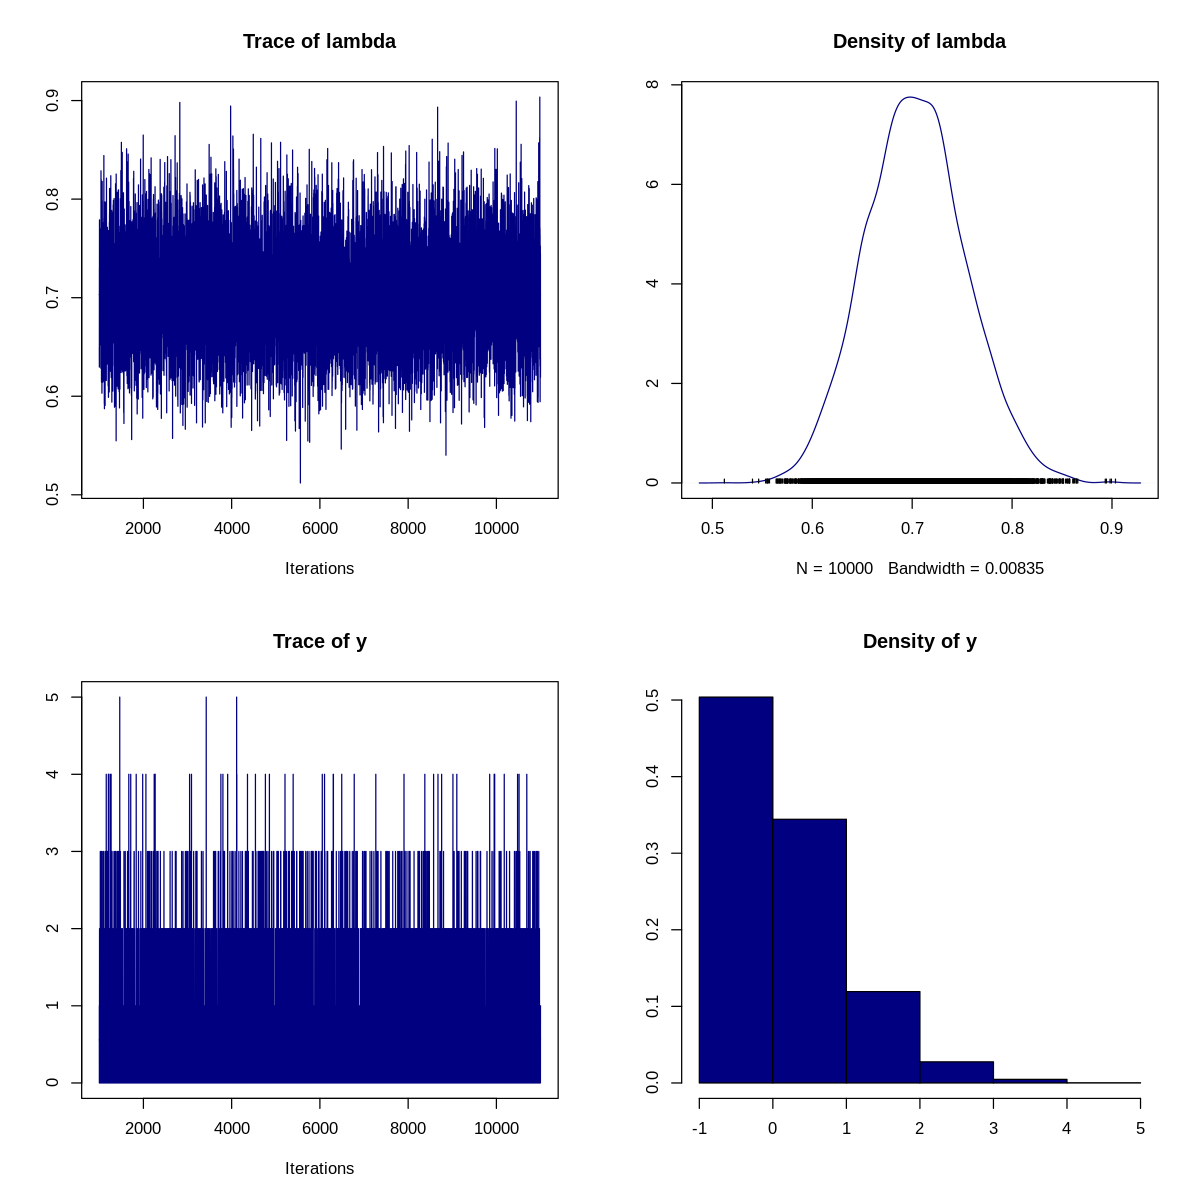

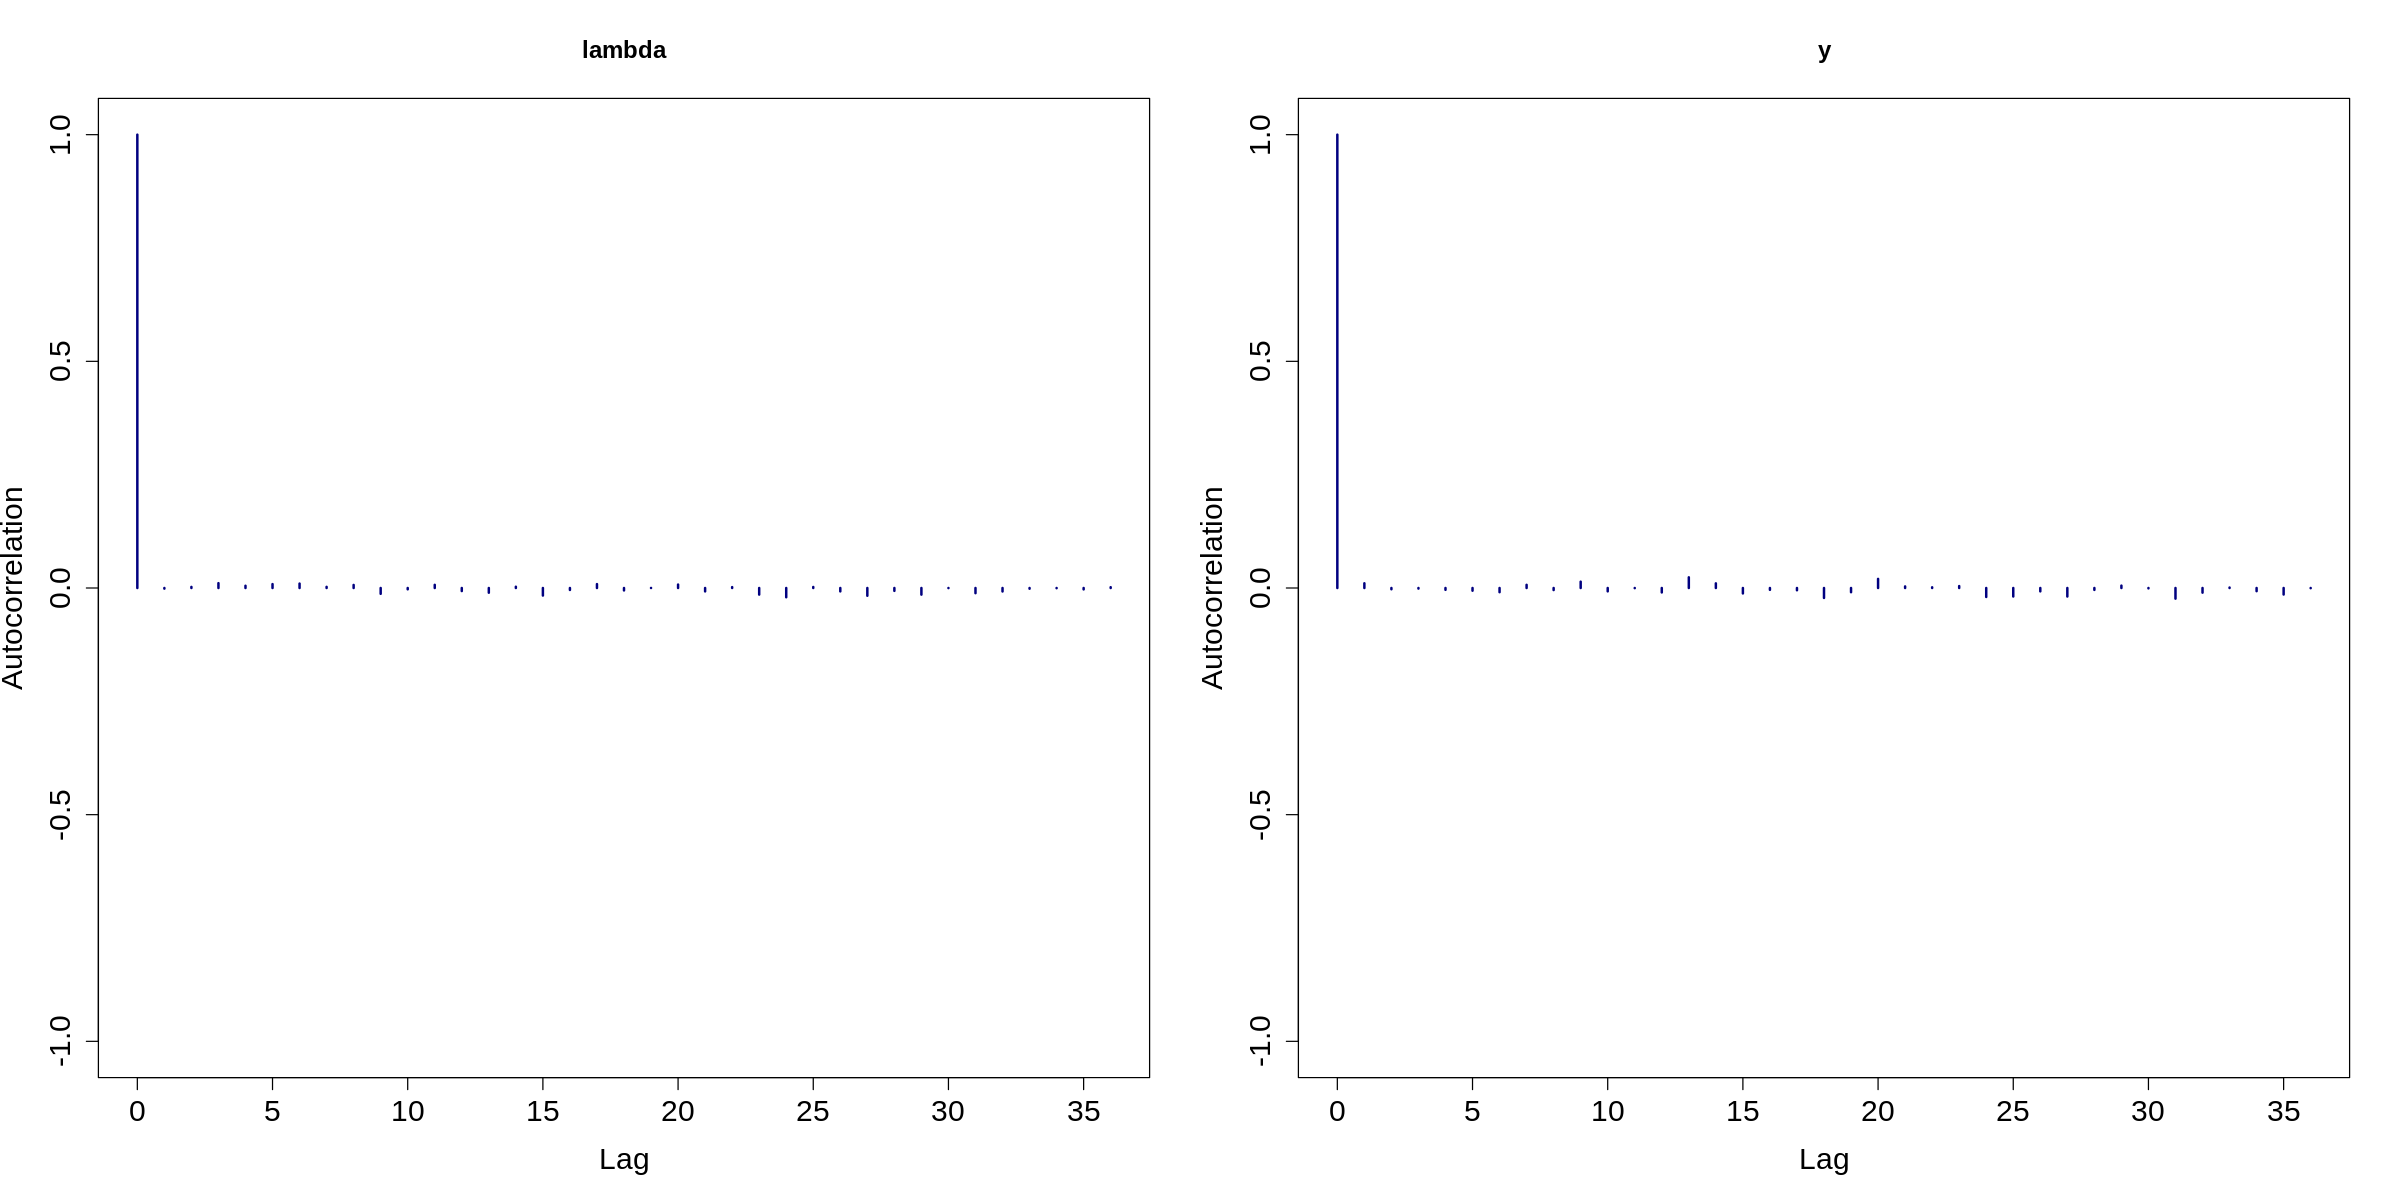

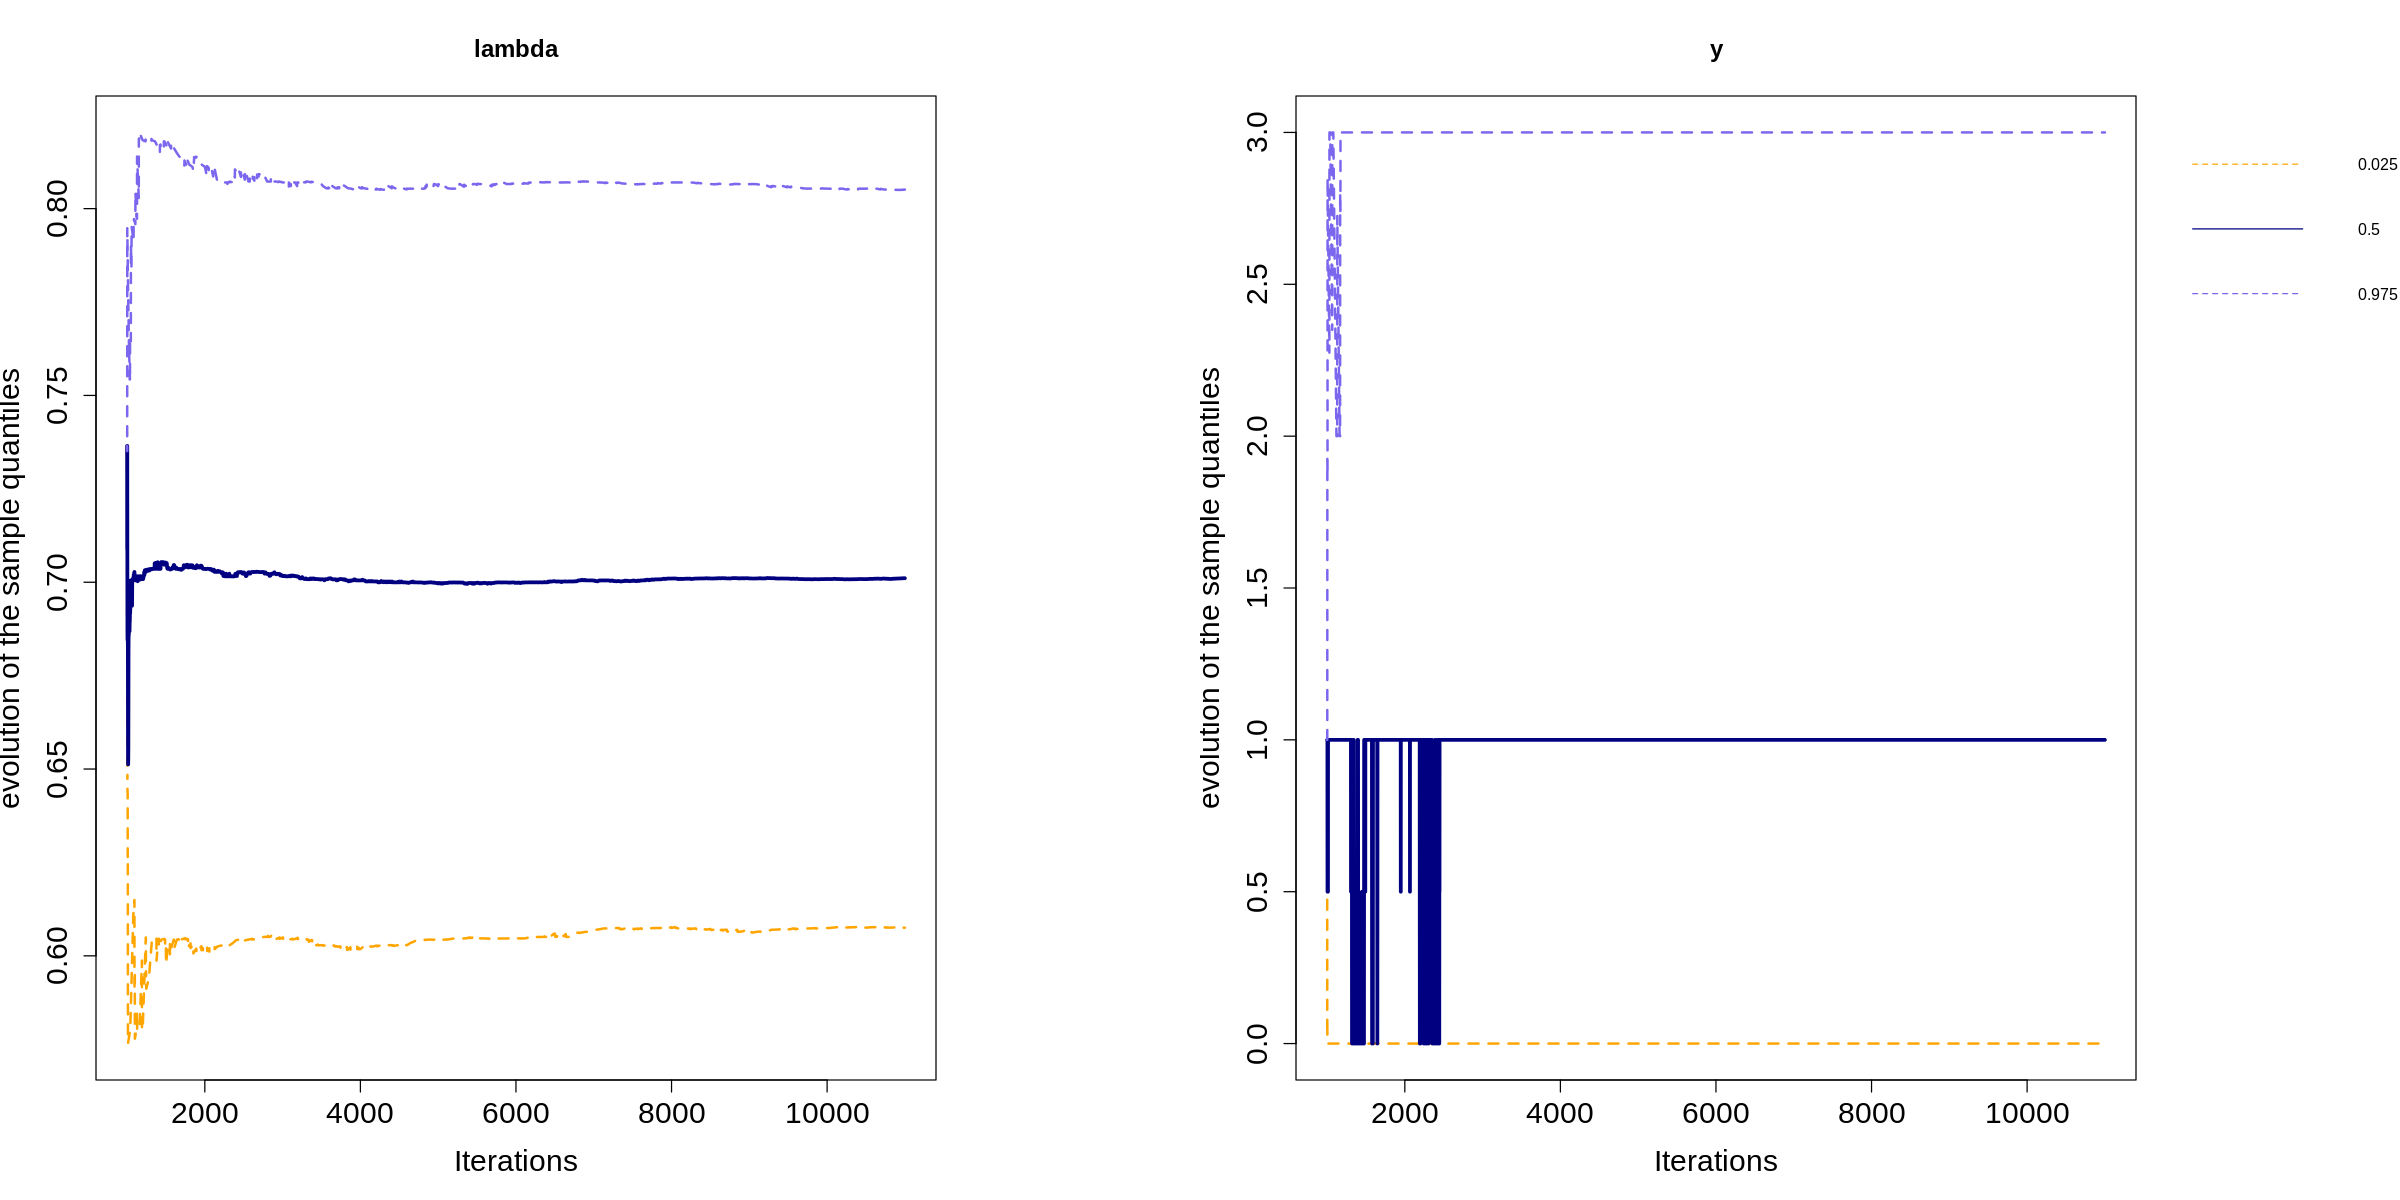

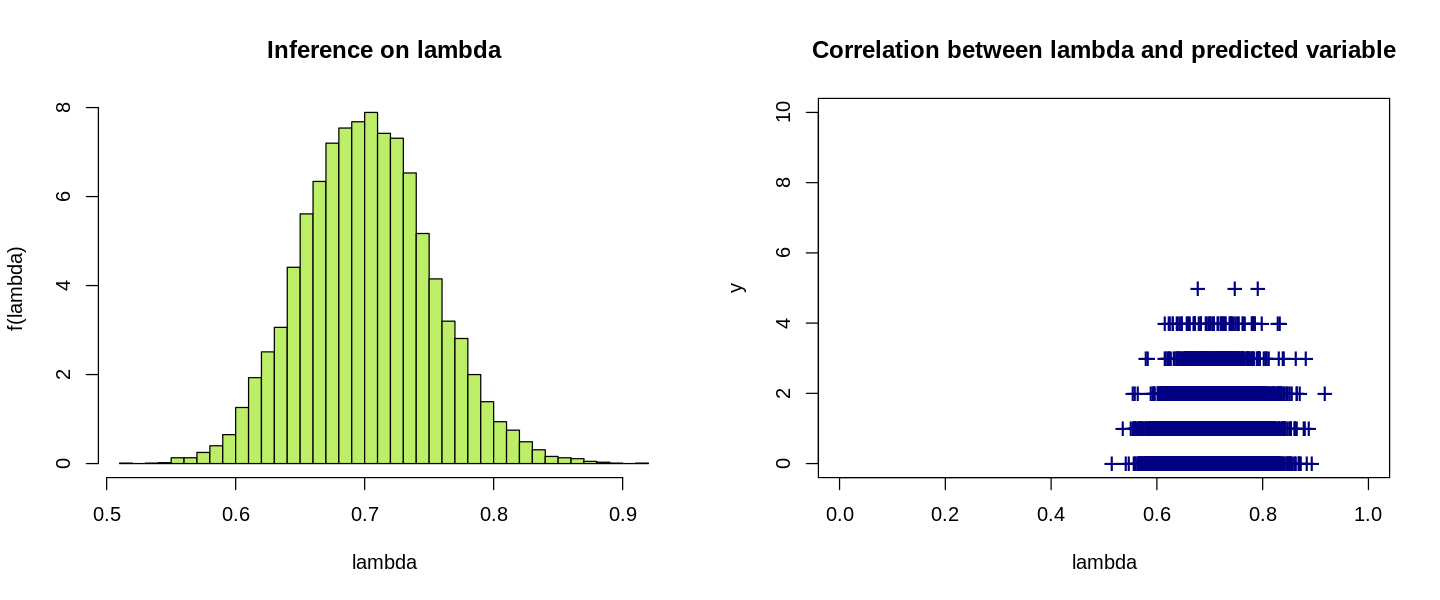

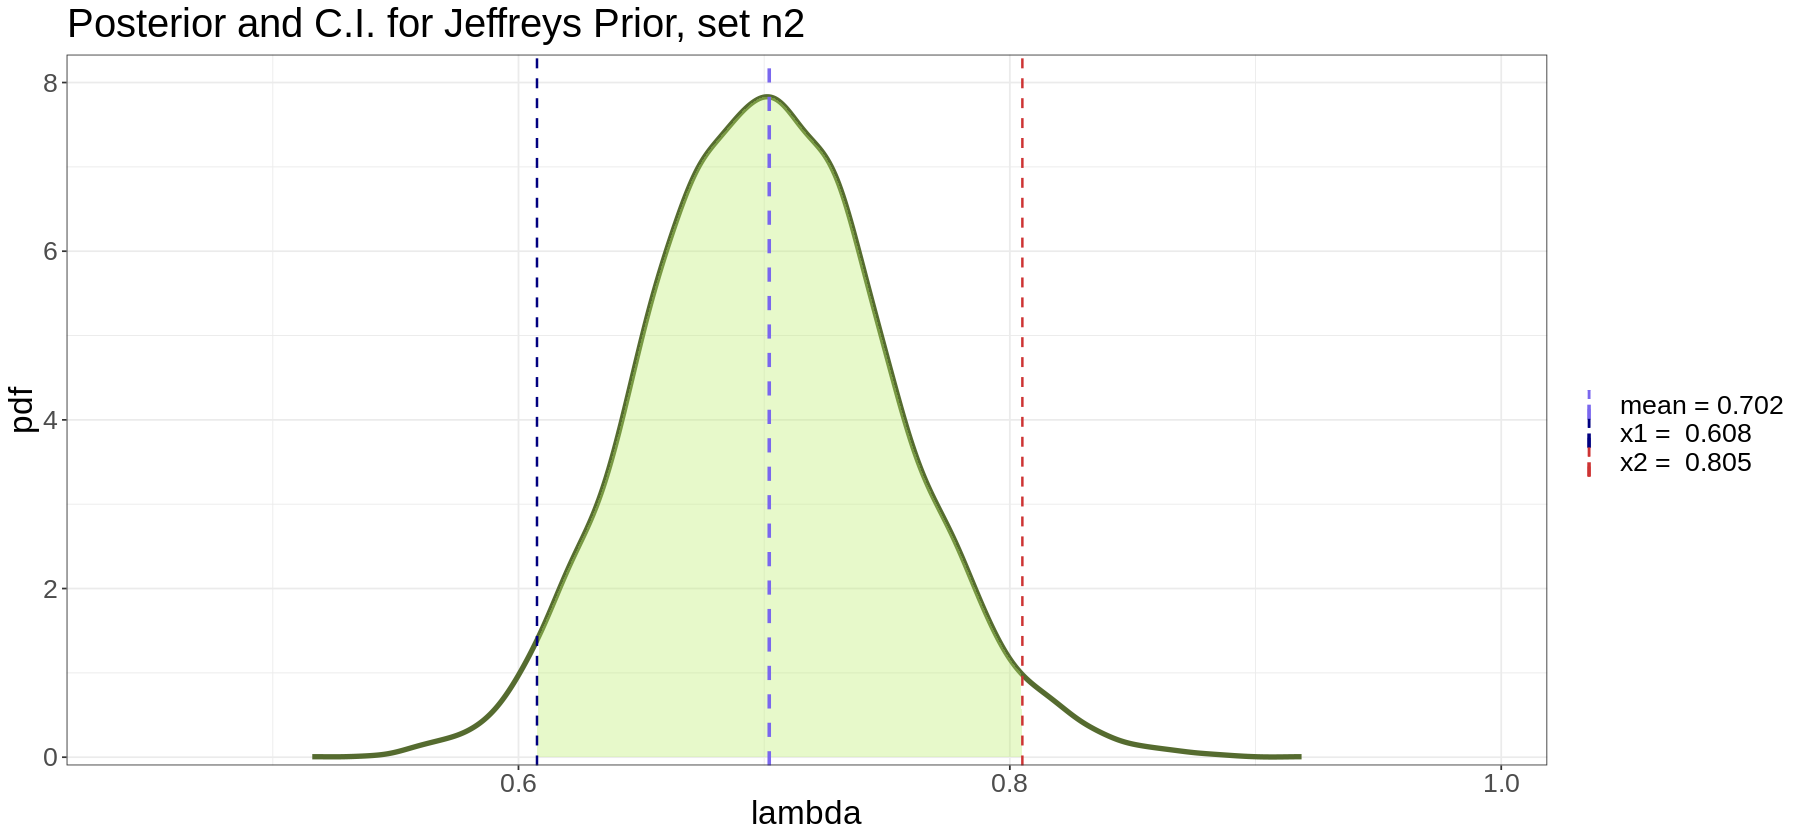

In [11]:
#set observations 2
jm2jeff <- jags.model('model_5_jeff.bug' , data_2, n.adapt=1000, n.chains = 1, quiet=TRUE)
update(jm2jeff, 1000)
chain2jeff <- coda.samples(jm2jeff, c('lambda', 'y'), n.iter=10000)
cat('\n Observations set 2, jeffreys prior \n')
print(summary(chain2jeff))

chain2jeff.df <- as.data.frame(as.mcmc(chain2jeff))
cat('\n Correlation matrix observations set 2, jeffreys prior: \n')
print(cor(chain2jeff.df))

mean_th_2 <- (sum(obs_2) + 1/2)/sum(n2)
var_th_2 <- (sum(obs_2) + 1/2)/(sum(n2))^2
    

mean_2 <- unname(summary(chain2jeff)$statistics[1])
sd_2 <- unname(summary(chain2jeff)$statistics[3])
ci_j_2 <- unname(summary(chain2jeff)$quantiles[c(1,9)])


cat('\n\n\nTheoretical values for Jeffreys Prior: \n')
cat('Mean:', round(mean_th_2, 3), '\n')
cat('Sd:', round(sqrt(var_th_2), 3), '\n')

cat('\n\n\nJags estimates for Jeffreys Prior: \n')
cat('Mean:', round(mean_2, 3), '\n')
cat('Sd:', round(sd_2, 3), '\n')
cat('Credibility Interval: (', round(ci_j_2[1], 3), round(ci_j_2[2], 3), ') \n')


#plots
options(repr.plot.width = 10, repr.plot.height = 10)

plot(chain2unif, col='navy')

options(repr.plot.width = 20, repr.plot.height = 10)

#autocorrelation function for each variable in the chain
autocorr.plot(chain2unif, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

#evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
par(mar=c(5, 4, 4, 11), xpd=TRUE)
cumuplot(chain2jeff, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
               col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
       text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
       y.intersp = 2, horiz = FALSE)


par(mar=c(5.1, 4.1, 4.1, 2.1))

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1,2))

#inference on lambda
hist(chain2jeff.df$lambda, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

# Correlation between p and predicted variable
plot(chain2jeff.df$lambda, chain2jeff.df$y, xlab='lambda', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between lambda and predicted variable')

#find 95% credibility interval and mean
options(repr.plot.width = 15, repr.plot.height = 7)

dataj_2 <- ggplot_build(ggplot() + geom_density(data=chain2jeff.df, mapping=aes(x=lambda)))$data[[1]][c("x","y")]


shaded <- rbind(c(ci_j_2[1], 0), subset(dataj_2, x > ci_j_2[1] & x < ci_j_2[2]), c(ci_j_2[2], 0))

jags_plot_2 <-  ggplot() +
            geom_line(data = dataj_2, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
            theme_bw()+
            geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
            geom_vline(aes(xintercept = mean_2 , colour = paste('mean =', round(mean_2, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = ci_j_2[1], colour = paste('x1 = ', round(ci_j_2[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = ci_j_2[2],  colour = paste('x2 = ', round(ci_j_2[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior and C.I. for Jeffreys Prior, set n2')+
            scale_x_continuous(name= 'lambda', expand = c(0, 0), limits = c(min(dataj_2$x) -0.1 , max(dataj_2$x) + 0.1))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj_2$y) -0.1 , max(dataj_2$y) + 0.5))+
            scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                     name = '')
jags_plot_2

# NB:

**I know the code is not efficient. It would be more efficient to implement everything in one loop, as I have done below. However, Jupyter has some issues in real-time printing on the console with R, for reference see here:**

**https://stackoverflow.com/questions/37689694/stampa-in-tempo-reale-su-console-con-r-in-jupyter**

**https://stackoverflow.com/questions/35786496/using-r-in-jupyter-display-markdown-in-loop**

**I have reported below the code that I would have used if the plot printing was ok.**


path_5_unif <- './model_5_unif.bug'
path_5_jeff <- './model_5_jeff.bug'

model_unif <- 'model {

    # data likelihood
    for (i in 1:length(X)){
      X[i] ~ dpois(lambda);
    }

    # a uniform prior for lambda
    lambda ~ dexp(0.00001);

    # Predicted data , given lambda
    y ~ dpois( lambda );
}'

model_jeff <- 'model {

    # data likelihood
    for (i in 1:length(X)){
      X[i] ~ dpois(lambda);
    }

    # a jeffreys prior for lambda
    lambda ~ dgamma(1/2, 0.00001);

    # Predicted data , given lambda
    y ~ dpois( lambda );
}'


writeLines(model_unif , path_5_unif)
writeLines(model_jeff , path_5_jeff)

n_deaths <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

#repeat each value of n_deaths the corresponding number of times
obs_1 <- rep(x = n_deaths, times = n1)
obs_2 <- rep(x = n_deaths, times = n2)

q <- 0.025

#data <- rbind(obs_1, obs_2)
n <- rbind(sum(n1), sum(n2))

alpha <- c(sum(obs_1)+1,  sum(obs_1)+1/2, sum(obs_2)+1, sum(obs_2)+1/2)
name <-c('Uniform', 'Jeffreys')
model <- c('model_5_unif.bug', 'model_5_jeff.bug')


analysis <- function(i){
    
    #set 1
    min_ci_th <- qgamma(q, shape = alpha[i], rate = n[1])
    max_ci_th <- qgamma(1-q, shape = alpha[i], rate = n[1])
    mean_th <- alpha[i]/n[1]
    var_th <- alpha[i]/n[1]^2
    
    dataj <- NULL
    dataj$X <- obs_1
    

    jm <- jags.model(model[i], dataj, n.adapt=1000, n.chains = 1, quiet=TRUE)
    update(jm, 1000)
    chain <- coda.samples(jm, c('lambda', 'y'), n.iter=10000)
    cat('\n Observations set 1,',  name[i], 'Prior \n')
    print(summary(chain))

    chain.df <- as.data.frame(as.mcmc(chain))
    cat('\n Correlation matrix observations set 1,',  name[i], 'Prior \n')
    print(cor(chain.df))

    
    meanj <- unname(summary(chain)$statistics[1])
    sdj <- unname(summary(chain)$statistics[3])
    ci_j <- unname(summary(chain)$quantiles[c(1,9)])


    cat('\n\n\nTheoretical values for', name[i], ' Prior: \n')
    cat('Mean:', round(mean_th, 3), '\n')
    cat('Sd:', round(sqrt(var_th), 3), '\n')
    cat('Credibility Interval: (', round(min_ci_th, 3), round(max_ci_th, 3), ') \n')

    cat('\n\n\nJags estimates for', name[i], ' Prior: \n')
    cat('Mean:', round(meanj, 3), '\n')
    cat('Sd:', round(sdj, 3), '\n')
    cat('Credibility Interval: (', round(ci_j[1], 3), round(ci_j[2], 3), ') \n')

    #plots
    options(repr.plot.width = 10, repr.plot.height = 10)

    plot(chain, col='navy')

    options(repr.plot.width = 20, repr.plot.height = 10)

    #autocorrelation function for each variable in the chain
    autocorr.plot(chain, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

    #evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
    par(mar=c(5, 4, 4, 11), xpd=TRUE)
    cumuplot(chain, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
    legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
                   col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
           text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
           y.intersp = 2, horiz = FALSE)


    par(mar=c(5.1, 4.1, 4.1, 2.1))

    options(repr.plot.width = 12, repr.plot.height = 5)
    par(mfrow = c(1,2))

    #inference on lambda
    hist(chain.df$lambda, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

    # Correlation between p and predicted variable
    plot(chain.df$lambda, chain.df$y, xlab='lambda', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between lambda and predicted variable')
    
    #find 95% credibility interval and mean
    options(repr.plot.width = 15, repr.plot.height = 7)

    dataj <- ggplot_build(ggplot() + geom_density(data=chain.df, mapping=aes(x=lambda)))$data[[1]][c("x","y")]


    shaded <- rbind(c(ci_j[1], 0), subset(dataj, x > ci_j[1] & x < ci_j[2]), c(ci_j[2], 0))

    jags_plot <-  ggplot() +
                geom_line(data = dataj, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
                theme_bw()+
                geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
                geom_vline(aes(xintercept = meanj , colour = paste('mean =', round(meanj, 3))), linetype = 'dashed', size = 1) +
                geom_vline(aes(xintercept = ci_j[1], colour = paste('x1 = ', round(ci_j[1], 3))), linetype = 'dashed', size = 0.7) +
                geom_vline(aes(xintercept = ci_j[2],  colour = paste('x2 = ', round(ci_j[2], 3))), linetype = 'dashed', size = 0.7) +
                theme(text = element_text(size = 20)) +
                ggtitle('Posterior and C.I. for', name[i], 'Prior, set n1')+
                scale_x_continuous(name= 'lambda', expand = c(0, 0), limits = c(min(dataj$x) -0.1 , max(dataj$x) + 0.1))+
                scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj$y) -0.1 , max(dataj$y) + 0.5))+
                scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                         name = '')
    #plot(jags_plot)

    #set 2
    min_ci_th <- qgamma(q, shape = alpha[i+2], rate = n[2])
    max_ci_th <- qgamma(1-q, shape = alpha[i+2], rate = n[2])
    mean_th <- alpha[i+2]/n[2]
    var_th <- alpha[i+2]/n[2]^2
    
    dataj <- NULL
    dataj$X <- obs_2
    

    jm <- jags.model(model[i], dataj, n.adapt=1000, n.chains = 1, quiet=TRUE)
    update(jm, 1000)
    chain <- coda.samples(jm, c('lambda', 'y'), n.iter=10000)
    cat('\n Observations set 2,',  name[i], 'Prior \n')
    print(summary(chain))

    chain.df <- as.data.frame(as.mcmc(chain))
    cat('\n Correlation matrix observations set 2',  name[i], 'Prior \n')
    print(cor(chain.df))

    
    meanj <- unname(summary(chain)$statistics[1])
    sdj <- unname(summary(chain)$statistics[3])
    ci_j <- unname(summary(chain)$quantiles[c(1,9)])


    cat('\n\n\nTheoretical values for', name[i], ' Prior: \n')
    cat('Mean:', round(mean_th, 3), '\n')
    cat('Sd:', round(sqrt(var_th), 3), '\n')
    cat('Credibility Interval: (', round(min_ci_th, 3), round(max_ci_th, 3), ') \n')

    cat('\n\n\nJags estimates for', name[i], ' Prior: \n')
    cat('Mean:', round(meanj, 3), '\n')
    cat('Sd:', round(sdj, 3), '\n')
    cat('Credibility Interval: (', round(ci_j[1], 3), round(ci_j[2], 3), ') \n')

    

    #plots
    options(repr.plot.width = 10, repr.plot.height = 10)

    plot(chain, col='navy')

    options(repr.plot.width = 20, repr.plot.height = 10)

    #autocorrelation function for each variable in the chain
    autocorr.plot(chain, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

    #evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
    par(mar=c(5, 4, 4, 11), xpd=TRUE)
    cumuplot(chain, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
    legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
                   col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
           text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
           y.intersp = 2, horiz = FALSE)


    par(mar=c(5.1, 4.1, 4.1, 2.1))

    options(repr.plot.width = 12, repr.plot.height = 5)
    par(mfrow = c(1,2))

    #inference on lambda
    hist(chain.df$lambda, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='lambda', ylab='f(lambda)', main='Inference on lambda')

    # Correlation between p and predicted variable
    plot(chain.df$lambda, chain.df$y, xlab='lambda', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between lambda and predicted variable')

    #find 95% credibility interval and mean
    options(repr.plot.width = 15, repr.plot.height = 7)

    dataj <- ggplot_build(ggplot() + geom_density(data=chain.df, mapping=aes(x=lambda)))$data[[1]][c("x","y")]


    shaded <- rbind(c(ci_j[1], 0), subset(dataj, x > ci_j[1] & x < ci_j[2]), c(ci_j[2], 0))

    jags_plot <-  ggplot() +
                geom_line(data = dataj, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
                theme_bw()+
                geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
                geom_vline(aes(xintercept = meanj , colour = paste('mean =', round(meanj, 3))), linetype = 'dashed', size = 1) +
                geom_vline(aes(xintercept = ci_j[1], colour = paste('x1 = ', round(ci_j[1], 3))), linetype = 'dashed', size = 0.7) +
                geom_vline(aes(xintercept = ci_j[2],  colour = paste('x2 = ', round(ci_j[2], 3))), linetype = 'dashed', size = 0.7) +
                theme(text = element_text(size = 20)) +
                ggtitle('Posterior and C.I. for', name[i], 'Prior, set n2')+
                scale_x_continuous(name= 'lambda', expand = c(0, 0), limits = c(min(dataj$x) -0.1 , max(dataj$x) + 0.1))+
                scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj$y) -0.1 , max(dataj$y) + 0.5))+
                scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                         name = '')
    print(jags_plot)
    
}

lapply(1:2, analysis)

# Exercise 6


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.09465 0.02594 0.0002594      0.0003542
y 0.94160 0.96855 0.0096855      0.0099179

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.05052 0.07592 0.09243 0.1109 0.1516
y 0.00000 0.00000 1.00000 1.0000 3.0000


 Correlation matrix : 
          p         y
p 1.0000000 0.2707858
y 0.2707858 1.0000000



Theoretical values for Beta Prior: 
Mean: 0.094 
Sd: 0.026 



Jags estimates for Beta Prior: 
Mean: 0.095 
Sd: 0.026 
Credibility Interval: ( 0.051 0.152 ) 


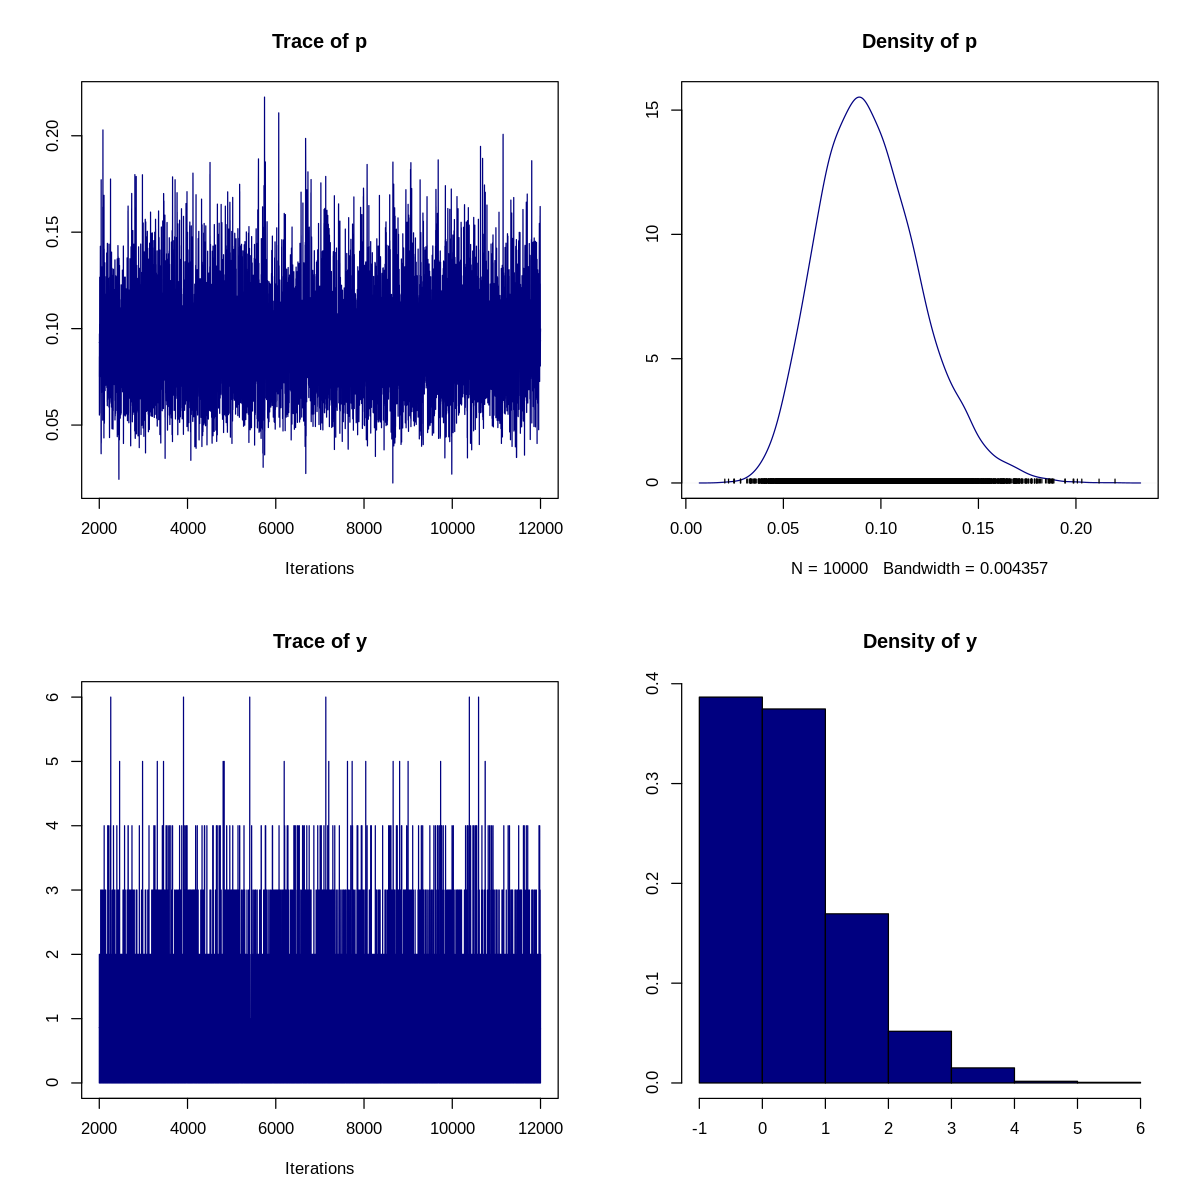

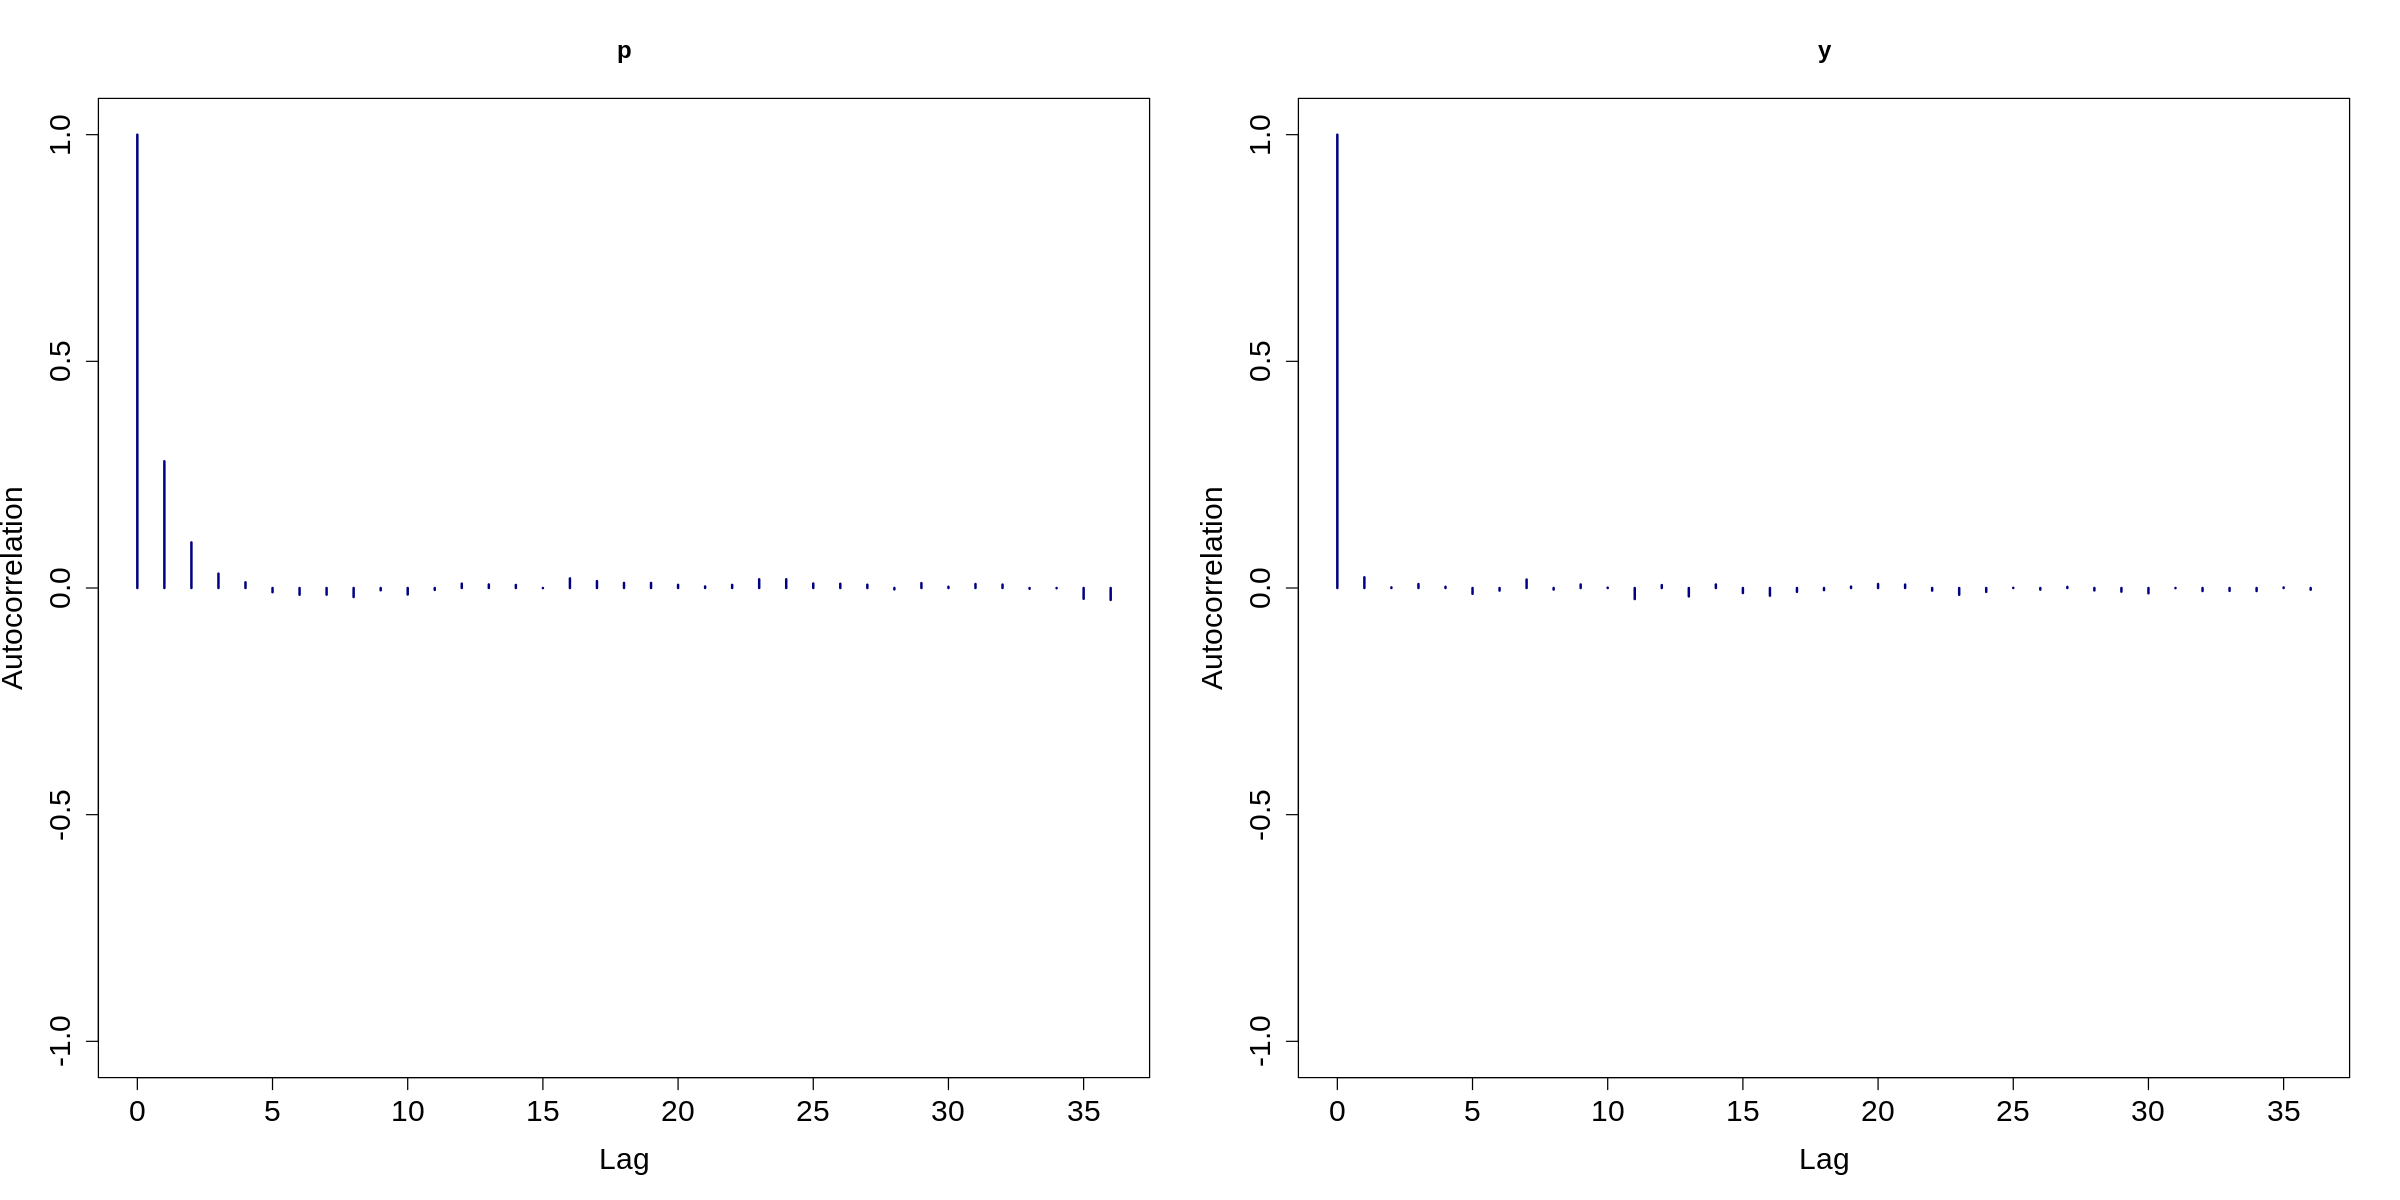

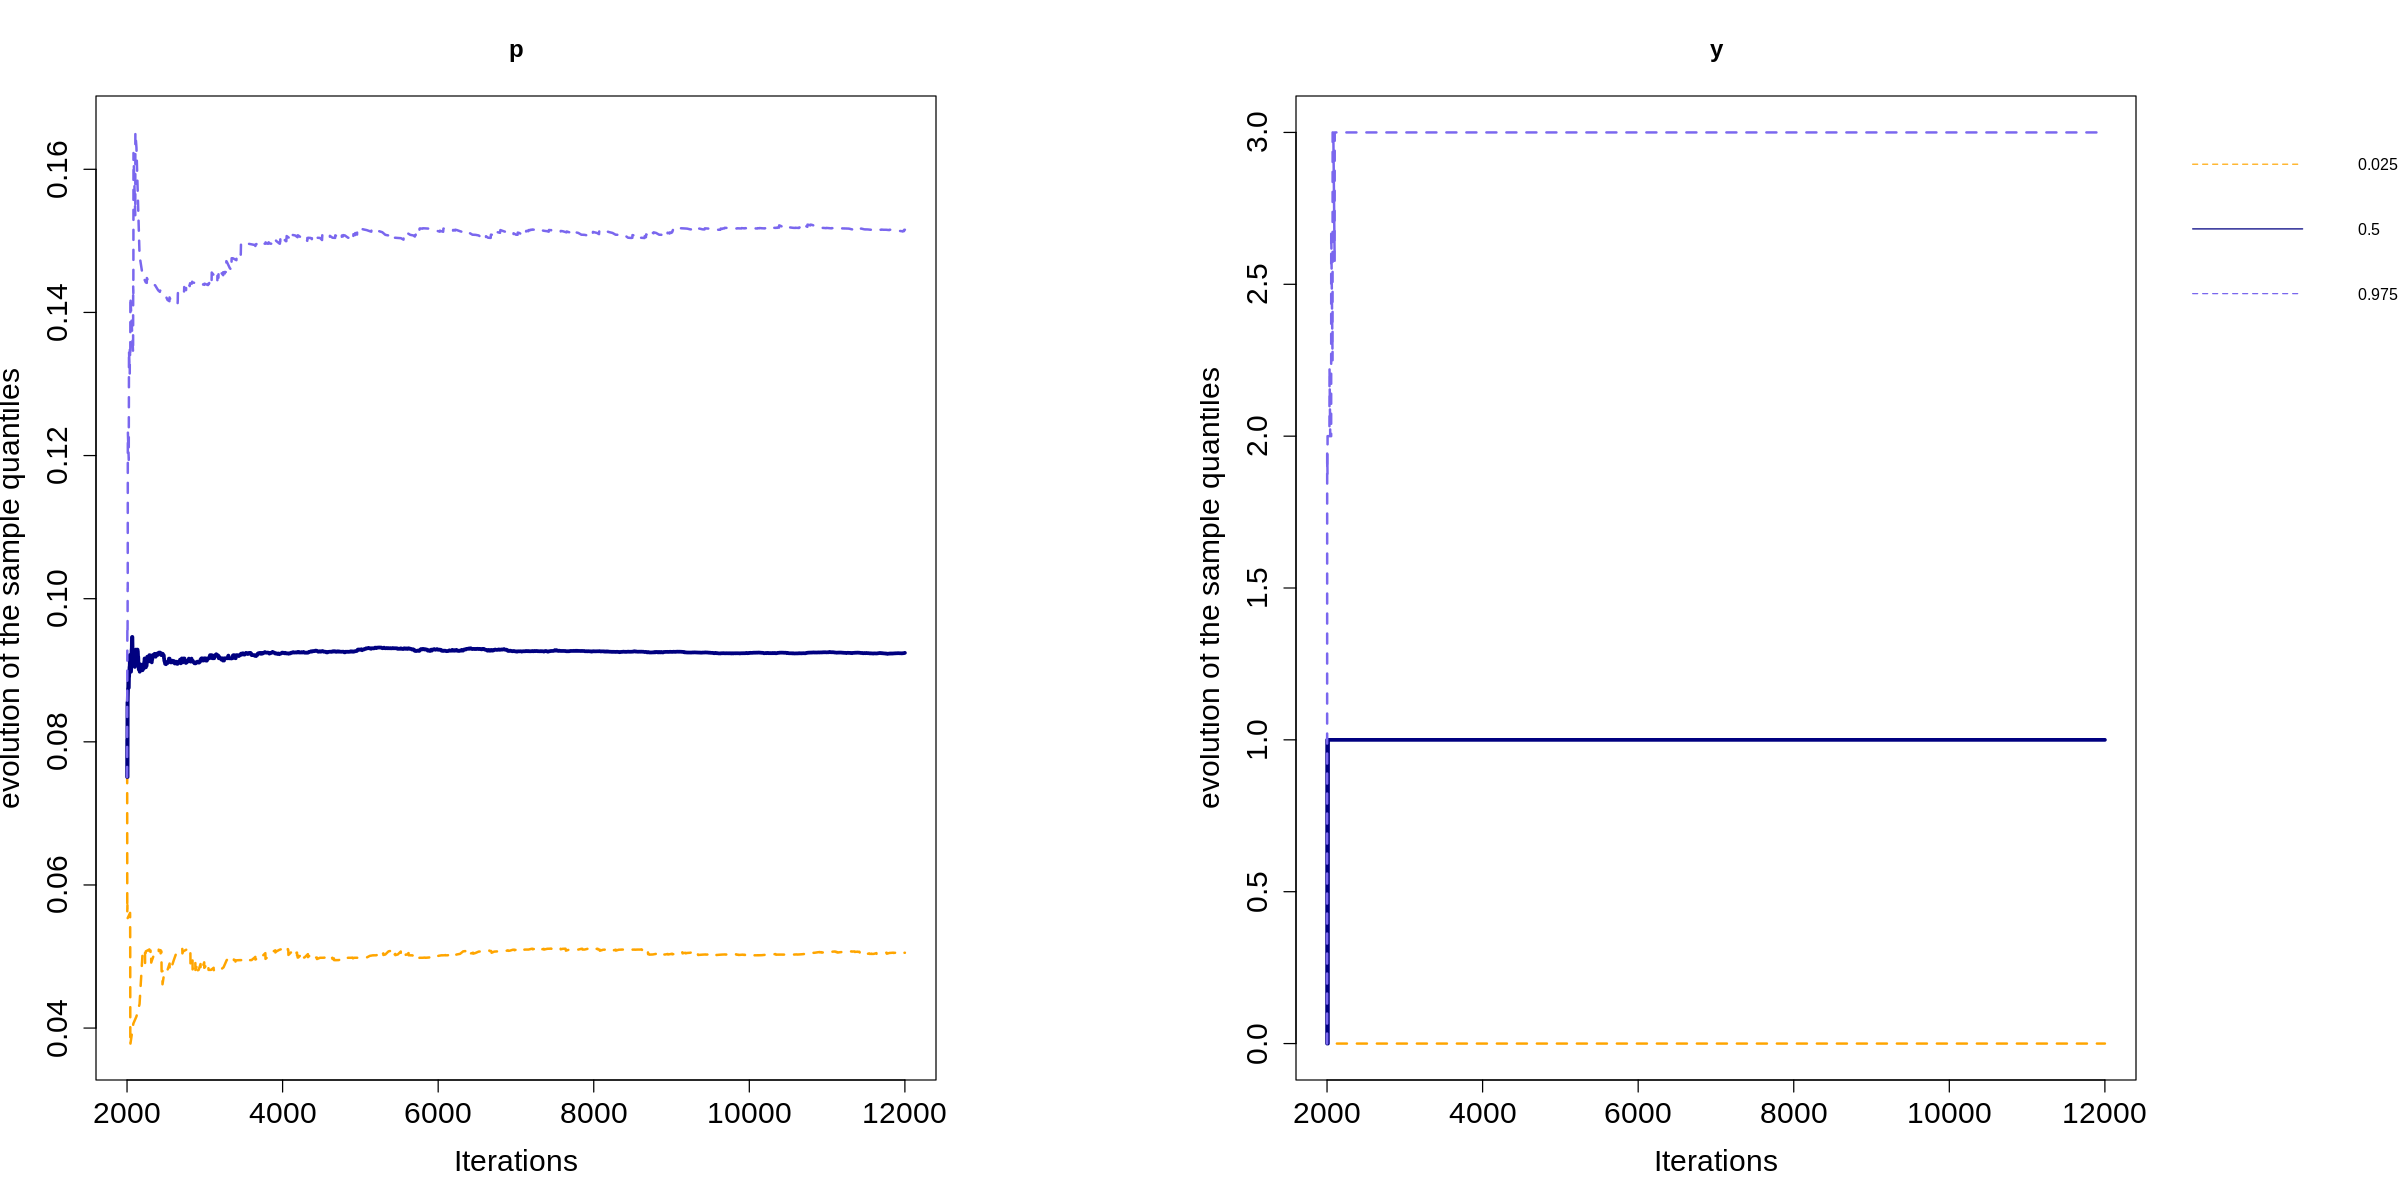

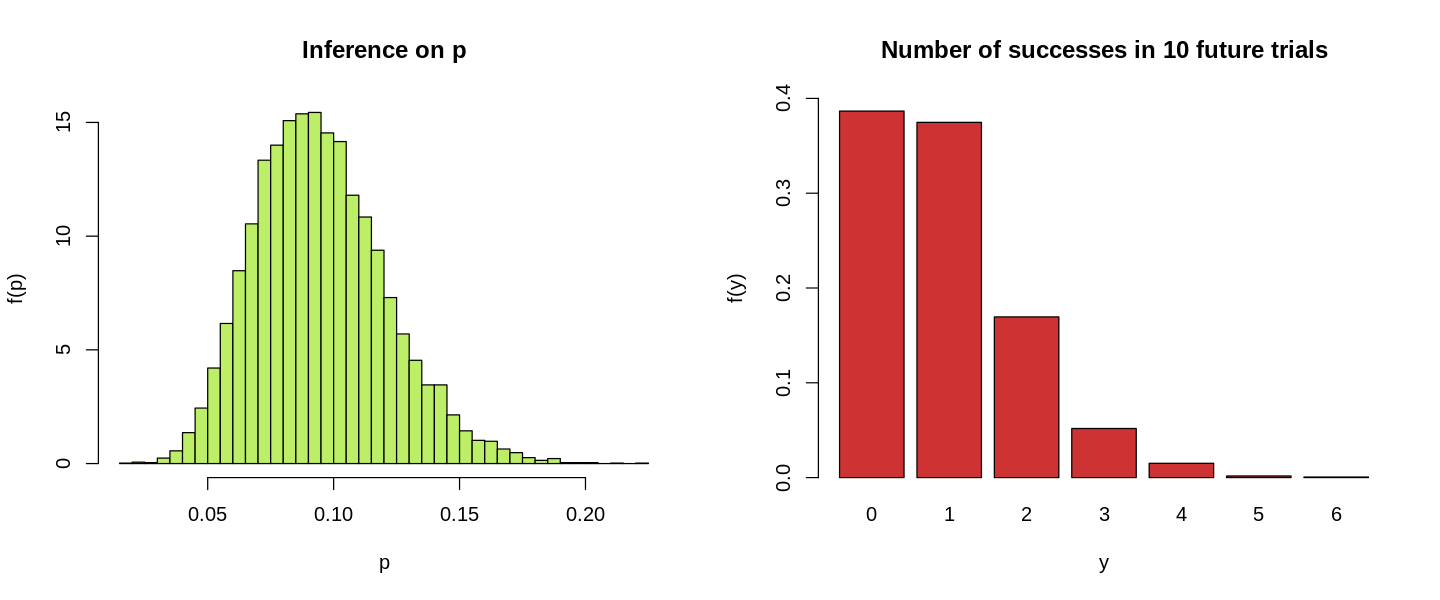

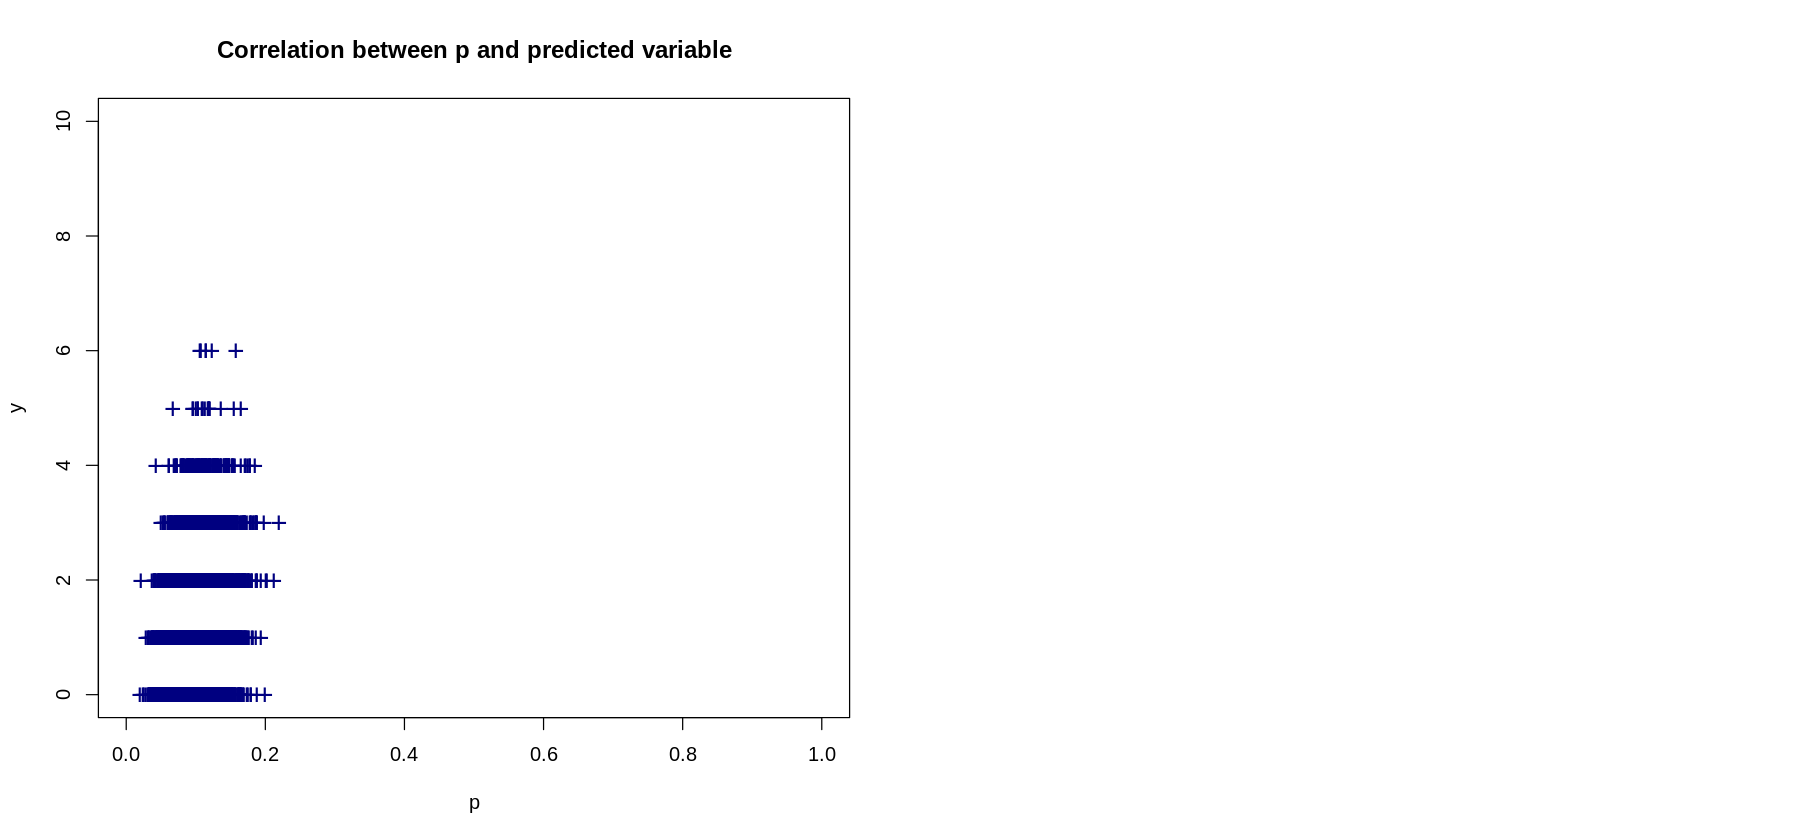

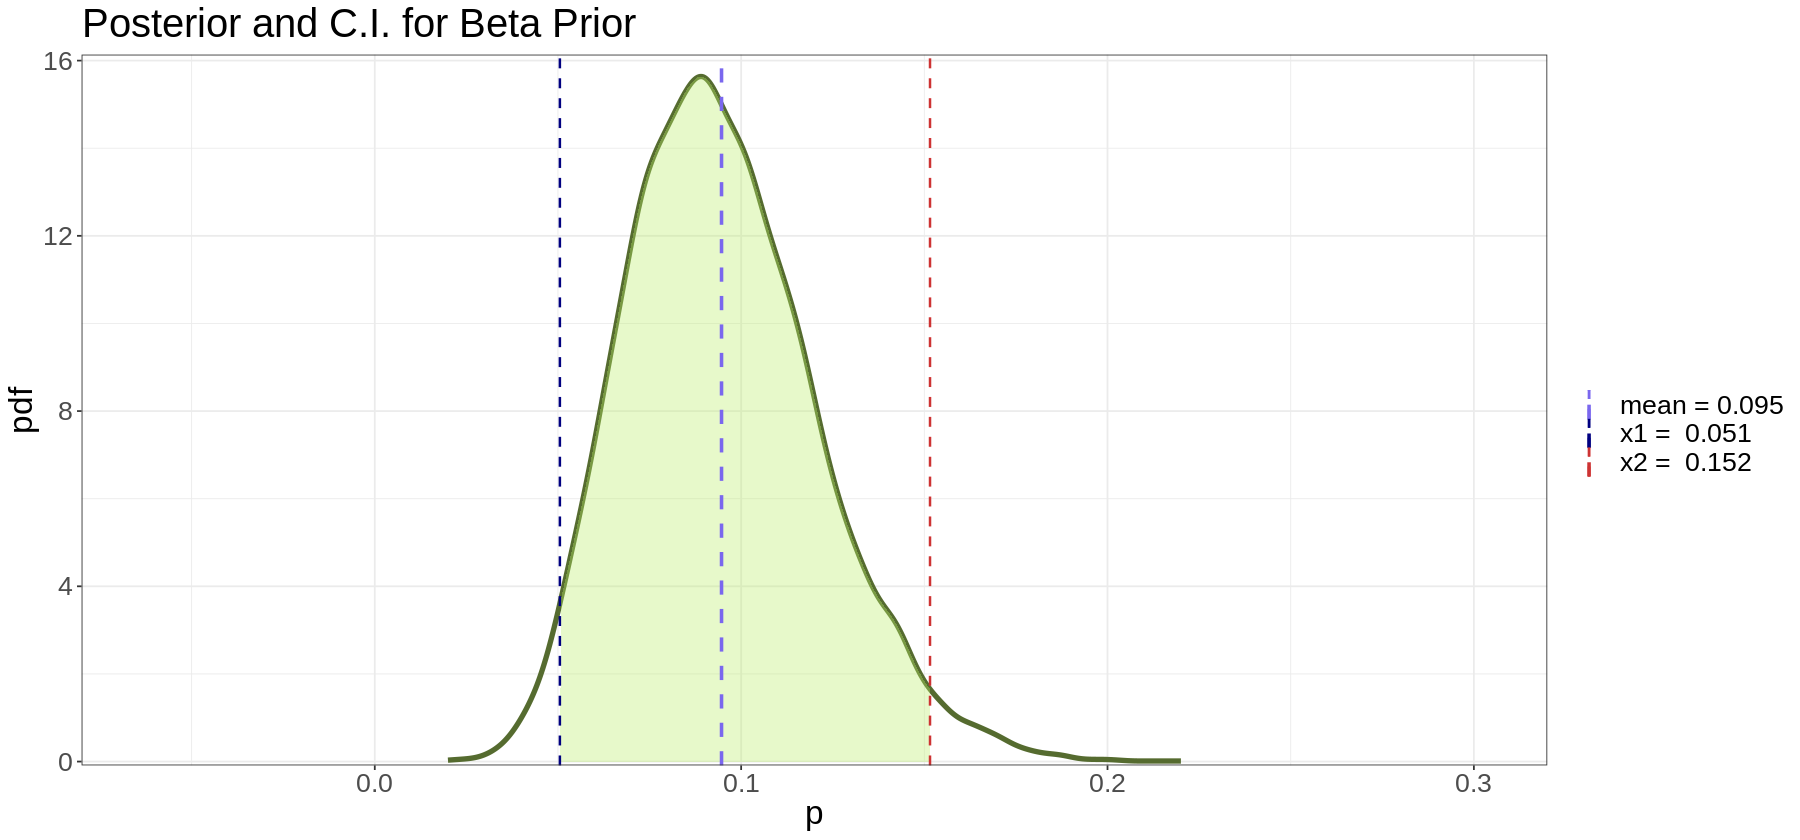

In [12]:
a_prior <- 1
b_prior <- 10

#N of samples
n <- 116

#N of samples with high bacteria level
y <- 11

prob <- 0.1
a <- 1
b <- 10
a_post <- a_prior + y
b_post <- b_prior + n - y

mean <- (a_prior + y)/(a_prior + b_prior + n) #same as a_post/(a_post + b_post)
var <- (a_prior + y)*(b_prior + n - y)/(a_prior + b_prior + n)^2/(a_prior + b_prior + n + 1)


data <- NULL
data$a_prior<- a_prior
data$b_prior <- b_prior
data$X <- y #Set of observations
data$n <- n #those to be considered
data$n_next <- 10 #predictions

jm <- jags.model ('model_4.bug' , data, n.adapt=1000, n.chains = 1, quiet=TRUE)
update(jm, 1000)
chain <- coda.samples(jm, c('p', 'y'), n.iter=10000)
print(summary(chain))

meanj <- unname(summary(chain)$statistics[1])
sdj <- unname(summary(chain)$statistics[3])
ci_j <- unname(summary(chain)$quantiles[c(1,9)])

chain.df <- as.data.frame(as.mcmc(chain))

cat('\n Correlation matrix : \n')
print(cor(chain.df))

cat('\n\n\nTheoretical values for Beta Prior: \n')
cat('Mean:', round(mean, 3), '\n')
cat('Sd:', round(sqrt(var), 3), '\n')

cat('\n\n\nJags estimates for Beta Prior: \n')
cat('Mean:', round(meanj, 3), '\n')
cat('Sd:', round(sdj, 3), '\n')
cat('Credibility Interval: (', round(ci_j[1], 3), round(ci_j[2], 3), ') \n')

#plots
options(repr.plot.width = 10, repr.plot.height = 10)

plot(chain, col='navy')

options(repr.plot.width = 20, repr.plot.height = 10)

#autocorrelation function for each variable in the chain
autocorr.plot(chain, col="navy", pch = '+', cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5, lwd = 2)

#evolution of the sample quantiles as a function of the number of iterations, probs indicates the quantiles
par(mar=c(5, 4, 4, 11), xpd=TRUE)
cumuplot(chain, probs=c(0.025, 0.5, 0.975), ylab="evolution of the sample quantiles", lty=c(2, 1, 2), lwd=c(2, 3, 2), type="l", auto.layout=TRUE, col= c('orange', 'navy', 'slateblue2'), cex.lab = 1.5, cex.axis= 1.5, cex.main= 1.5)
legend('topright', inset = c(-0.37, 0.02), legend = c(0.025, 0.5, 0.975),
               col=c('orange', 'navy', 'slateblue2'), lty=c(2, 1, 2), cex=0.8, box.lty = 0.0,
       text.width = strwidth(c(0.025, 0.5, 0.975))[1]*0.1,
       y.intersp = 2, horiz = FALSE)


par(mar=c(5.1, 4.1, 4.1, 2.1))

options(repr.plot.width = 12, repr.plot.height = 5)
par(mfrow = c(1,2))

#inference on p
hist(chain.df$p, nc=50, prob=TRUE , col = 'darkolivegreen2', xlab='p', ylab='f(p)', main='Inference on p')

# next data prediction probability
ty <- table(chain.df$y)
barplot (ty/sum(ty), col='brown3', xlab='y', ylab='f(y)', ylim=c(0,0.40), main = sprintf('Number of successes in %d future trials', data$n_next))

# Correlation between p and predicted variable
plot(chain.df$p, chain.df$y, xlab='p', ylab='y', pch='+', col='navy ', cex=1.5, xlim=c(0,1), ylim=c(0,10), main = 'Correlation between p and predicted variable')


#find 95% credibility interval and mean
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1,1))

dataj <- ggplot_build(ggplot() + geom_density(data=chain.df, mapping=aes(x=p)))$data[[1]][c("x","y")]

shaded <- rbind(c(ci_j[1], 0), subset(dataj, x > ci_j[1] & x < ci_j[2]), c(ci_j[2], 0))

jags_plot <-  ggplot() +
            geom_line(data = dataj, mapping = aes(x= x, y= y), color = 'darkolivegreen', size = 1.5) +
            theme_bw()+
            geom_polygon(data = shaded, aes(x=x, y=y, fill = 'darkolivegreen2'), fill = 'darkolivegreen2', alpha = 0.35)+
            geom_vline(aes(xintercept = meanj, colour = paste('mean =', round(meanj, 3))), linetype = 'dashed', size = 1) +
            geom_vline(aes(xintercept = ci_j[1], colour = paste('x1 = ', round(ci_j[1], 3))), linetype = 'dashed', size = 0.7) +
            geom_vline(aes(xintercept = ci_j[2],  colour = paste('x2 = ', round(ci_j[2], 3))), linetype = 'dashed', size = 0.7) +
            theme(text = element_text(size = 20)) +
            ggtitle('Posterior and C.I. for Beta Prior')+
            scale_x_continuous(name= 'p', expand = c(0, 0), limits = c(min(dataj$x) -0.1 , max(dataj$x) + 0.1))+
            scale_y_continuous(name = 'pdf', expand = c(0, 0), limits = c(min(dataj$y) -0.1 , max(dataj$y) + 0.5))+
            scale_color_manual(values=c('slateblue2','navy', 'brown3'),
                     name = '')
jags_plot